# Dynamic Model by iGEM Toulouse 2021


Date: June 2021

Authors: Maxence Holtz & Romane Ducloux

Edited: Namasi G & Arya N

# I - Genome Scale Models (GSM) of Single Organisms
 ### <font color='purple'>**A) E. coli**</font>

**Import library and GSM:**

In [1]:
# Import packages
%matplotlib inline
import cobra
import json
import os
import pandas
import re
import matplotlib.pyplot as plt
import numpy as np
#import plotly
#import plotly.express as px
#import plotly.graph_objs as go
#import plotly.io as pio
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis

# Load the E. coli GSM
model_ecoli = cobra.io.load_matlab_model("ecoli1.mat")
print(f'{len(model_ecoli.reactions)} reactions')
print(f'{len(model_ecoli.metabolites)} metabolites')
print(f'{len(model_ecoli.genes)} genes')

Academic license - for non-commercial use only - expires 2021-12-09
Using license file C:\Users\Namasi\gurobi.lic
2731 reactions
1884 metabolites
1516 genes


#### <font color='black'>**1) Uptake of sucrose**</font>
The E. coli uses the sucrose produced by Synechococcus elongatus as a carbon source. The GSM is thus implemented in such a way as to use only sucrose as a source of carbon and no longer glucose.

In [2]:
#no glucose in our medium
model_ecoli.objective='BIOMASS_Ec_iML1515_core_75p37M'
glc_exchange = model_ecoli.reactions.get_by_id('EX_glc__D_e')
#print("old bound",glc_exchange.lower_bound, "< EX_glc_e <", glc_exchange.upper_bound)
glc_exchange.lower_bound = 0
print("new bound",glc_exchange.lower_bound, "< EX_glc__D_e <", glc_exchange.upper_bound)

#define the sucrose exchange

sucr_exchange = model_ecoli.reactions.get_by_id('EX_sucr_e')
#print("old bound",sucr_exchange.lower_bound, "< EX_sucr_e_ <", sucr_exchange.upper_bound)
sucr_exchange.lower_bound = -20
sucr_exchange.upper_bound = 0
print("new bound",sucr_exchange.lower_bound, "< EX_sucr_e <", sucr_exchange.upper_bound)


#define the sucrose exchange(initial=0) 

o2_exchange = model_ecoli.reactions.get_by_id('EX_o2_e')
#print("old bound",sucr_exchange.lower_bound, "< EX_sucr_e_ <", sucr_exchange.upper_bound)
o2_exchange.lower_bound = -100
print("new bound",o2_exchange.lower_bound, "< EX_o2_e <", o2_exchange.upper_bound)

new bound 0 < EX_glc__D_e < 1000.0
new bound -20 < EX_sucr_e < 0
new bound -100 < EX_o2_e < 1000.0


Then, we can check the maximum rate for all the uptake reactions by listing them.


In [3]:
def print_active_upt_reactions(model):
    # Print all the uptake reactions with non-zero lower bound
    for reac in model.reactions:
        if re.search(r'exchange', reac.name, re.I) and reac.lower_bound < 0:
            print('{: 8.1f} < v < {: 8.1f}'.format(reac.lower_bound, reac.upper_bound),', ', reac.name, ', id:', reac.id)

print_active_upt_reactions(model_ecoli)

 -1000.0 < v <   1000.0 ,  Phosphate exchange , id: EX_pi_e
 -1000.0 < v <   1000.0 ,  CO2 exchange , id: EX_co2_e
 -1000.0 < v <   1000.0 ,  Fe3+ exchange , id: EX_fe3_e
 -1000.0 < v <   1000.0 ,  H+ exchange , id: EX_h_e
 -1000.0 < v <   1000.0 ,  Mn2+ exchange , id: EX_mn2_e
 -1000.0 < v <   1000.0 ,  Fe2+ exchange , id: EX_fe2_e
   -20.0 < v <      0.0 ,  Sucrose exchange , id: EX_sucr_e
 -1000.0 < v <   1000.0 ,  Zinc exchange , id: EX_zn2_e
 -1000.0 < v <   1000.0 ,  Mg exchange , id: EX_mg2_e
 -1000.0 < v <   1000.0 ,  Calcium exchange , id: EX_ca2_e
 -1000.0 < v <   1000.0 ,  Ni2+ exchange , id: EX_ni2_e
 -1000.0 < v <   1000.0 ,  Cu2+ exchange , id: EX_cu2_e
 -1000.0 < v <   1000.0 ,  Selenate exchange , id: EX_sel_e
 -1000.0 < v <   1000.0 ,  Co2+ exchange , id: EX_cobalt2_e
 -1000.0 < v <   1000.0 ,  H2O exchange , id: EX_h2o_e
 -1000.0 < v <   1000.0 ,  Molybdate exchange , id: EX_mobd_e
 -1000.0 < v <   1000.0 ,  Sulfate exchange , id: EX_so4_e
 -1000.0 < v <   1000.0 ,  A

Then, the growth of the ecoli on sucrose is checked.


In [4]:
print(model_ecoli.objective.expression)
solution = model_ecoli.optimize()
print('status:', solution.status)
print('Growth rate: %.2f' % solution.objective_value)
print(solution.fluxes)

1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
status: optimal
Growth rate: 3.56
CYTDK2         0.000000
XPPT           0.000000
HXPRT          0.000000
NDPK5          0.000000
SHK3Dr         1.356327
                 ...   
ADHE2_3        0.000000
ADHE2_4        0.000000
TER            0.000000
1btol_trnpt    0.000000
EX_1btol_e     0.000000
Name: fluxes, Length: 2731, dtype: float64


#### 2) Butanol production

In [5]:
#check butanol production

model_ecoli.objective='EX_1btol_e'
model_ecoli.objective.expression
print(model_ecoli.objective.expression)
solution = model_ecoli.optimize()

print('status:', solution.status)
print('qbutanol: %.2f' % solution.objective_value)
print(solution.fluxes)


1.0*EX_1btol_e - 1.0*EX_1btol_e_reverse_1adfb
status: optimal
qbutanol: 40.00
CYTDK2          0.0
XPPT            0.0
HXPRT           0.0
NDPK5           0.0
SHK3Dr          0.0
               ... 
ADHE2_3       -40.0
ADHE2_4       -40.0
TER             0.0
1btol_trnpt    40.0
EX_1btol_e     40.0
Name: fluxes, Length: 2731, dtype: float64


 ### <font color='purple'>**A) Cyanobacteria**</font>

**Import GSM:**

In [6]:
# Load the cyano GSM model 
model_cyano = cobra.io.load_matlab_model("UTEX1.mat")

In [7]:
print('Nb of reactions: ',len(model_cyano.reactions))
print('Nb of metabolites: ',len(model_cyano.metabolites))
print('Nb of genes: ',len(model_cyano.genes))

Nb of reactions:  1180
Nb of metabolites:  1158
Nb of genes:  683


In our case, we want the cyanobacteria to use only CO2 as a source of carbon.We must therefore ensure that it is the only carbon source with an active uptake reaction which is the case here:

In [8]:
print_active_upt_reactions(model_cyano)

   -12.2 < v <   1000.0 ,  CO2 exchange , id: EX_CO2
  -100.0 < v <   1000.0 ,  Water exchange , id: EX_H2O
  -100.0 < v <   1000.0 ,  Magnesium exchange , id: EX_Mg
  -100.0 < v <   1000.0 ,  Photon exchange , id: EX_PHO1
  -100.0 < v <   1000.0 ,  Photon exchange , id: EX_PHO2
  -100.0 < v <   1000.0 ,  Phosphate exchange , id: EX_Phosphate
  -100.0 < v <   1000.0 ,  Sulfate exchange , id: EX_Sulfate
  -100.0 < v <   1000.0 ,  Sodium exchange , id: EX_Sodium
  -100.0 < v <   1000.0 ,  Nitrate exchange , id: EX_Nitrate
  -100.0 < v <   1000.0 ,  Calcium exchange , id: EX_Calcium
  -100.0 < v <   1000.0 ,  Co2+ exchange , id: EX_Co2_
  -100.0 < v <   1000.0 ,  Cu2+ exchange , id: EX_Cu2_
  -100.0 < v <   1000.0 ,  Fe2+ exchange , id: EX_Fe2_
  -100.0 < v <   1000.0 ,  Fe3+ exchange , id: EX_Fe3_
  -100.0 < v <   1000.0 ,  Potassium exchange , id: EX_Potassium
  -100.0 < v <   1000.0 ,  Mn2+ exchange , id: EX_Mn2_
  -100.0 < v <   1000.0 ,  Molybdate exchange , id: EX_Molybdate
  -100.0

#### 1) Growth

In [9]:
#check growth

model_cyano.objective='Biomass_Auto_2973'
print(model_cyano.objective.expression)

solution = model_cyano.optimize()

print('status:', solution.status)
print('mu: %.2f' % solution.objective_value)
print(solution.fluxes)

1.0*Biomass_Auto_2973 - 1.0*Biomass_Auto_2973_reverse_9917f
status: optimal
mu: 0.30
AG3P_OAT182       0.005911
AG3P_OAT183       0.000390
AGPAT181          0.000103
AGPAT1836912      0.005470
AGPAT184691215    0.000222
                    ...   
rxn06455          0.000000
EX_Glycine        0.000000
SPS               0.000000
SPP               0.000000
cscB              0.000000
Name: fluxes, Length: 1180, dtype: float64


#### 2) Sucrose secretion

In [10]:
#check sucrose secretion

model_cyano.objective='EX_Sucrose'
print(model_cyano.objective.expression)

solution = model_cyano.optimize()

print('status:', solution.status)
print('qsucrose: %.2f' % solution.objective_value)
print(solution.fluxes)

1.0*EX_Sucrose - 1.0*EX_Sucrose_reverse_51ee8
status: optimal
qsucrose: 1.02
AG3P_OAT182       0.000000
AG3P_OAT183       0.000000
AGPAT181          0.000000
AGPAT1836912      0.000000
AGPAT184691215    0.000000
                    ...   
rxn06455          0.000000
EX_Glycine        0.000000
SPS               1.016667
SPP               1.016667
cscB              1.016667
Name: fluxes, Length: 1180, dtype: float64


# II - Coculture


To obtain a dynamic model of the coculture, we define a system of ordinary diffrerential equations (ODEs) and solve them at different timepoints. The intracellular dynamic is modeled using the GSM of each specie. 

The first function calculates for a given state of the system (concentration of each molecule), time and value of parameters the value of the derivative for each ODE.

In [11]:
def calculate_derivative(state, t, params): 
    
    # Get models
    model_ecoli, model_cyano = params[0], params[1]
    
    pars = params[2]
    
    # State of the system, concentrations at time t
        
    co2g, co2l, X_cyano, sucrose, X_ecoli, butanol = state[0], state[1], state[2], state[3], state[4], state[5]

    # CO2 tranfer module 
    
    Ico2= pars["Qgco2"]*pars["co2g_input"] 
    Oco2= pars["Qgco2"]*co2g
    co2sat= pars["beta"]*co2g
    Tco2= pars["kla"]*(co2sat-co2l)
    
    # Cyanobacteria

    # Uptake of co2 in cyanobacteria
    
    qco2 = pars["qco2max_cyano"]*(co2l/(pars["Kco2_cyano"]+co2l))
    #print("qco2: " + str(qco2))
    R_CO2_cyano = model_cyano.reactions.get_by_id('EX_CO2')
    R_CO2_cyano.upper_bound = 1000
    R_CO2_cyano.lower_bound = -qco2
    R_CO2_cyano.upper_bound = -qco2
    
    # Uptake of photons in cyanobacteria
    
    qphoton_1 = pars["Ilight_measured"]/2*((3600*pars["reactor_surface"])/(1000*state[2]*pars["reactor_volume"]))
    qphoton_2 = pars["Ilight_measured"]/2*((3600*pars["reactor_surface"])/(1000*state[2]*pars["reactor_volume"]))
    R_photon1_cyano = model_cyano.reactions.get_by_id('EX_PHO1')
    R_photon1_cyano.upper_bound = 1000
    R_photon1_cyano.lower_bound = -qphoton_1
    R_photon1_cyano.upper_bound = 0 
    R_photon2_cyano = model_cyano.reactions.get_by_id('EX_PHO2')
    R_photon2_cyano.upper_bound = 1000
    R_photon2_cyano.lower_bound = -qphoton_2
    R_photon2_cyano.upper_bound = 0 

        
    if t < pars["t_salt"] :
        model_cyano.reactions.get_by_id('EX_Sucrose').lower_bound = 0
        model_cyano.objective='Biomass_Auto_2973'
        solution_cyano = model_cyano.optimize()
        if solution_cyano.status == "infeasible":
            mu_cyano_upd = 0
            qco2cyano_upd = 0
            qsucr_cyano_upd = 0 
        else:
            mu_cyano_upd = solution_cyano['Biomass_Auto_2973']
            qco2cyano_upd = solution_cyano['EX_CO2']
            qsucr_cyano_upd = 0
    else:
        model_cyano.reactions.get_by_id('EX_Sucrose').lower_bound = 0

        model_cyano.objective='EX_Sucrose'
        solution_cyano = model_cyano.optimize()
        if solution_cyano.status == "infeasible":
            mu_cyano_upd = 0
            qco2cyano_upd = 0
            qsucr_cyano_upd = 0 
        
        else:
            model_cyano.reactions.get_by_id('EX_Sucrose').lower_bound = solution_cyano['EX_Sucrose']*pars['yield_sucrose']

            model_cyano.objective='Biomass_Auto_2973'
            solution_cyano = model_cyano.optimize()        

            mu_cyano_upd = solution_cyano['Biomass_Auto_2973']
            qco2cyano_upd = solution_cyano['EX_CO2']
            qsucr_cyano_upd = model_cyano.reactions.get_by_id('EX_Sucrose').lower_bound

       
    # E. coli 
    
    if t < pars["t_inoc_ecoli"] : # inoculation of the ecoli occurs after the inoculation of the cyanobacteria
        X_ecoli = 0
        qsucr_ecoli_upd = 0
        mu_ecoli_upd = 0
        qbutanol_upd = 0
        qco2ecoli_upd = 0
        
    else:

    
        # Uptake of sucrose in ecoli
    
        qsucr_ecoli = pars["qsucrmax_ecoli"]*(sucrose/(pars["Ksucr_ecoli"]+sucrose))
        R_sucrose_ecoli = model_ecoli.reactions.get_by_id('EX_sucr_e')
        R_sucrose_ecoli.upper_bound = 1000
        R_sucrose_ecoli.lower_bound = - qsucr_ecoli
        R_sucrose_ecoli.upper_bound = - qsucr_ecoli
        

        if t < pars["t_IPTG"] :
            model_ecoli.reactions.get_by_id('EX_1btol_e').lower_bound = 0
            model_ecoli.objective='BIOMASS_Ec_iML1515_core_75p37M'
            solution_ecoli = model_ecoli.optimize()
            if solution_ecoli.status == "infeasible":
                mu_ecoli_upd = 0
                qbutanol_upd = 0
                qco2ecoli_upd = 0
                qsucr_ecoli_upd = 0 
            else:
                mu_ecoli_upd = solution_ecoli['BIOMASS_Ec_iML1515_core_75p37M']
                qbutanol_upd = 0
                qco2ecoli_upd = solution_ecoli["EX_co2_e"]
                qsucr_ecoli_upd = solution_ecoli["EX_sucr_e"]
        else:
            model_ecoli.reactions.get_by_id('EX_1btol_e').lower_bound = 0

            model_ecoli.objective='EX_1btol_e'
            solution_ecoli = model_ecoli.optimize()
            if solution_ecoli.status == "infeasible":
                mu_ecoli_upd = 0
                qbutanol_upd = 0
                qco2ecoli_upd = 0
                qsucr_ecoli_upd = 0
            else:
                model_ecoli.reactions.get_by_id('EX_1btol_e').lower_bound = solution_ecoli['EX_1btol_e']*pars['yield_butanol']

                model_ecoli.objective='BIOMASS_Ec_iML1515_core_75p37M'
                solution_ecoli = model_ecoli.optimize()            

                mu_ecoli_upd = solution_ecoli['BIOMASS_Ec_iML1515_core_75p37M']
                qbutanol_upd = model_ecoli.reactions.get_by_id('EX_1btol_e').lower_bound
                qco2ecoli_upd = solution_ecoli["EX_co2_e"]
                qsucr_ecoli_upd = solution_ecoli["EX_sucr_e"]  

         

    
    # Calculate derivatives: Accumulation = Input - Output + Production

    dco2gdt = Ico2-Tco2-Oco2
    dco2ldt = Tco2 + qco2ecoli_upd*X_ecoli + qco2cyano_upd*X_cyano #qco2cyano_upd is negative
    dX_cyanodt= X_cyano*mu_cyano_upd
    dsucrosedt = qsucr_cyano_upd*X_cyano + qsucr_ecoli_upd*X_ecoli # qsucr_ecoli_upd is negative  
    dX_ecolidt = X_ecoli*mu_ecoli_upd
    dbutanoldt = qbutanol_upd*X_ecoli


    return[dco2gdt, dco2ldt, dX_cyanodt, dsucrosedt, dX_ecolidt, dbutanoldt]    
    

In [12]:
# Set initial conditions  
initial_values = [100, #co2g
                        100, #co2l
                        0.1, #X_cyano
                        0, #sucrose
                        0.1 ,#X_ecoli
                        0] #butanol


In [13]:
# set parameters.
pars = {#Transfer parameters
        "beta":0.028511,#coeff de Henry
        "kla":10,
        "Qgco2":204,
        "co2g_input":121,   
        "Ilight_measured":3000,  # input of light mesured in front of the reactor in mmol photon
        
        #biochemical parameters
        "Ksucr_ecoli":0.6, 
        "Kco2_cyano":1, 
        "qco2max_cyano":12.2, 
        "qsucrmax_ecoli":18, 
        
        "yield_sucrose":0.6, 
    
        "yield_butanol":0.6,
        
        #Induction times
        "t_IPTG":15,
        "t_salt":5, 
    
        # ecoli inoculation
        "t_inoc_ecoli":10,
        
        # Reactor dimensions
        "reactor_volume":1.5,
        "reactor_surface":0.3
        }

The derivatives are checked in the following cell:

In [14]:
#check derivative values
derivative_value = calculate_derivative(initial_values, 5,  (model_ecoli, model_cyano, pars))
print("derivative_value =", derivative_value)

derivative_value = [5255.489000000001, -972.6969207920793, 0.012012716165895103, 0.060396039603960366, 0, 0]


In [15]:
# TEST simul

# define simulation times

sim_times = np.linspace(0, 359, 72)
#print(sim_times)

# solve ODEs
from scipy.integrate import odeint

extra_params = (model_ecoli, model_cyano, pars)
sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6) # sim_results is a matrix containing for each t the concentration of each specie of interest as lines

We finally plot the results with the concentration of each specie of interest over time.

<ipython-input-94-a95ff241a8dc>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


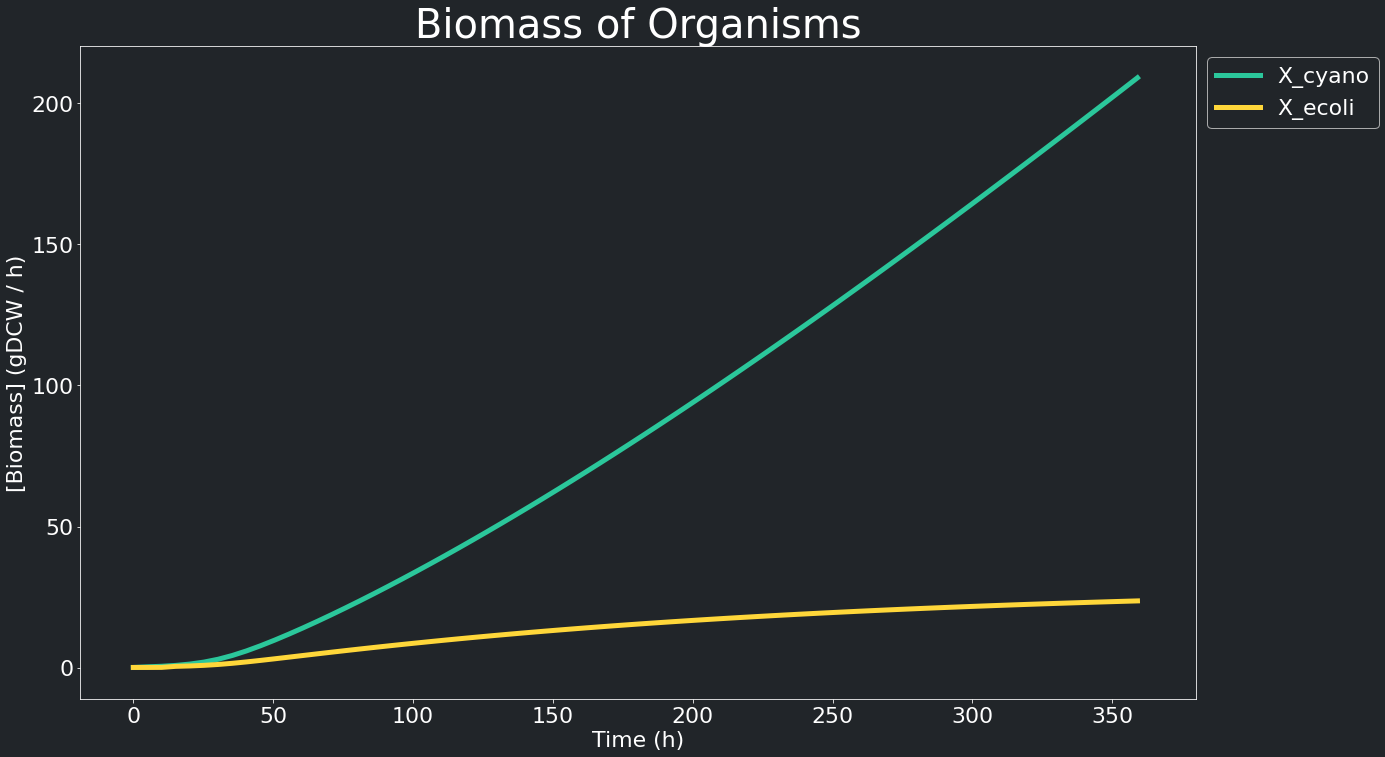

<ipython-input-94-a95ff241a8dc>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


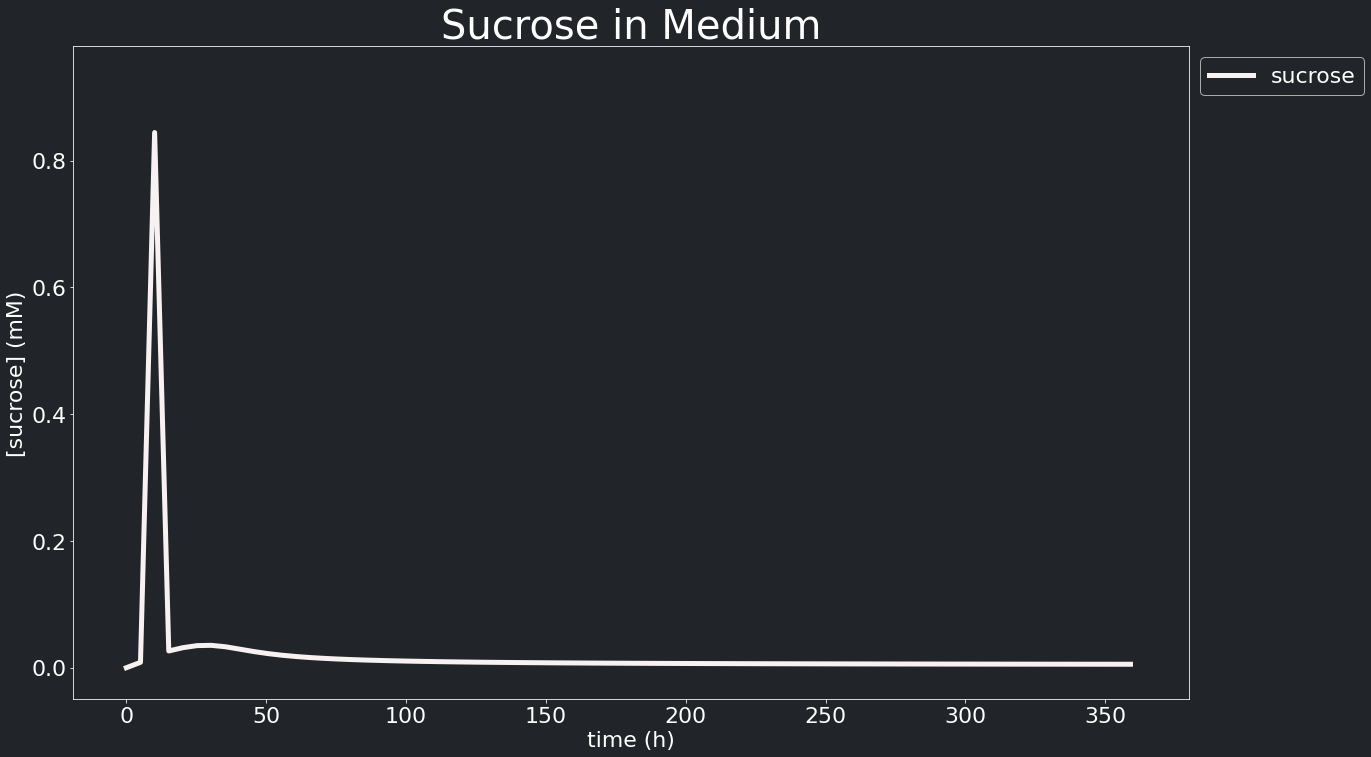

<ipython-input-94-a95ff241a8dc>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


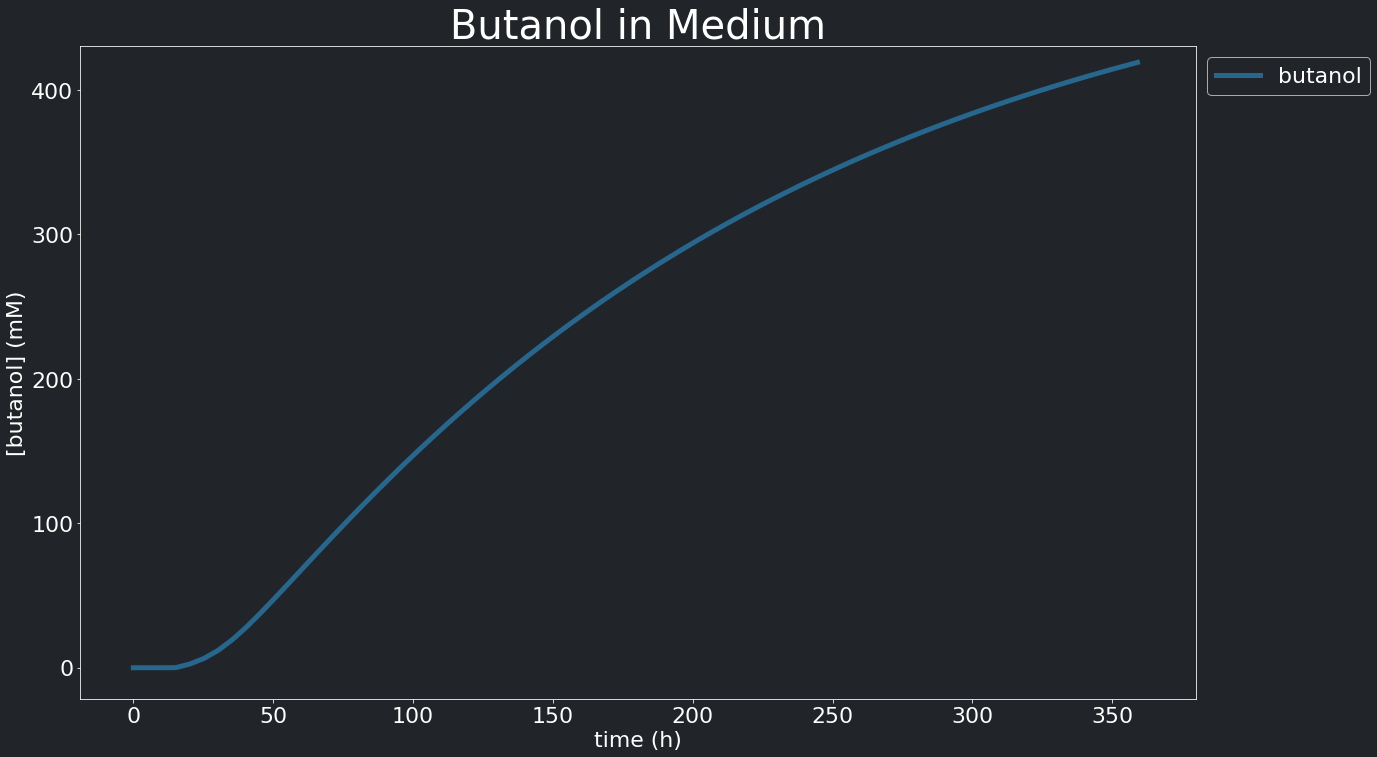

array([1.20832658e+02, 3.12836065e-02, 2.08913711e+02, 5.49444563e-03,
       2.36673338e+01, 4.18964381e+02])

In [94]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
plt.xlabel("Time (h)")
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel("[Biomass] (gDCW / h)")
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*220, '')
text.set_color('white')
plt.xlim(-0.05*380,380)
plt.ylim(-0.05*220,220)
plt.show()

plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
plt.xlabel('time (h)')
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel('[sucrose] (mM)')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*0.98, '')
text.set_color('white')
plt.xlim(-0.05*380,380)
plt.ylim(-0.05*0.98,0.98)
plt.show()

plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
plt.xlabel('time (h)')
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel('[butanol] (mM)')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
title = plt.title('Butanol in Medium', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*430, '')
text.set_color('white')
plt.xlim(-0.05*380,380)
plt.ylim(-0.05*430,430)
plt.show()

sim_results[-1]

C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


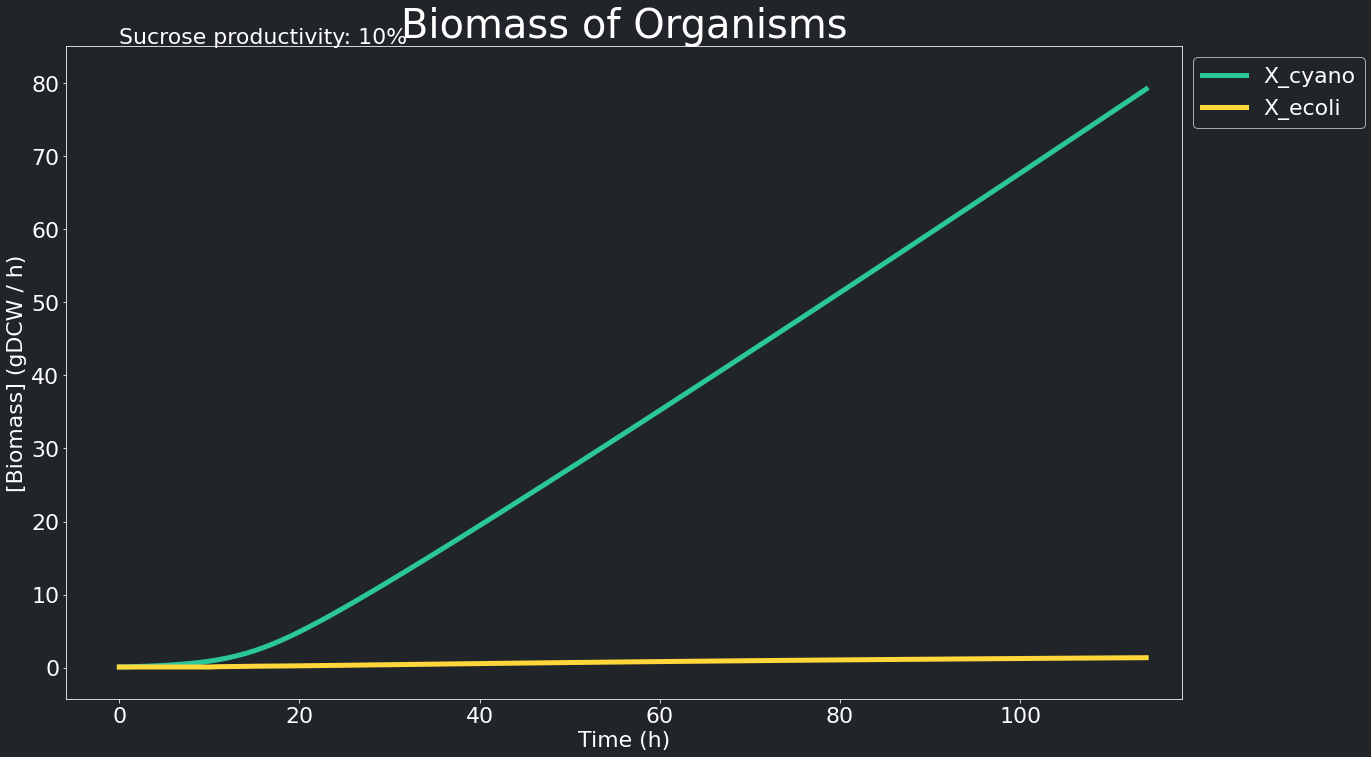

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


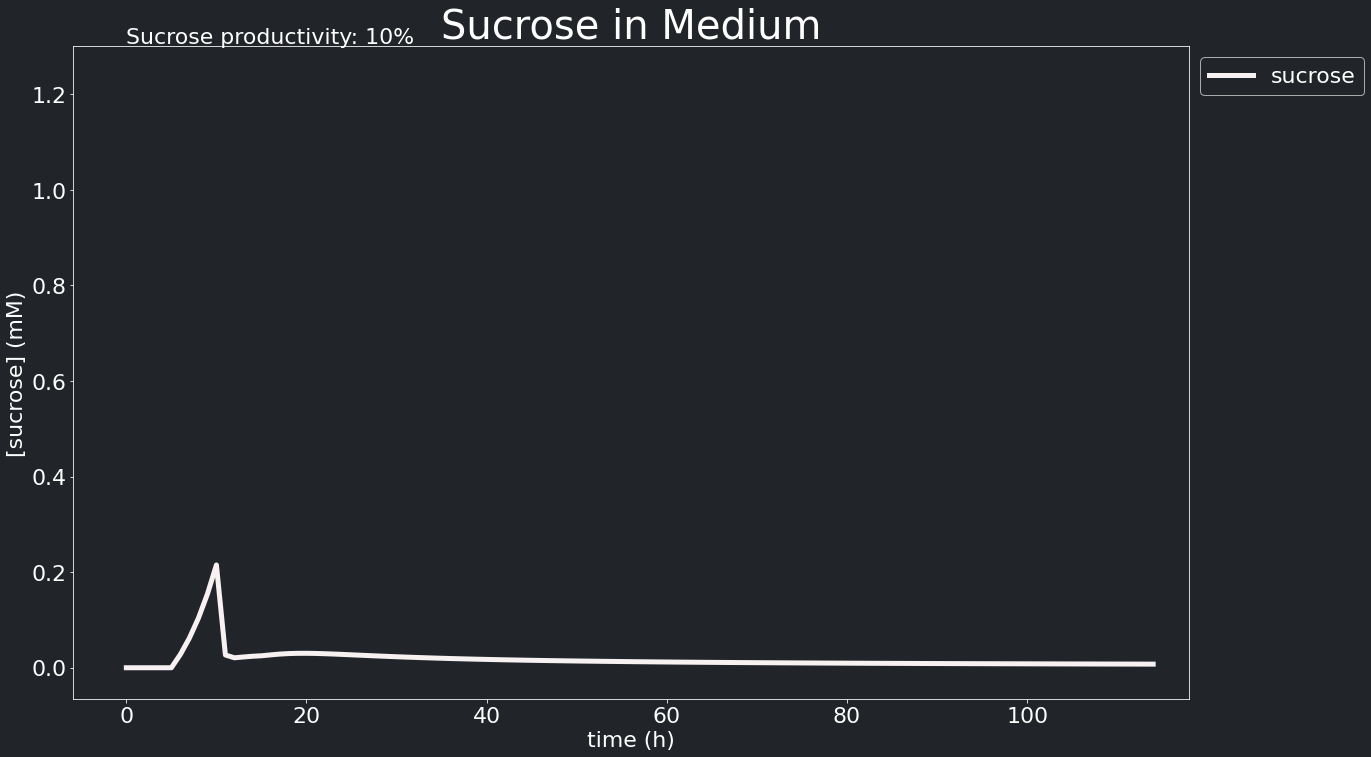

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


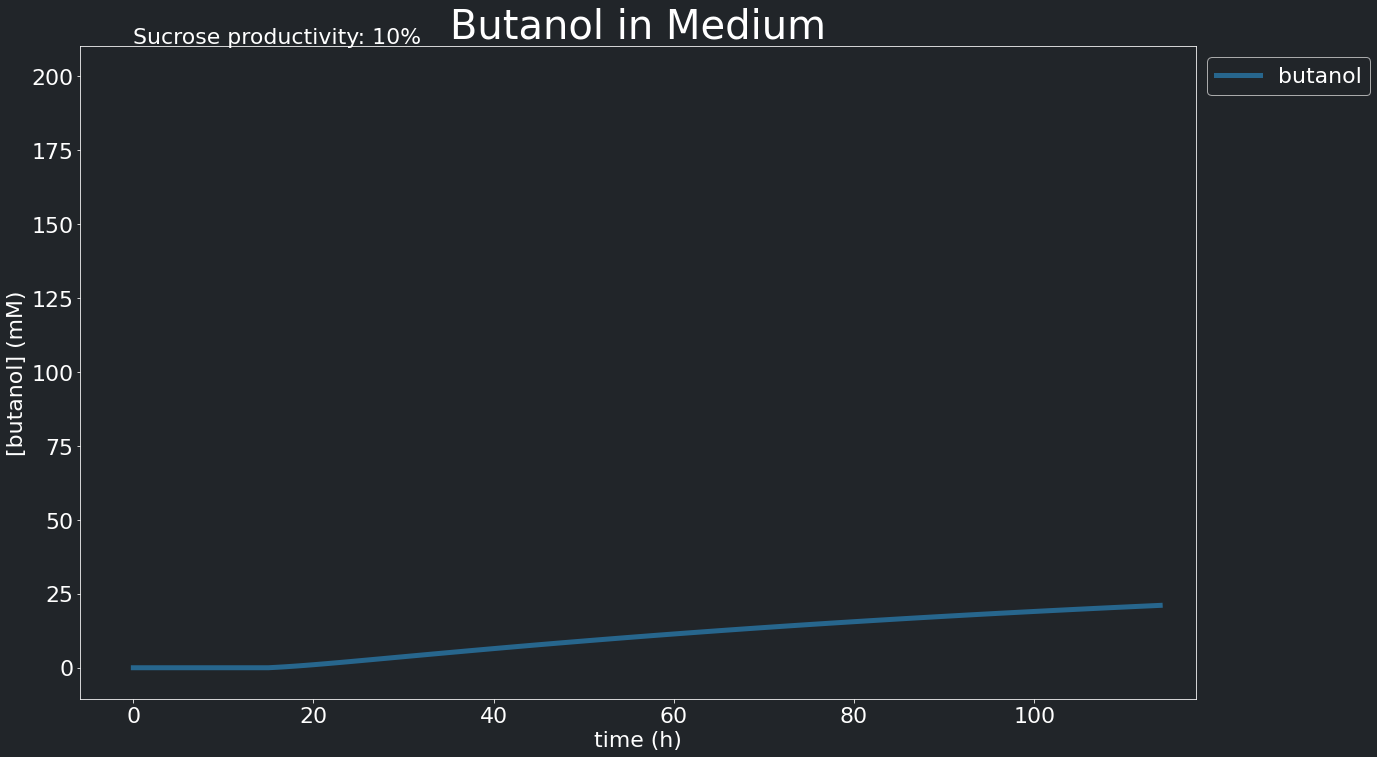

10 [1.20833070e+02 3.96975587e-02 7.91734590e+01 7.53981518e-03
 1.37597984e+00 2.10810178e+01]


<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


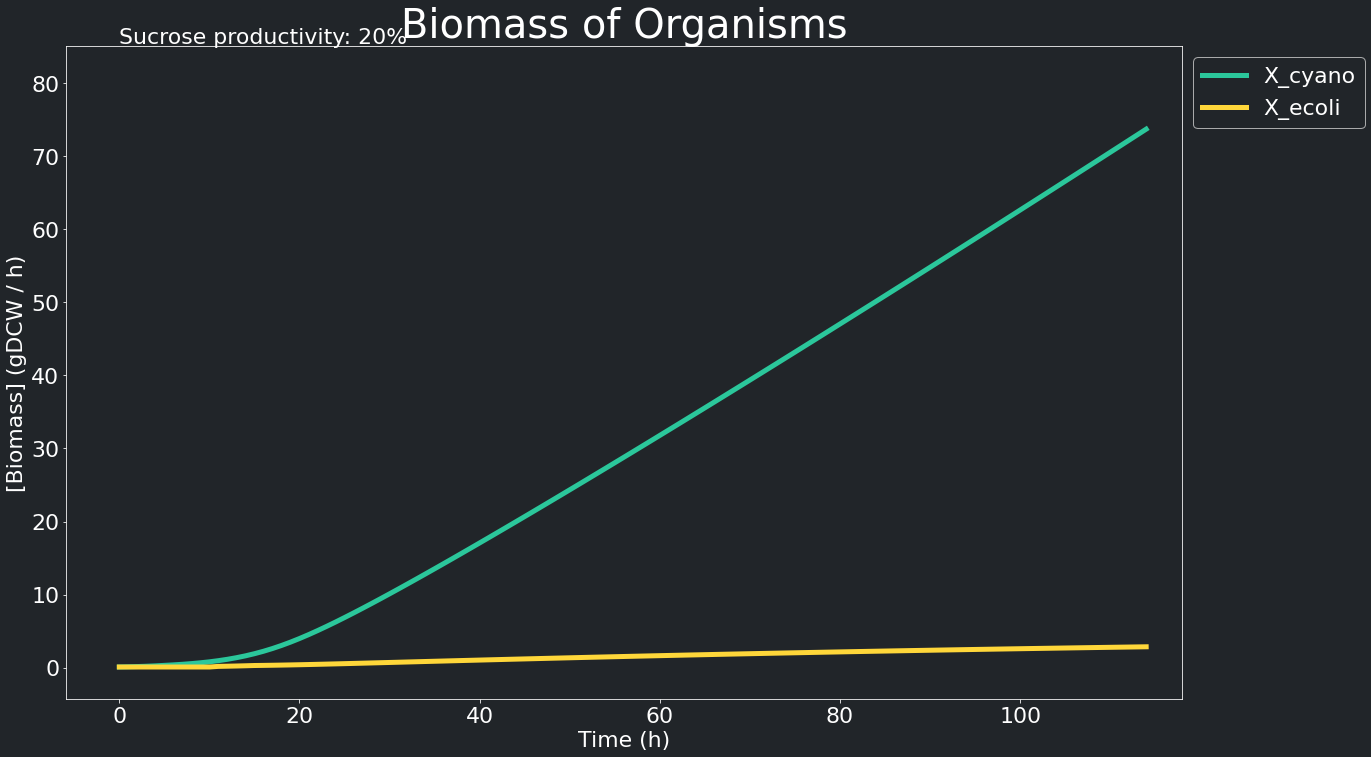

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


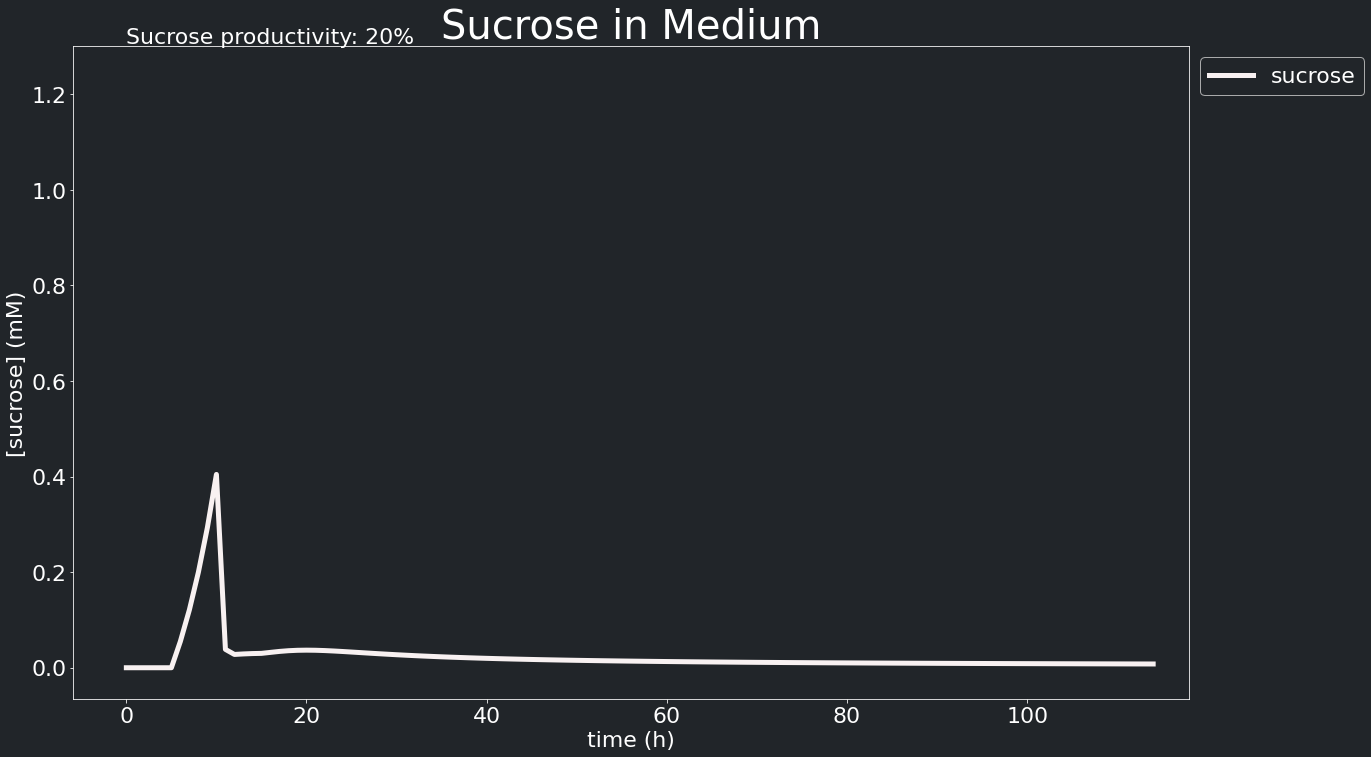

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


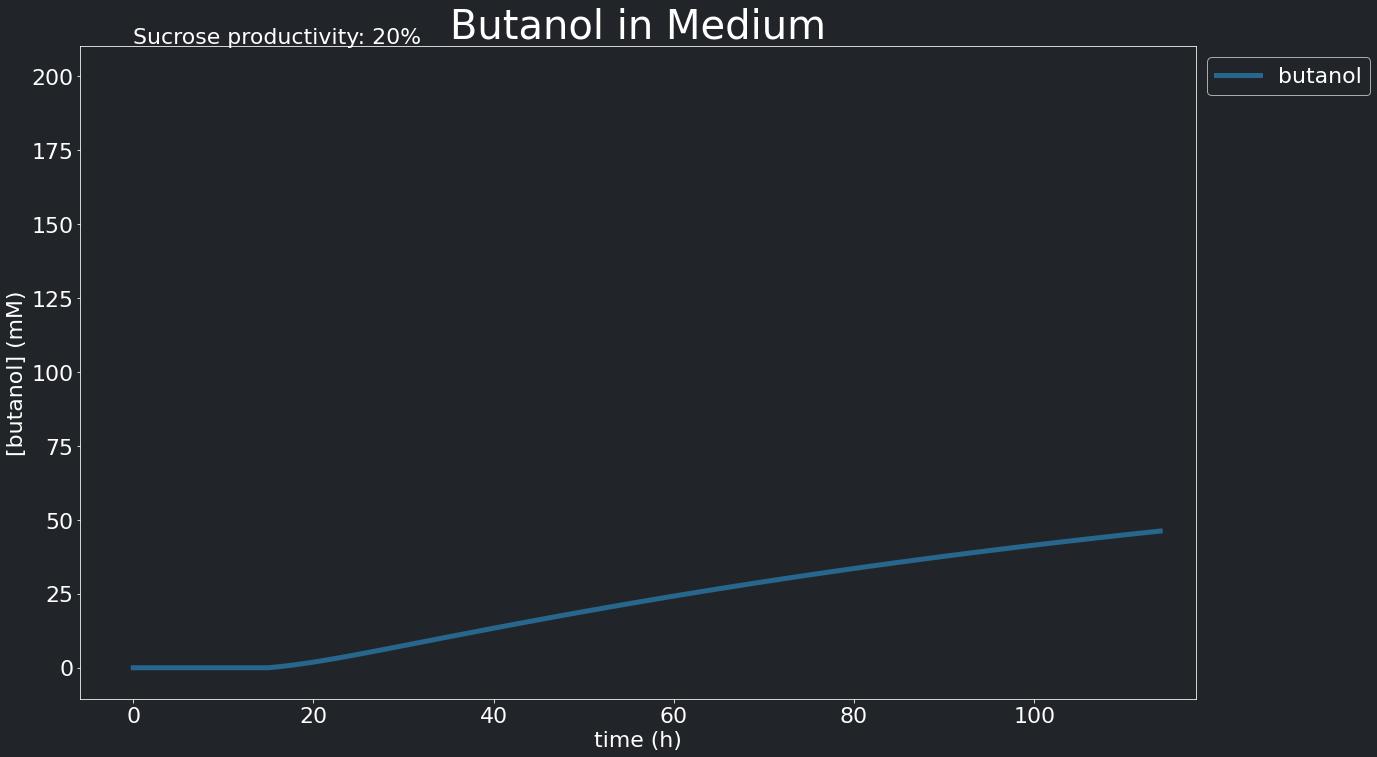

20 [1.20833405e+02 4.65321432e-02 7.36891774e+01 7.84959539e-03
 2.86626947e+00 4.62037480e+01]


<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


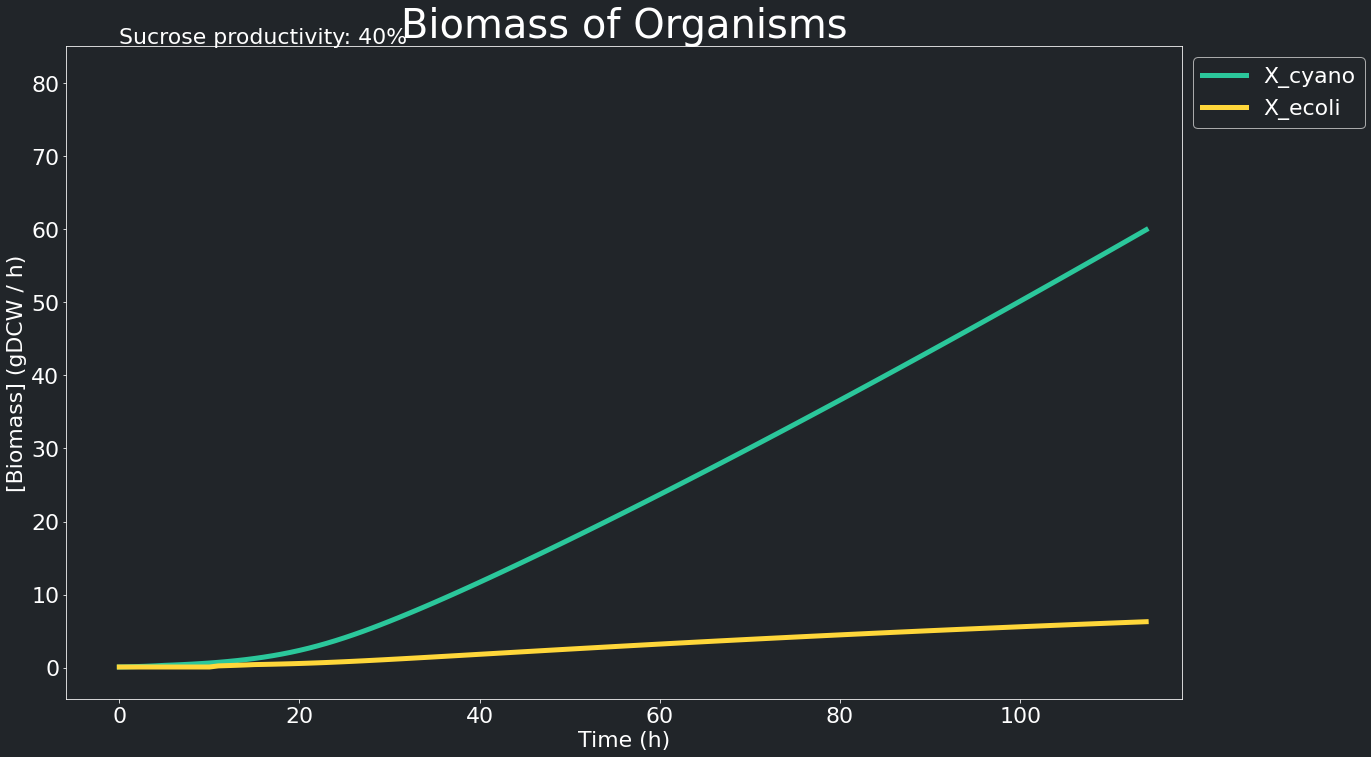

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


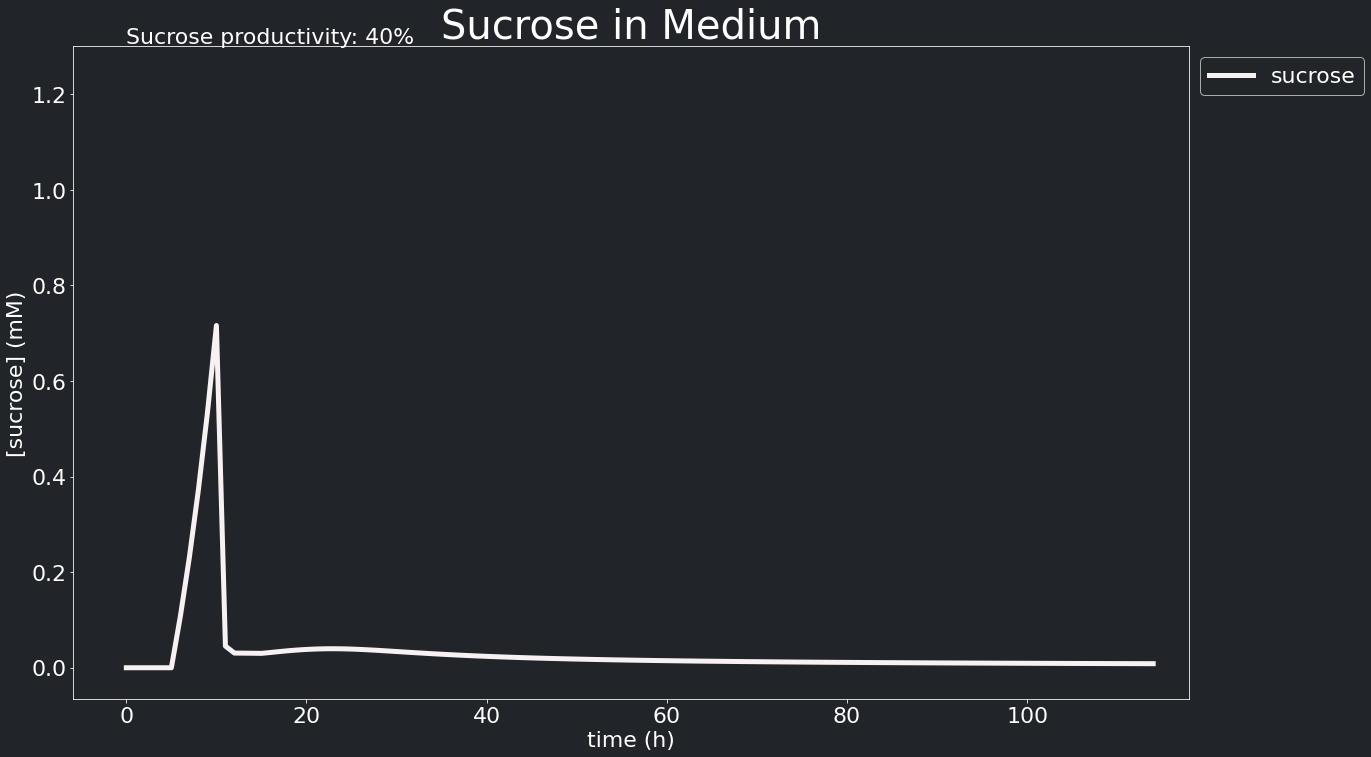

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


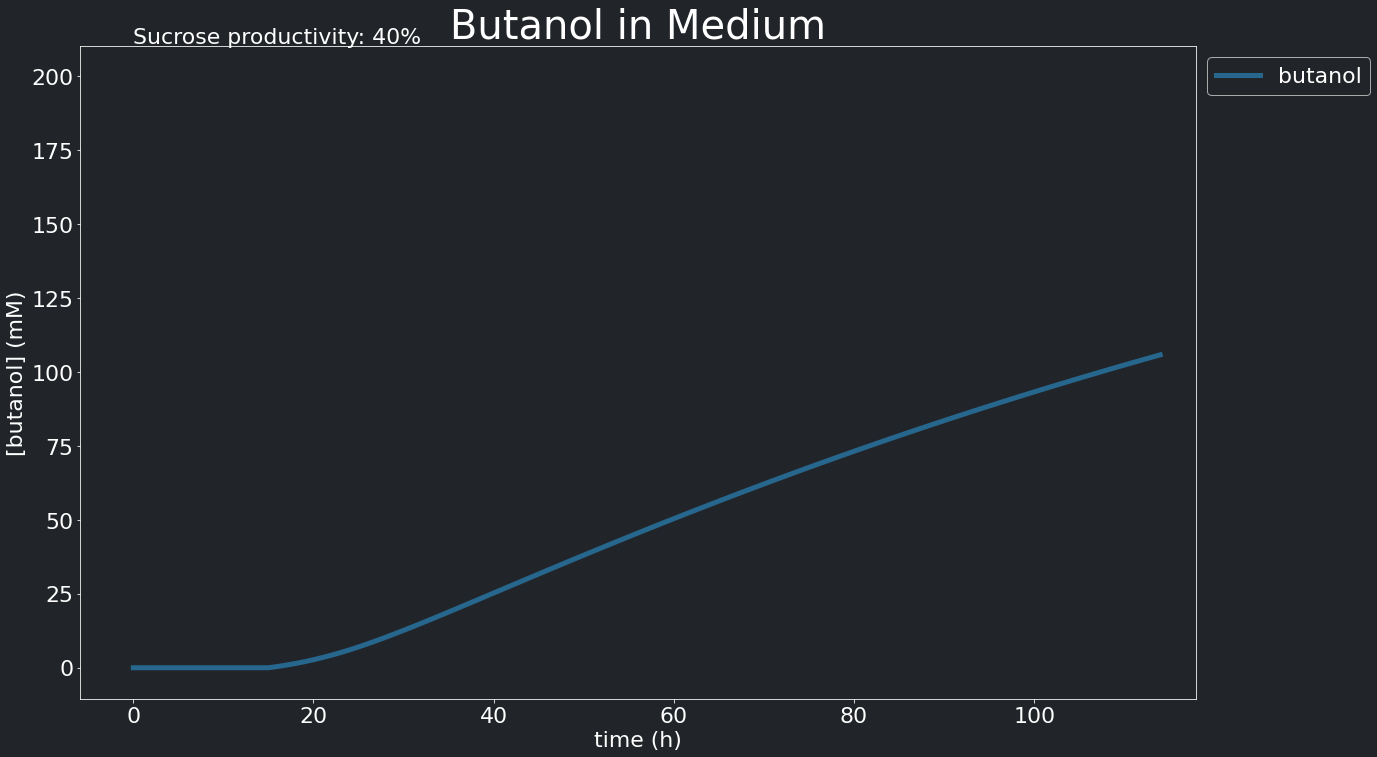

40 [1.20834517e+02 6.92555641e-02 5.99233734e+01 8.47271125e-03
 6.29749158e+00 1.05760707e+02]


<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


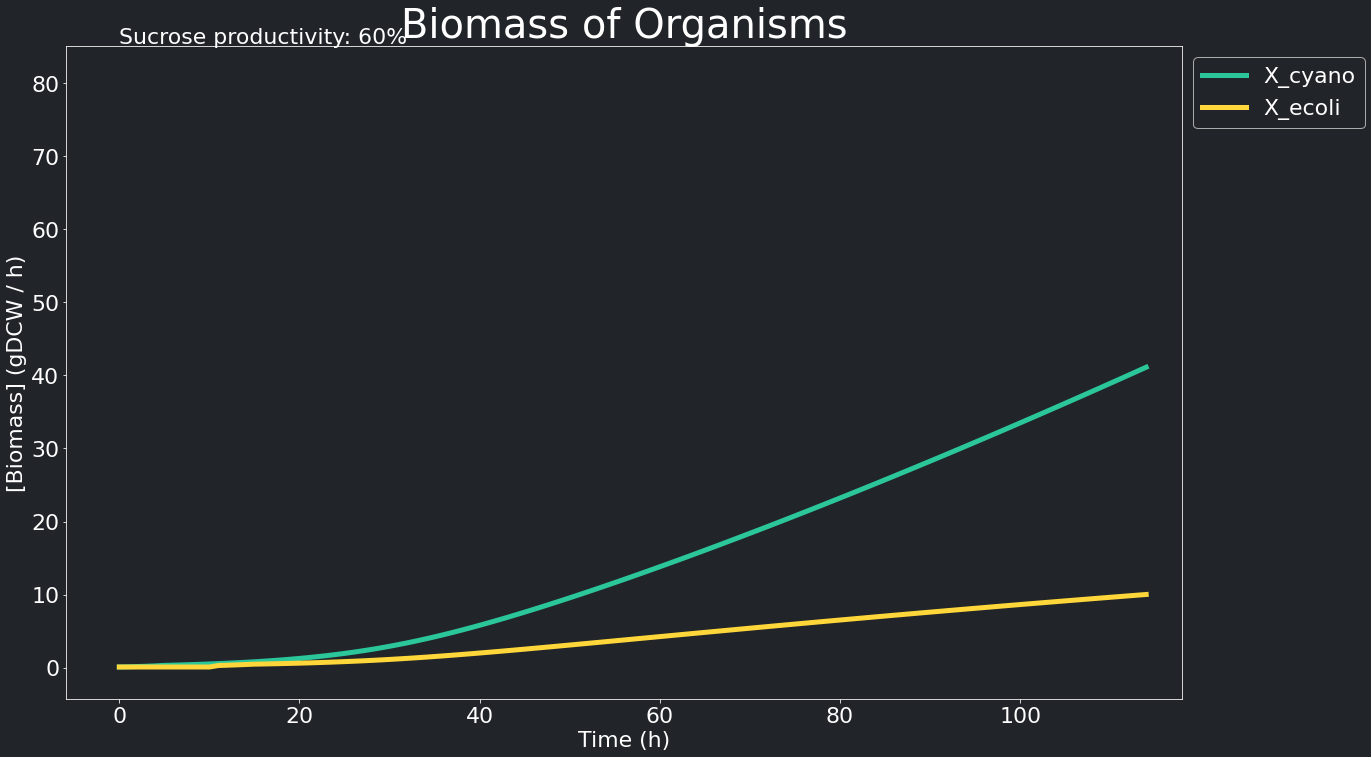

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


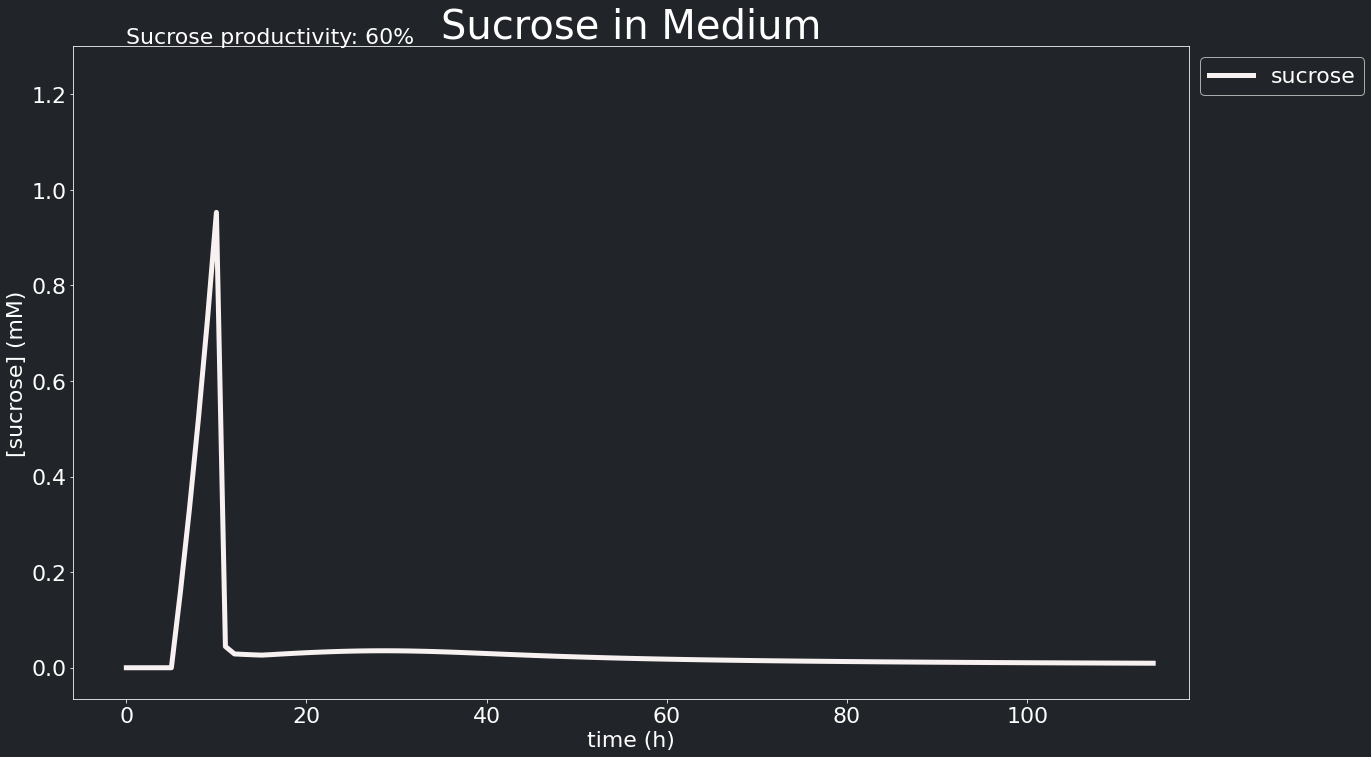

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


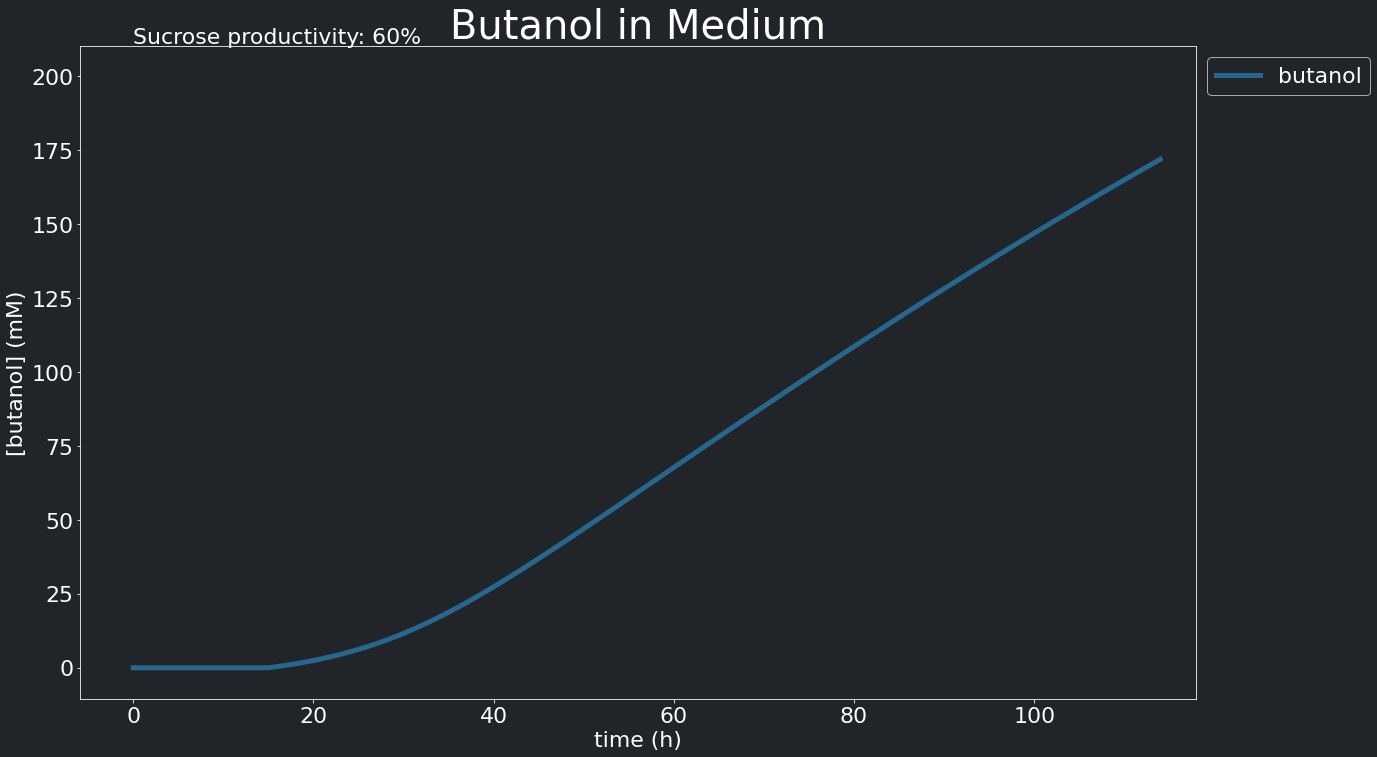

60 [1.20837268e+02 1.25455990e-01 4.11161364e+01 9.44464757e-03
 1.00228551e+01 1.71840188e+02]


<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


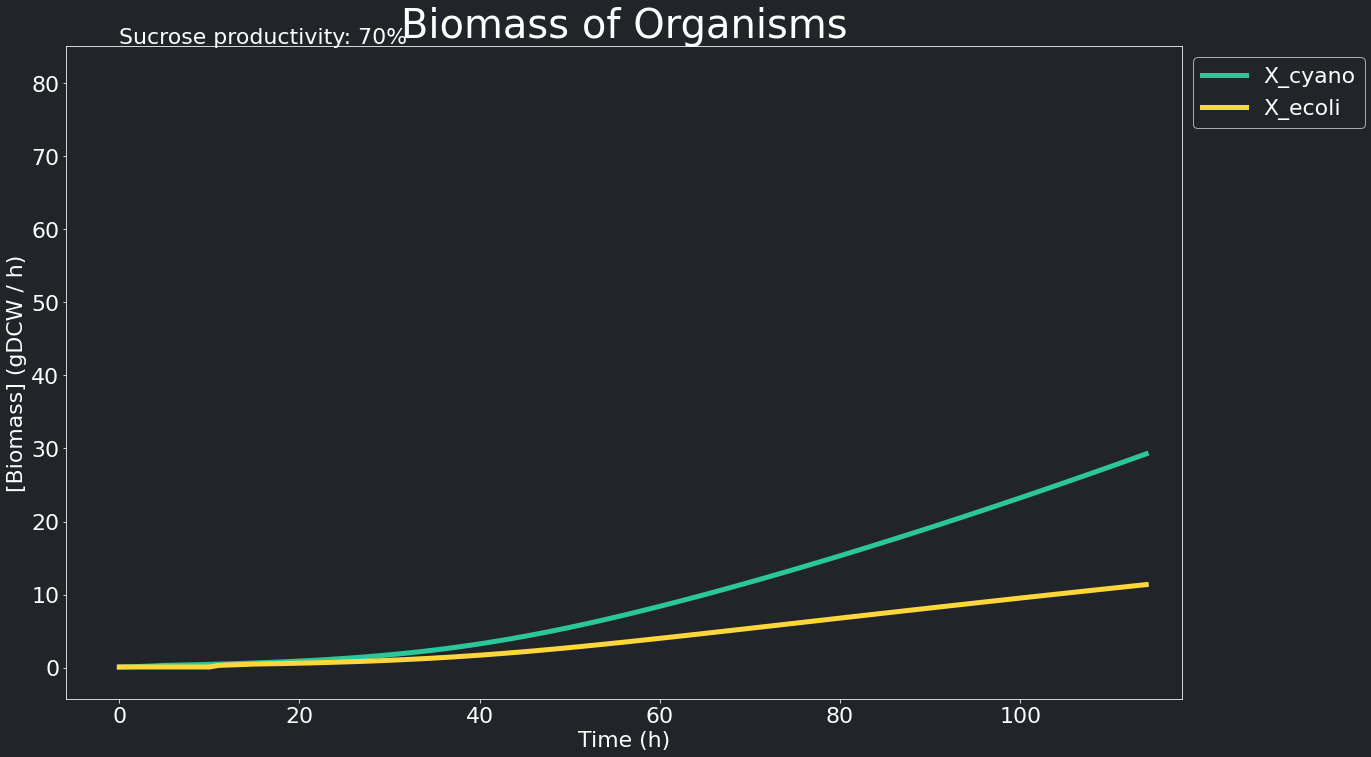

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


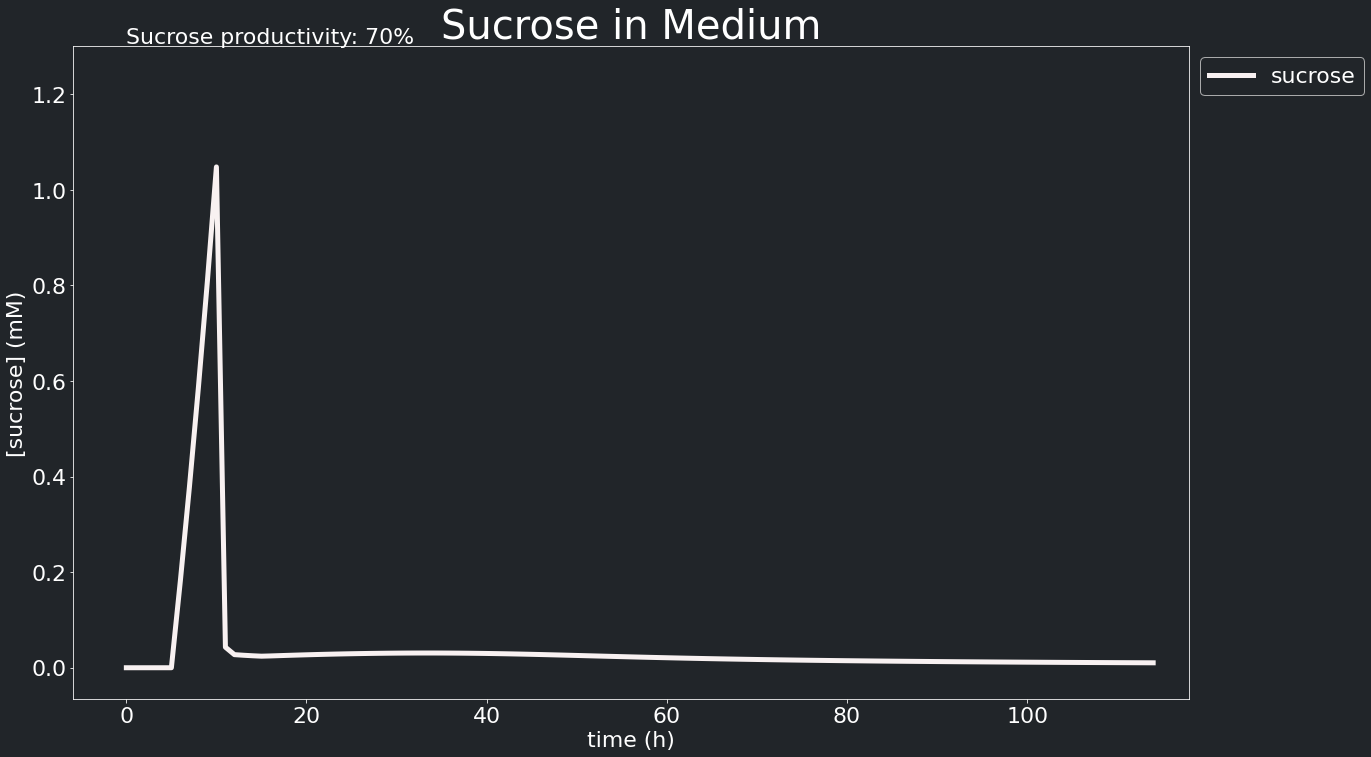

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


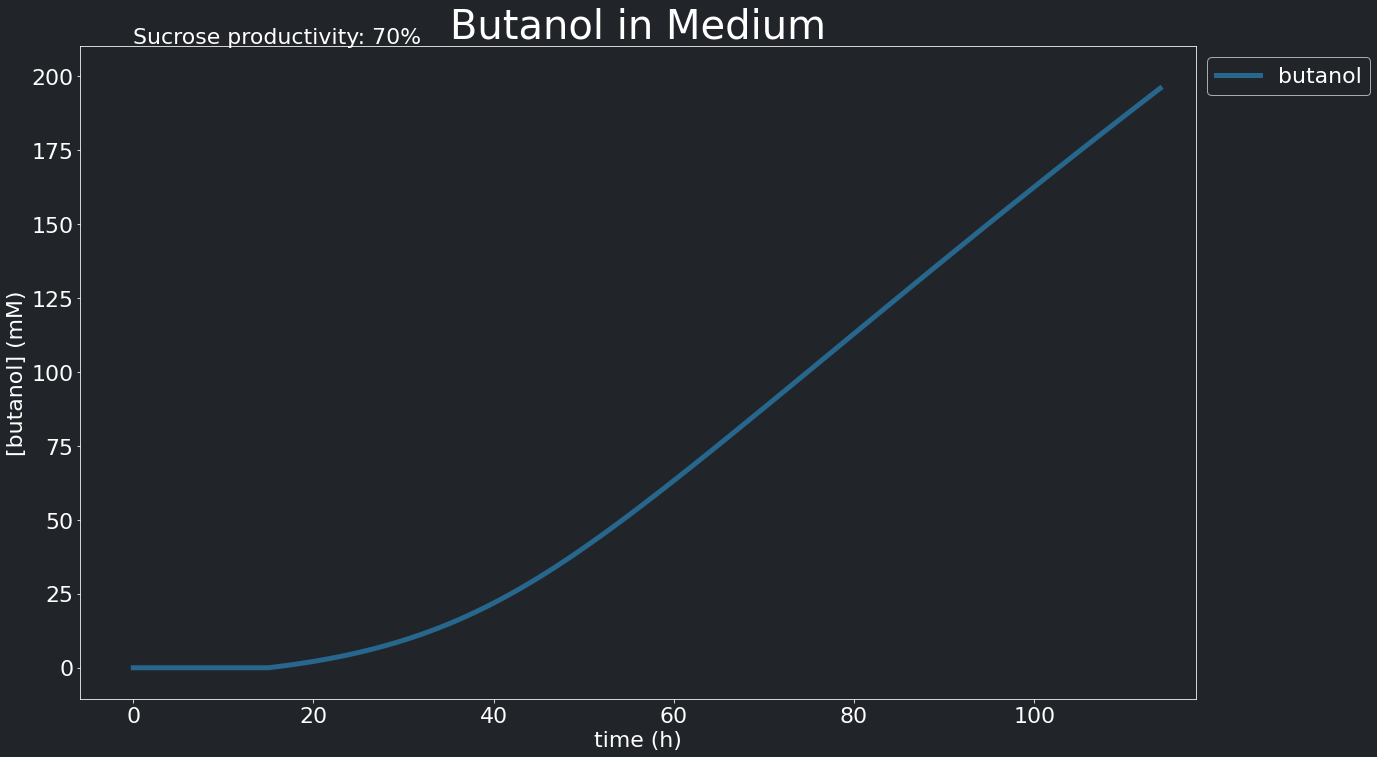

70 [1.20840888e+02 1.99388833e-01 2.92613507e+01 1.03209855e-02
 1.13732874e+01 1.95872496e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


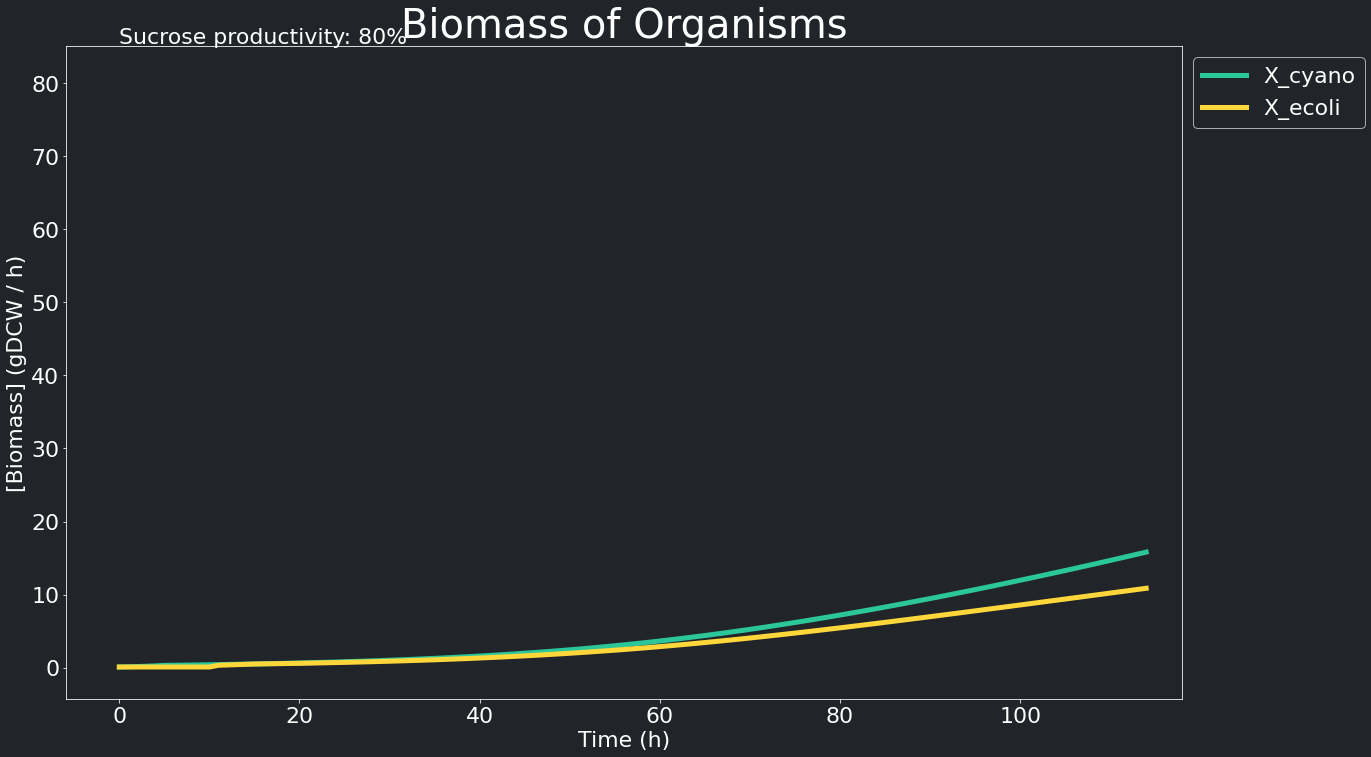

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


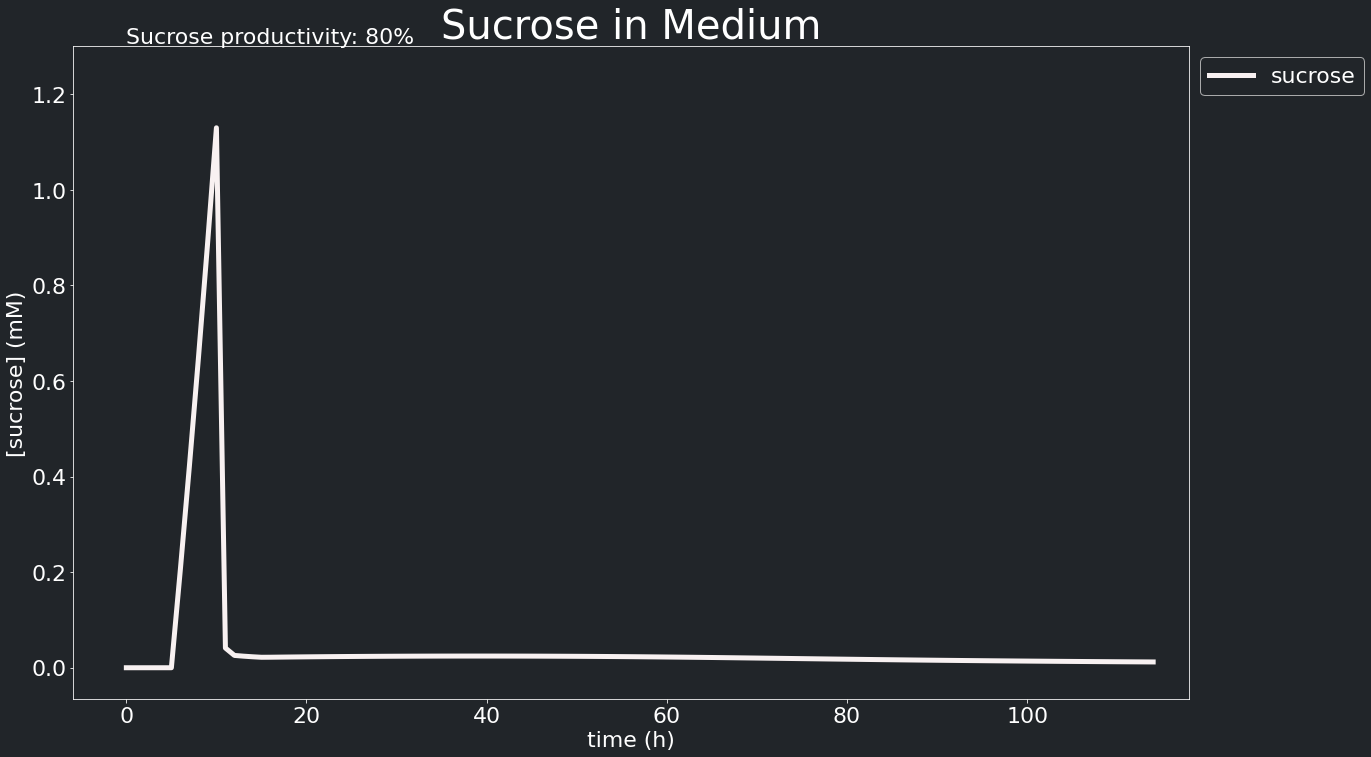

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


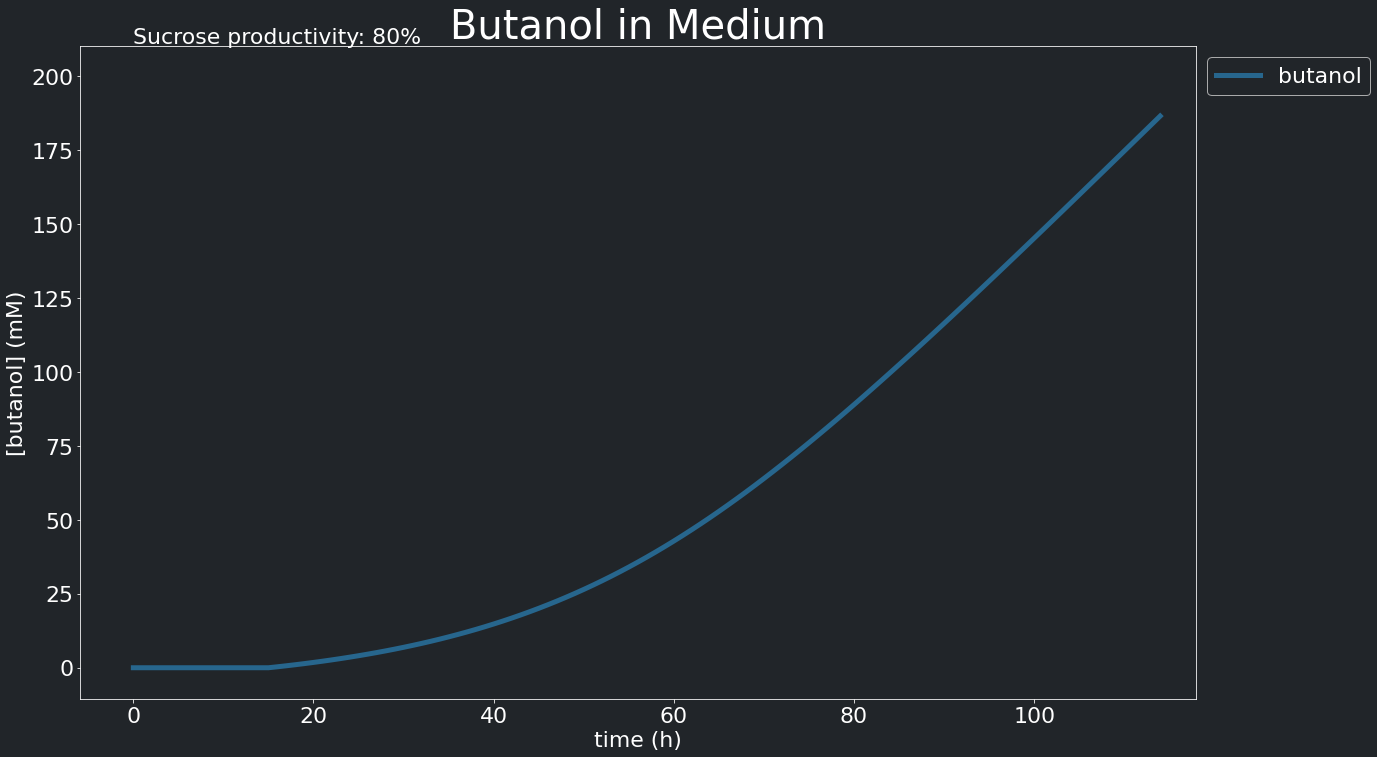

80 [1.20852158e+02 4.29611309e-01 1.58183618e+01 1.20968096e-02
 1.08686789e+01 1.86475201e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


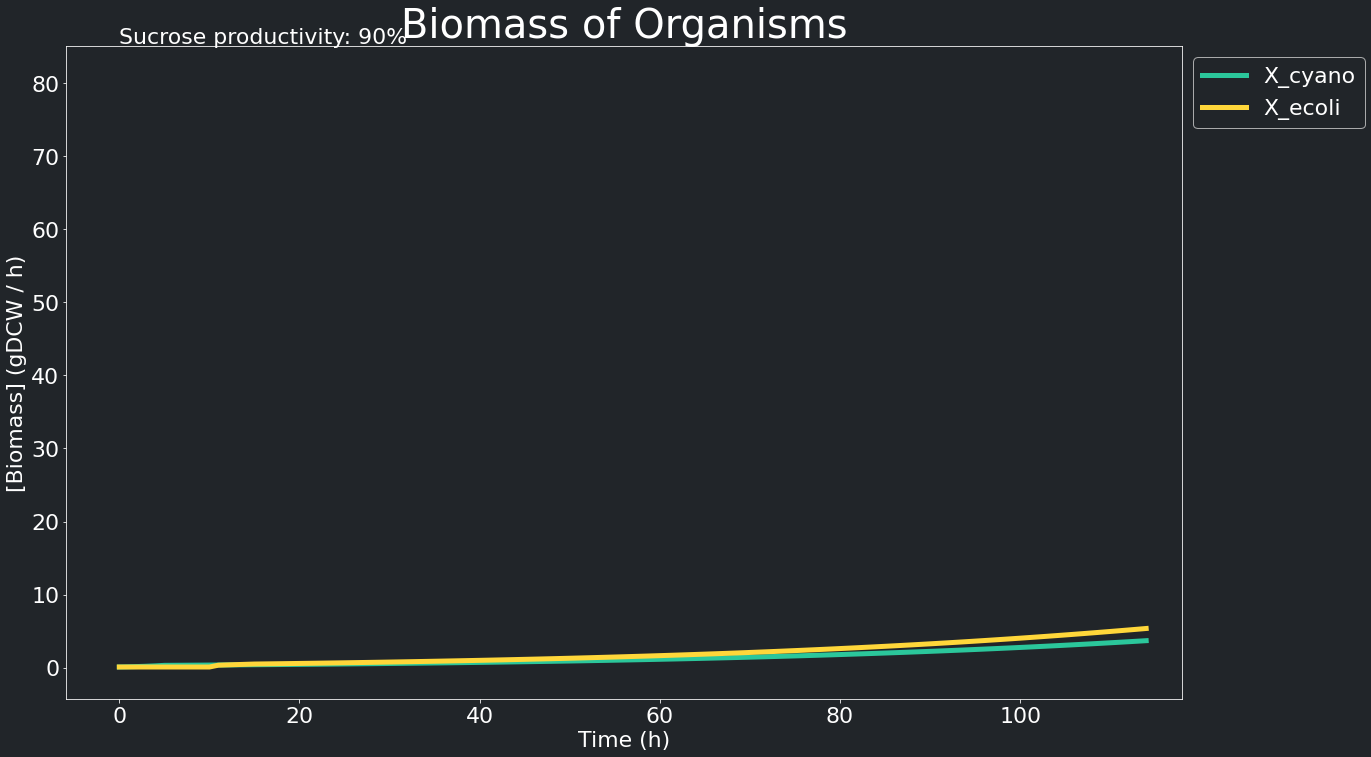

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


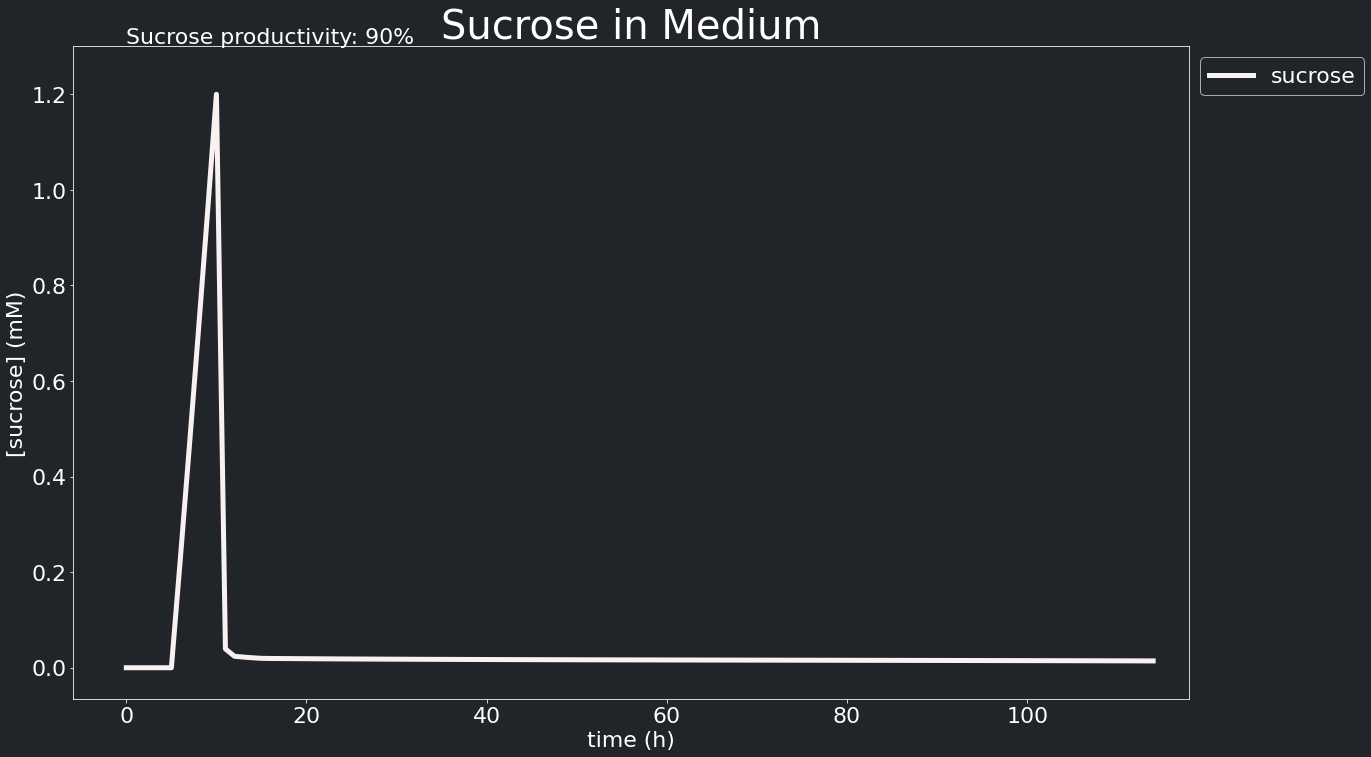

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


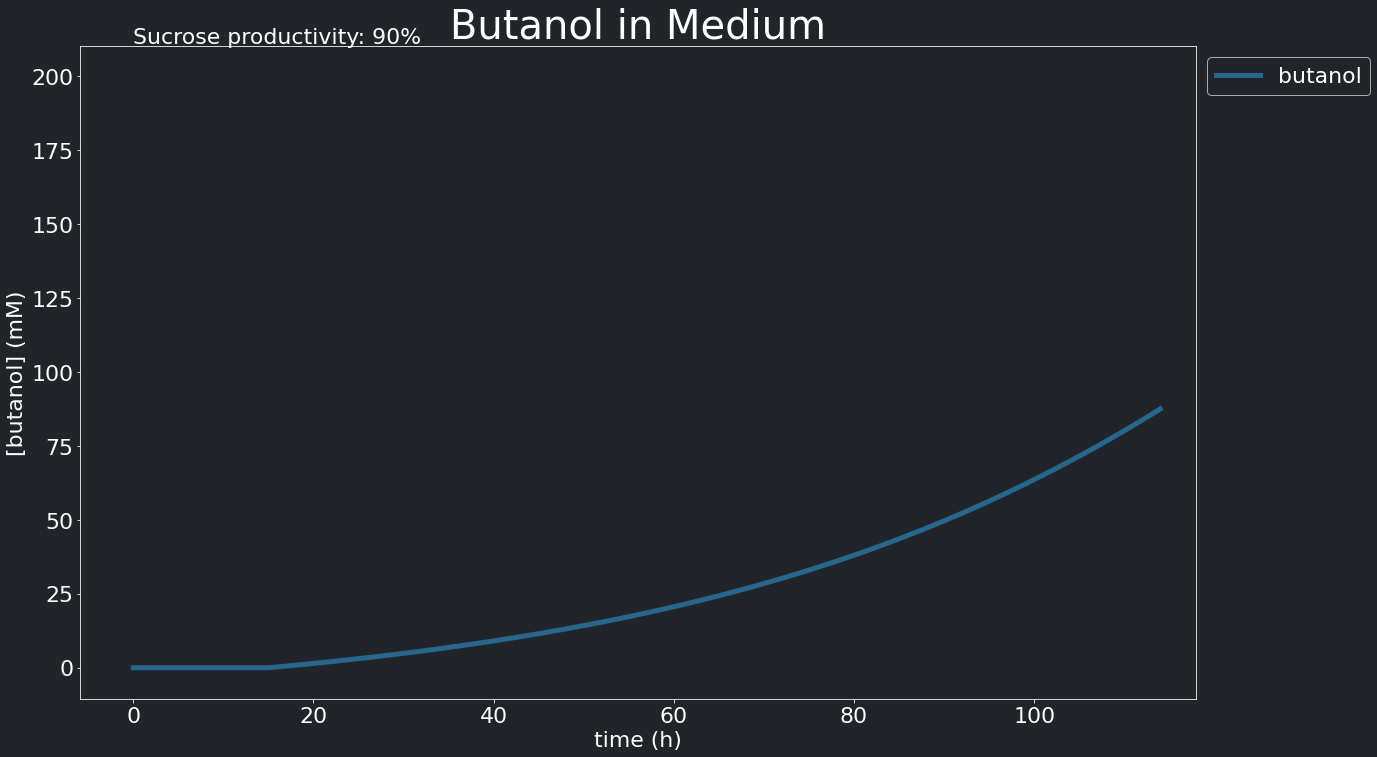

90 [1.20927135e+02 1.96119239e+00 3.70201710e+00 1.42572009e-02
 5.36989628e+00 8.74536459e+01]


<ipython-input-15-f941081d3942>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


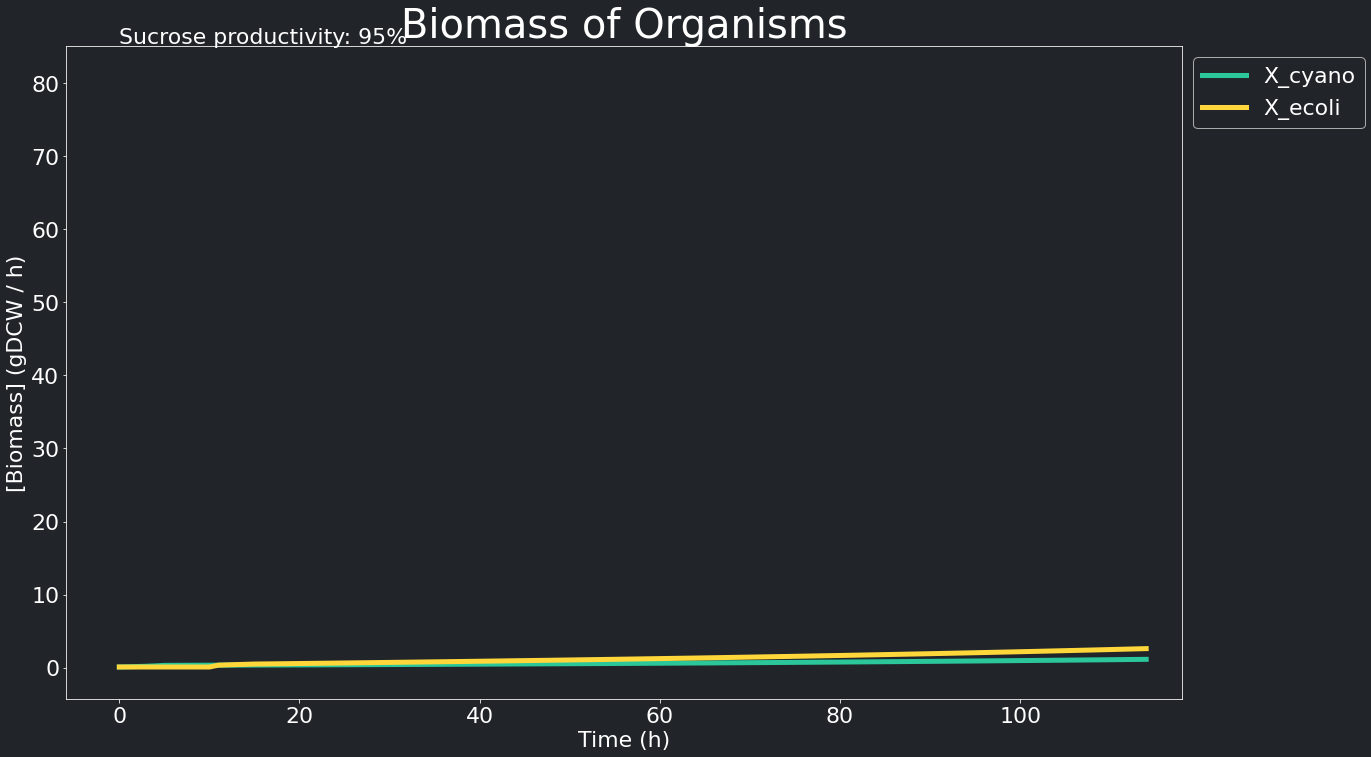

<ipython-input-15-f941081d3942>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


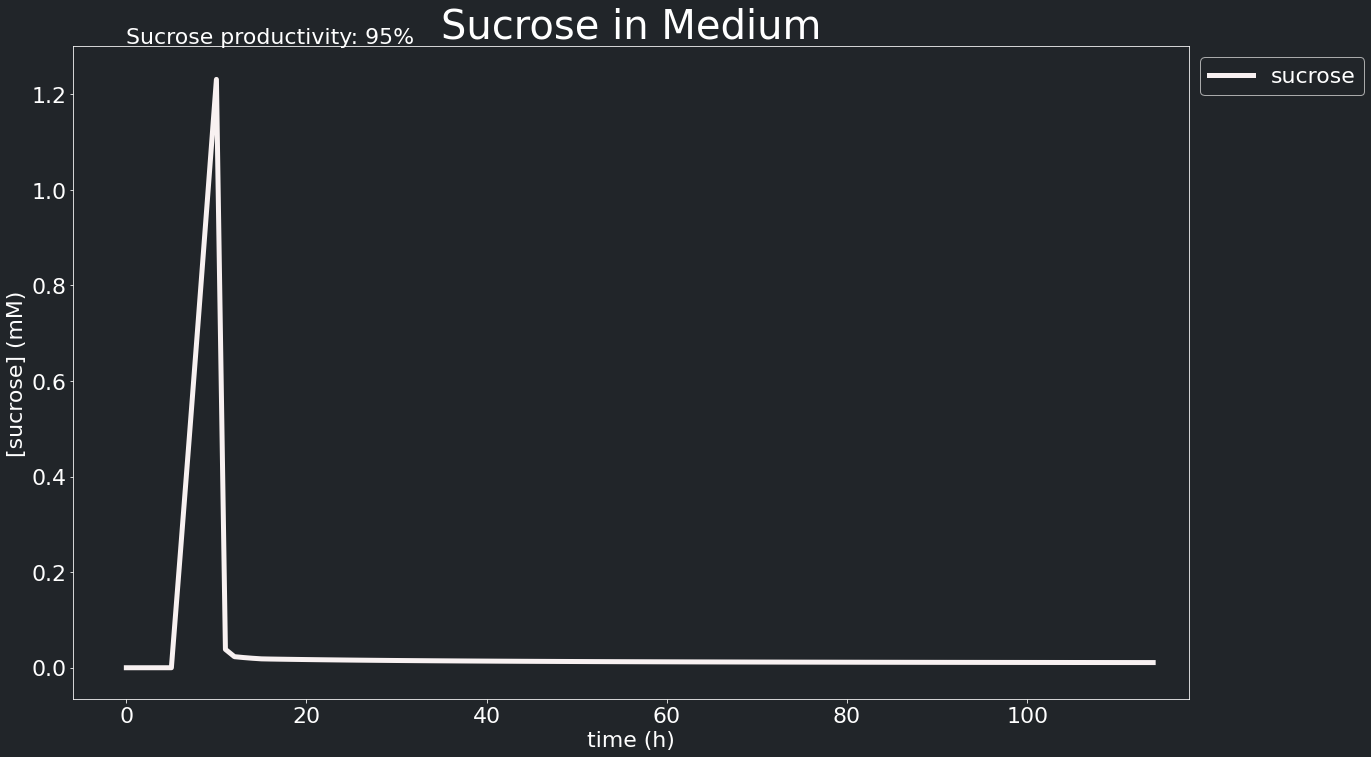

<ipython-input-15-f941081d3942>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


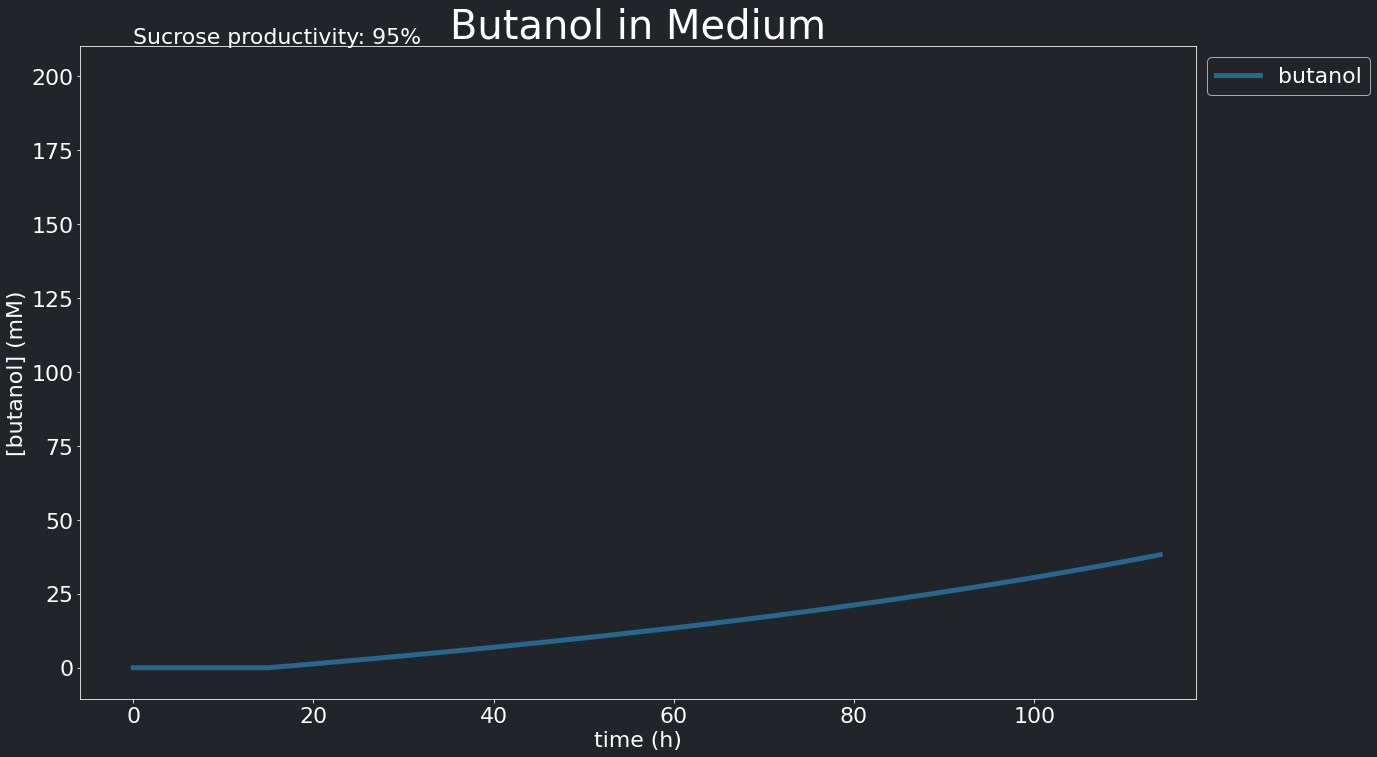

95 [1.20979392e+02 3.02881323e+00 1.14889702e+00 1.08215602e-02
 2.61600593e+00 3.81934326e+01]


In [15]:
sim_times = np.linspace(0, 114, 115)
#print(sim_times)

# solve ODEs
from scipy.integrate import odeint
for i in [10, 20, 40, 60, 70, 80, 90, 95]:
    pars['yield_sucrose'] = i/100
    extra_params = (model_ecoli, model_cyano, pars)
    sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
    plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
    plt.xlabel("Time (h)")
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel("[Biomass] (gDCW / h)")
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*85, 'Sucrose productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*85,85)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[sucrose] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*1.3, 'Sucrose productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*1.3,1.3)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[butanol] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Butanol in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*210, 'Sucrose productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*210,210)
    plt.show()

    print(i, sim_results[-1])

<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


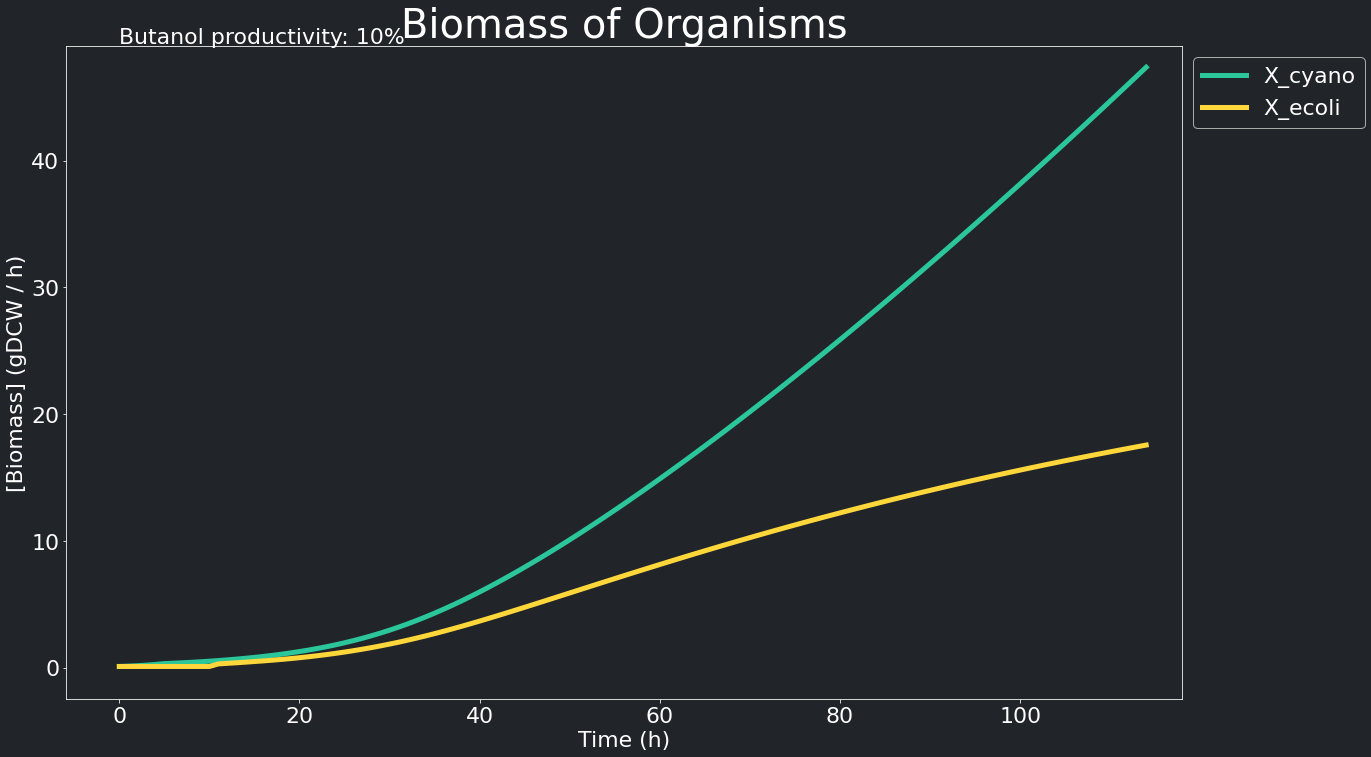

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


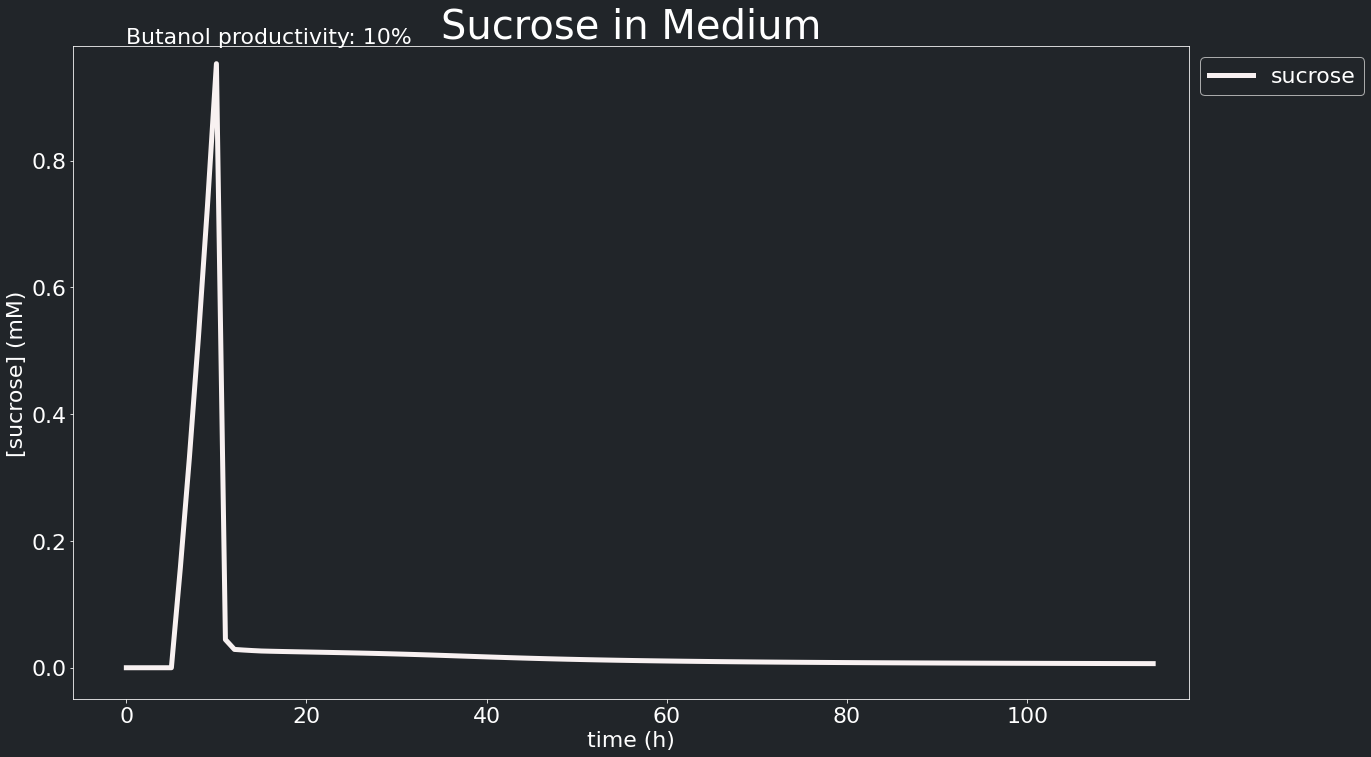

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


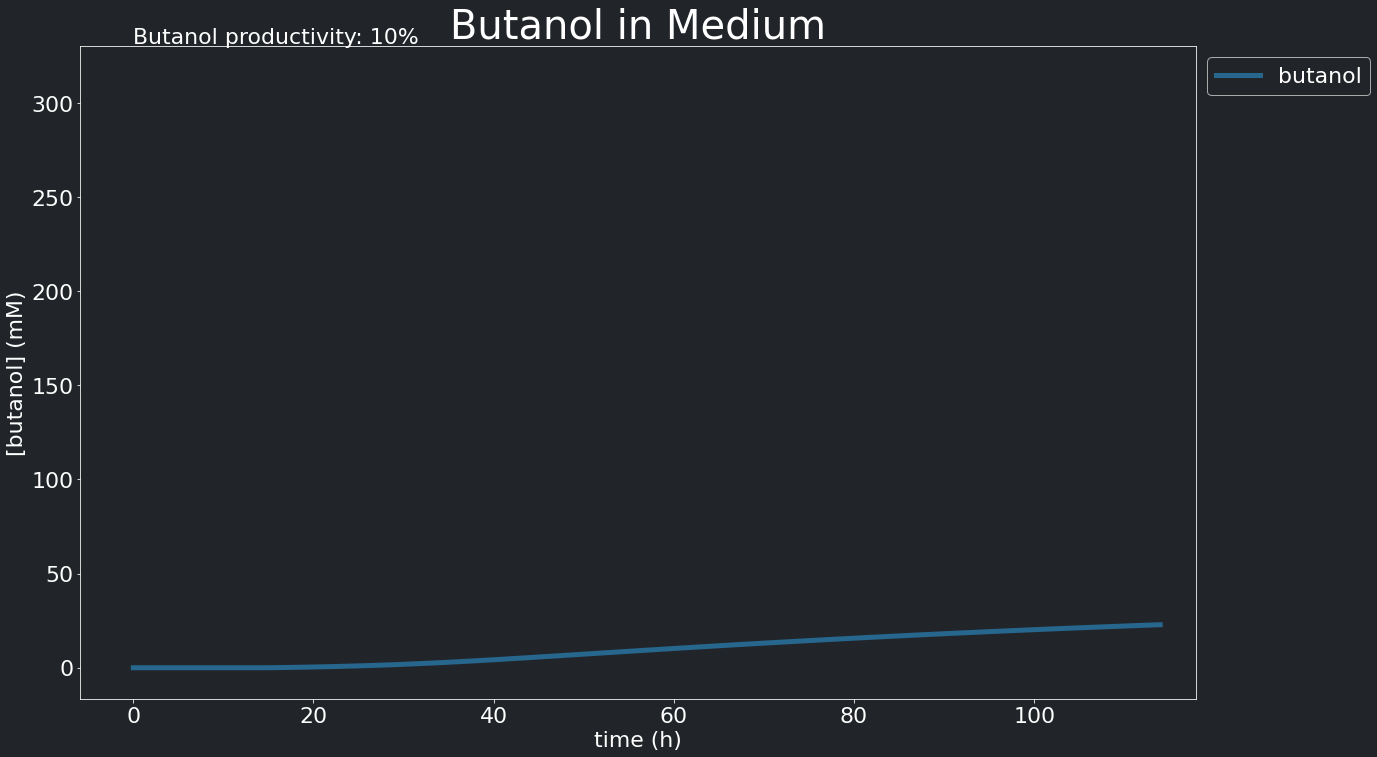

10 [1.20837619e+02 1.32630467e-01 4.73615832e+01 6.49058995e-03
 1.75623005e+01 2.28650787e+01]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


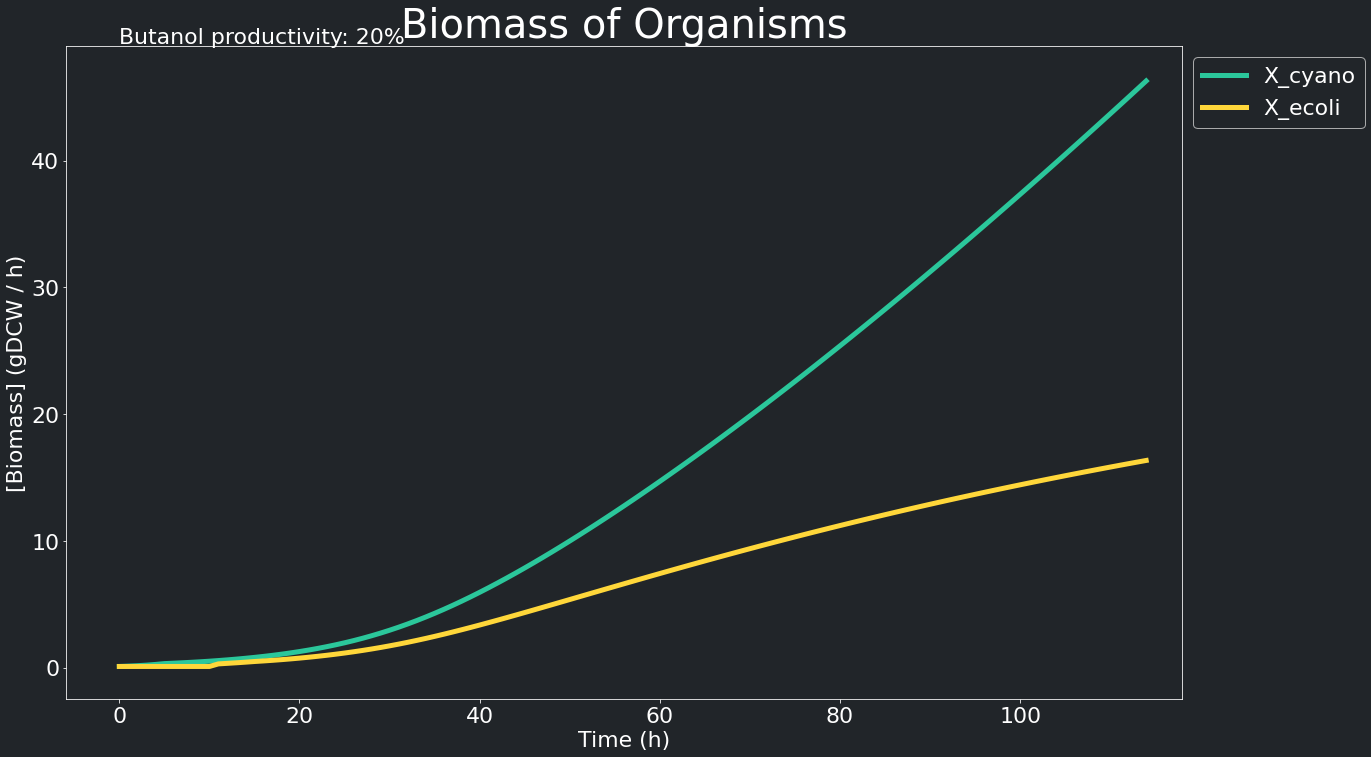

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


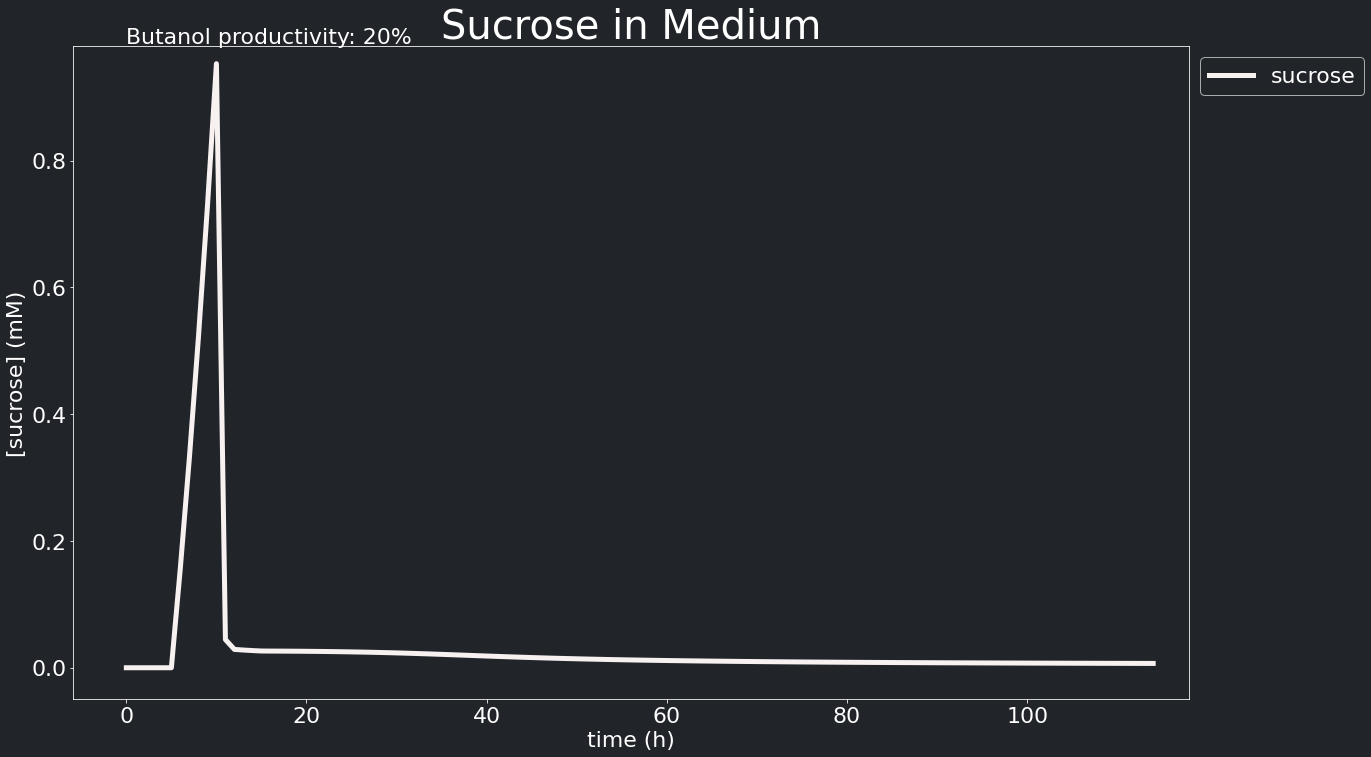

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


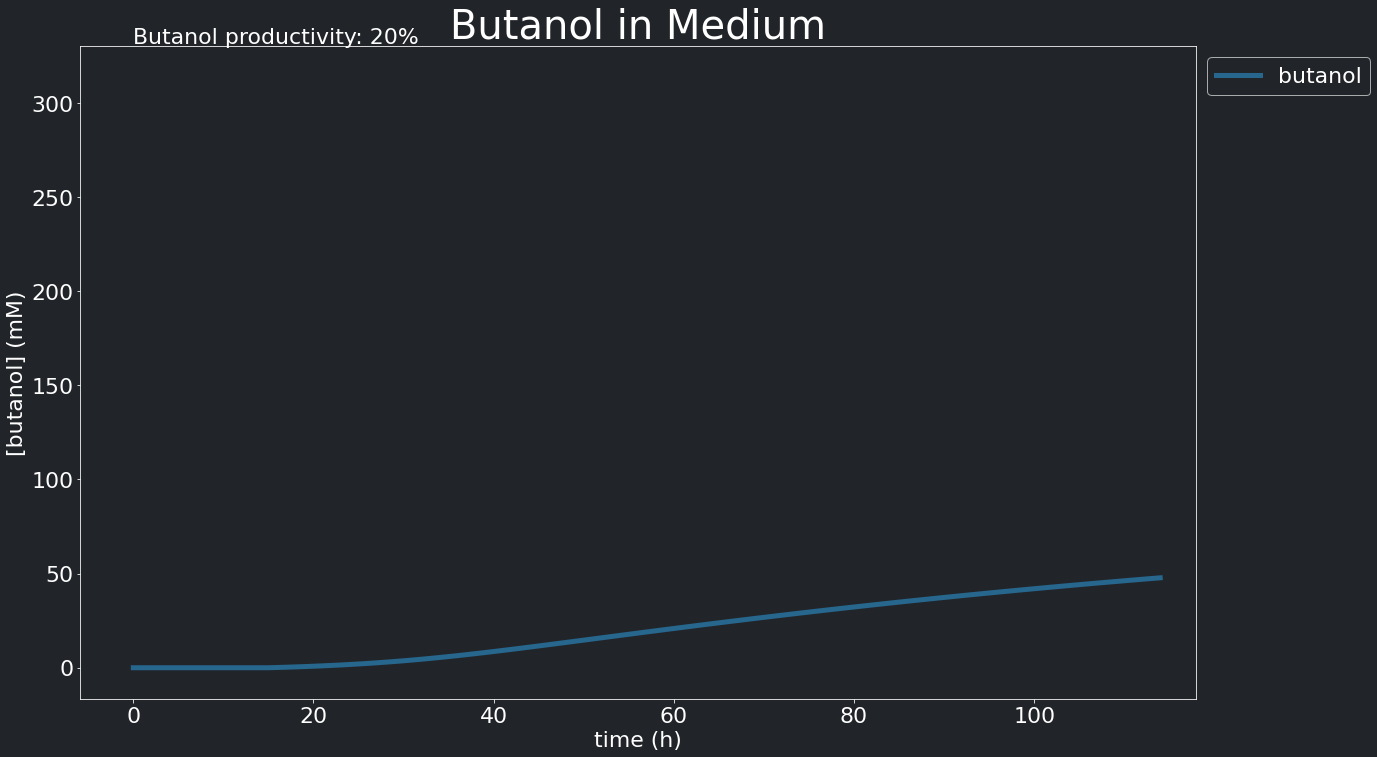

20 [1.20837584e+02 1.31897563e-01 4.62808877e+01 6.78341085e-03
 1.63484564e+01 4.77694180e+01]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


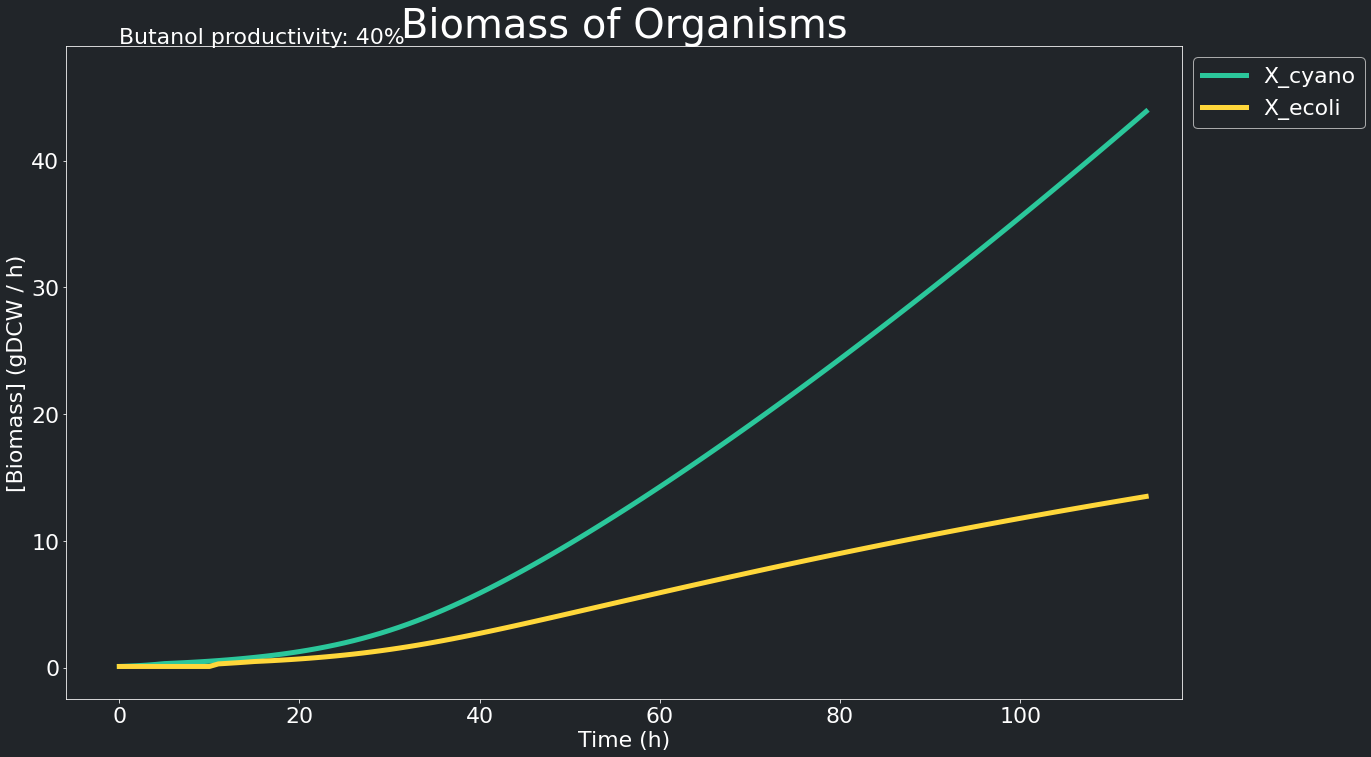

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


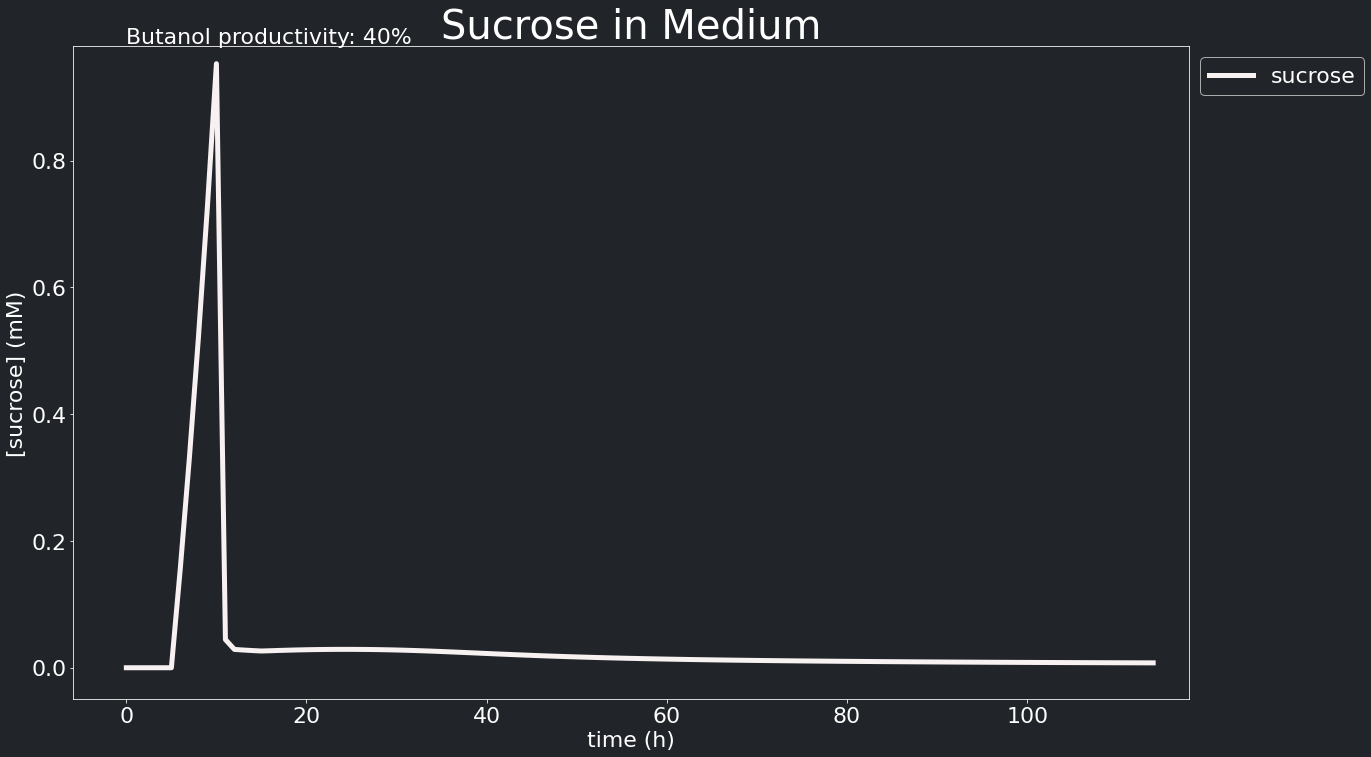

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


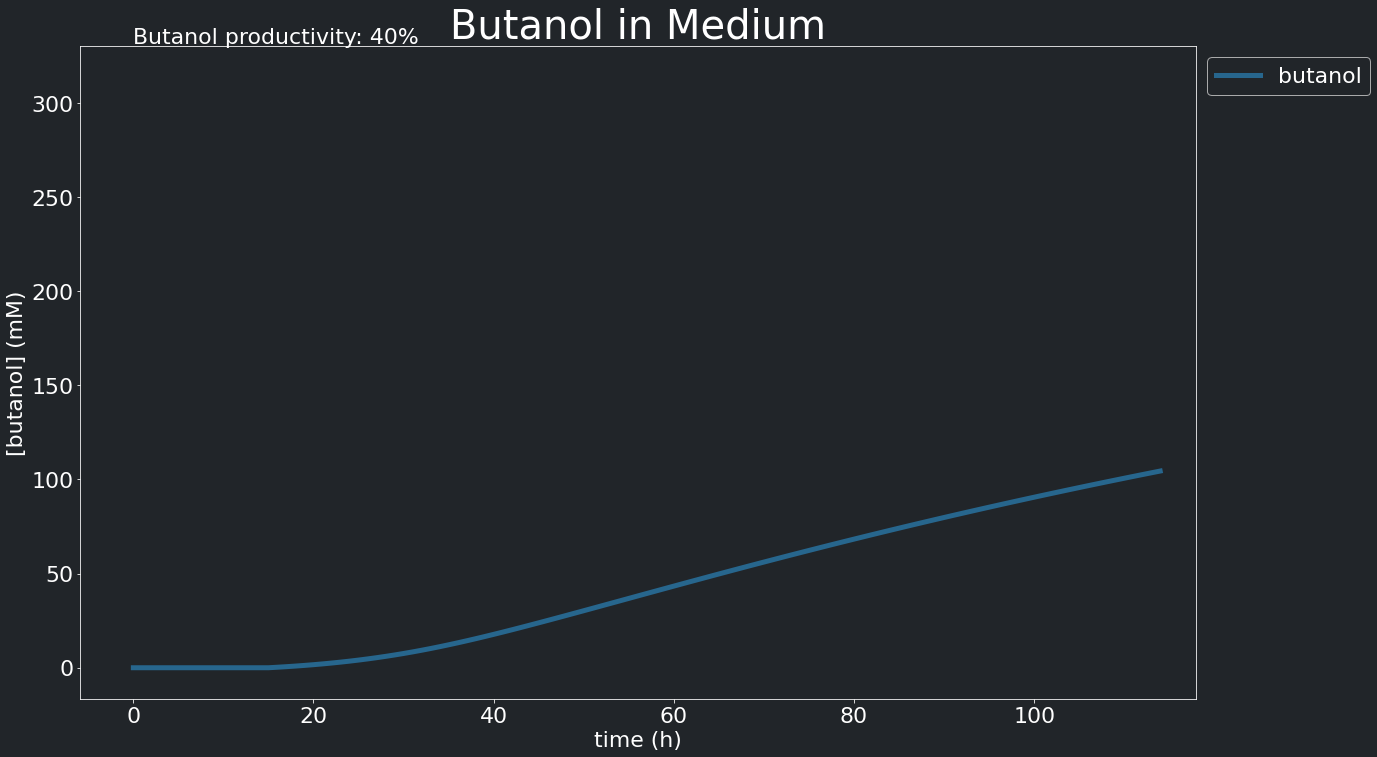

40 [1.20837468e+02 1.29529423e-01 4.38784347e+01 7.67060932e-03
 1.35090094e+01 1.04476805e+02]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


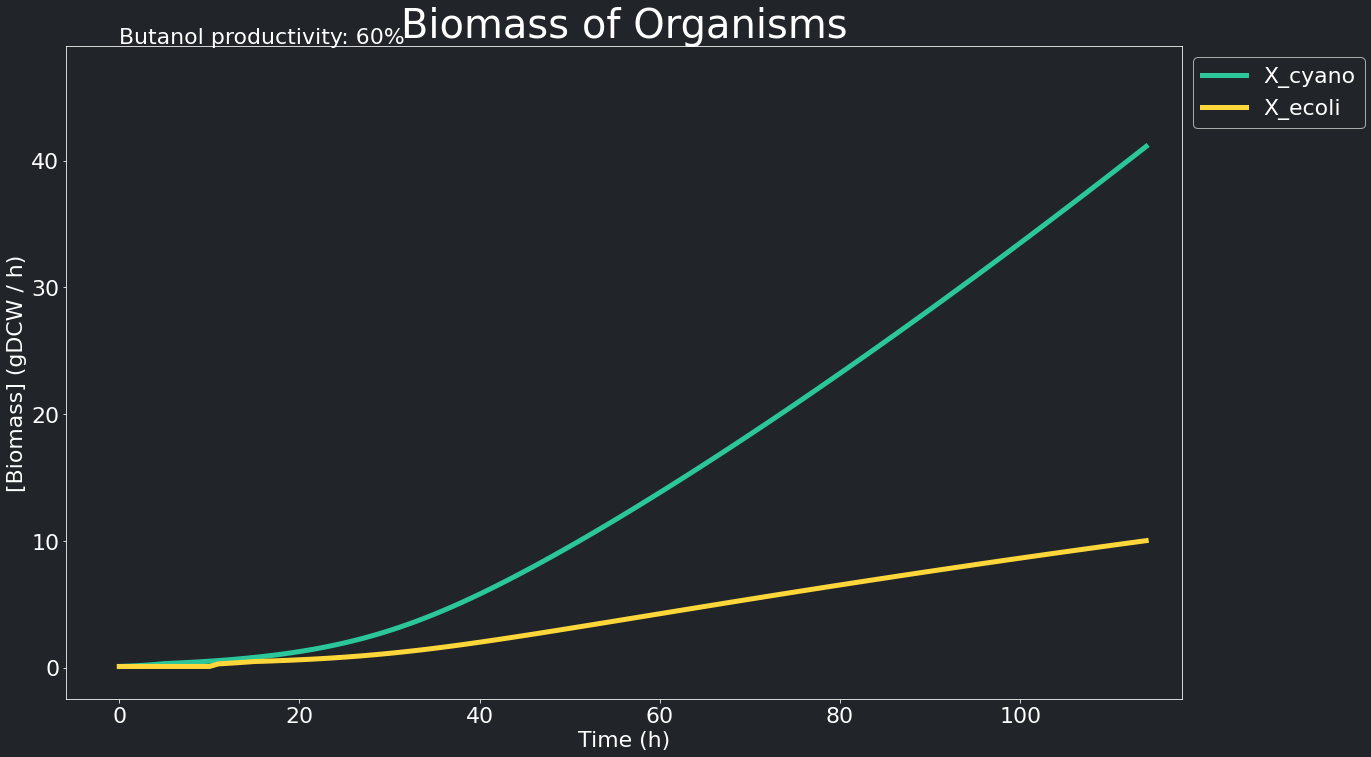

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


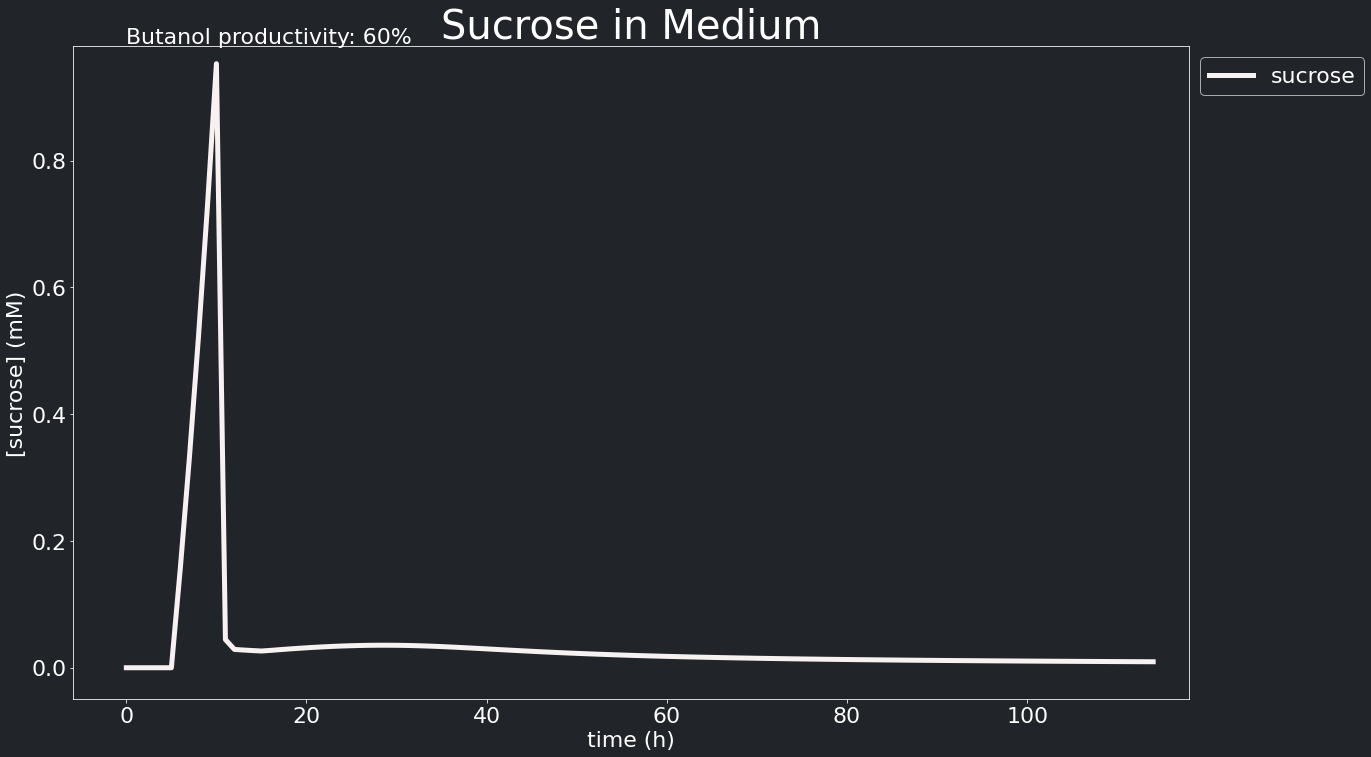

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


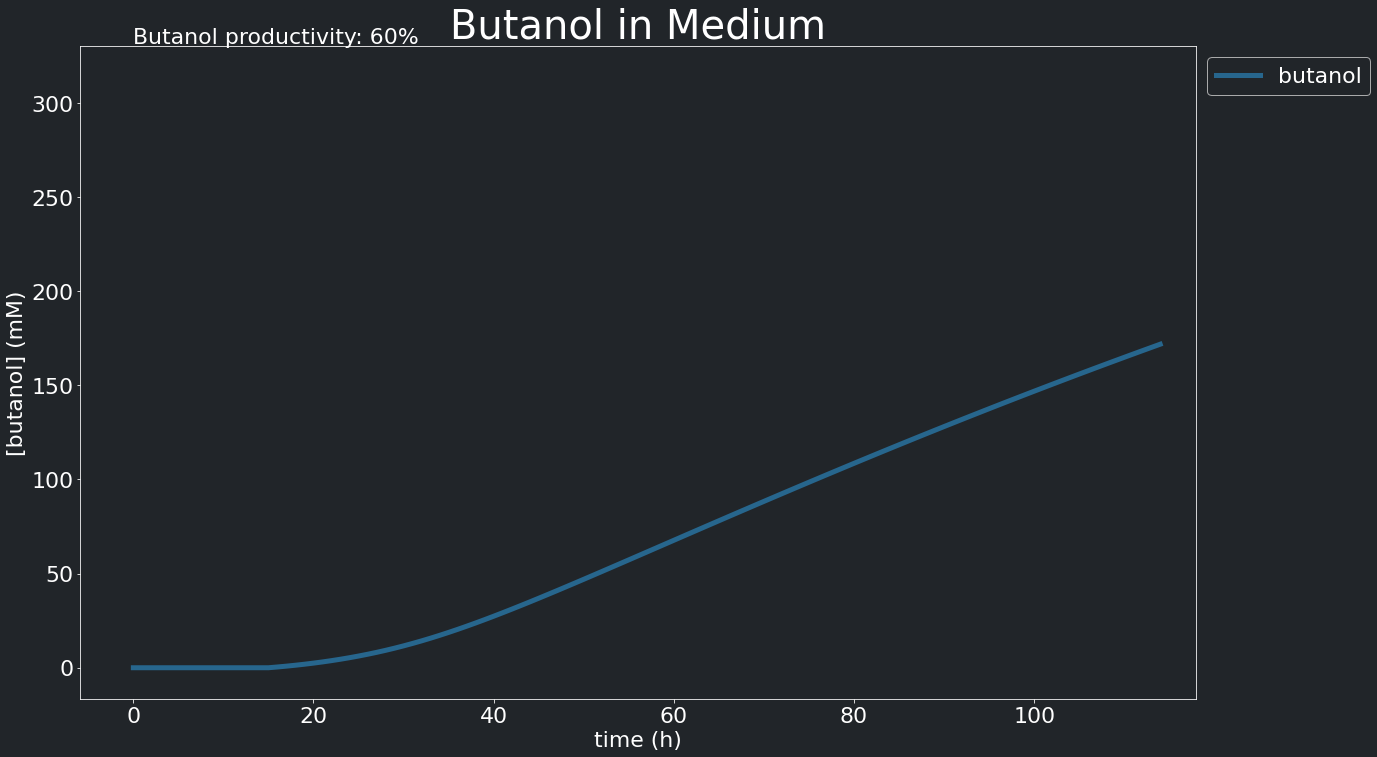

60 [1.20837268e+02 1.25455650e-01 4.11161820e+01 9.44465207e-03
 1.00228521e+01 1.71840168e+02]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


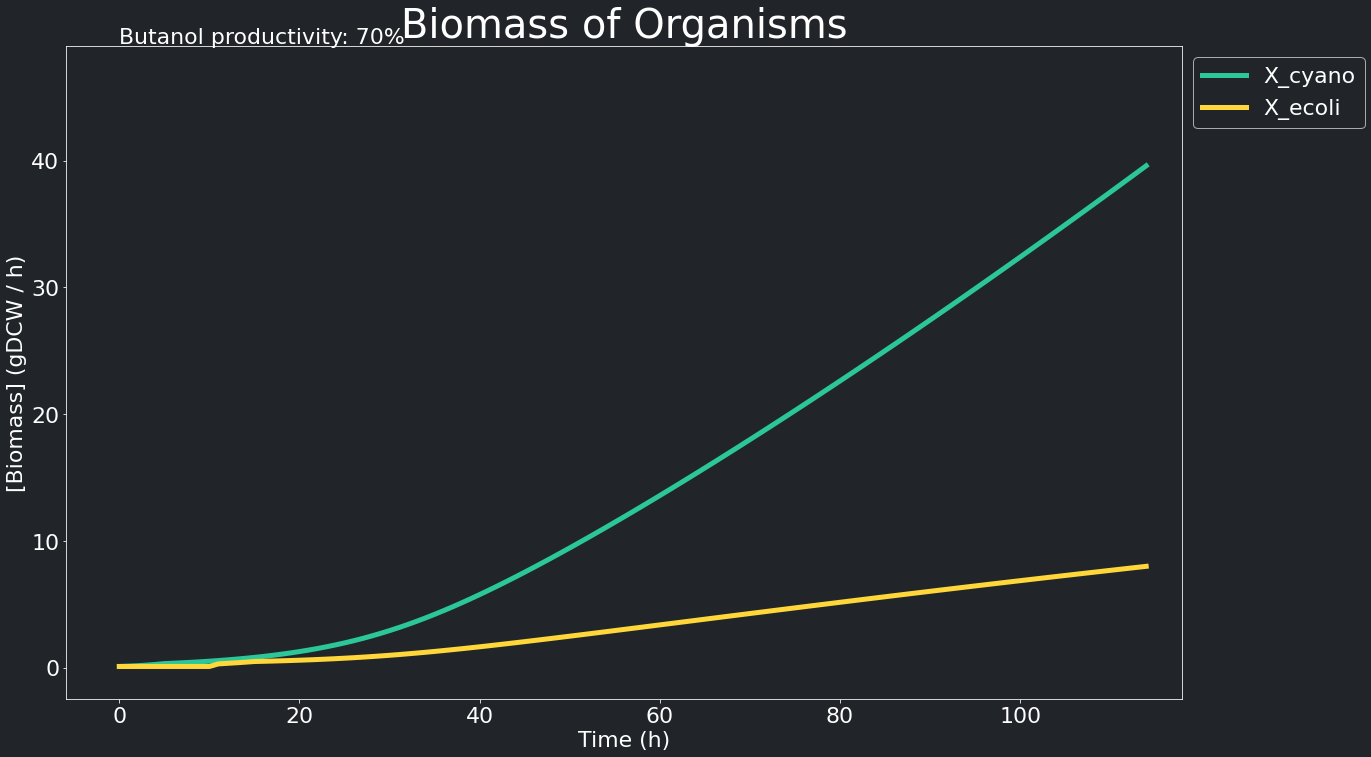

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


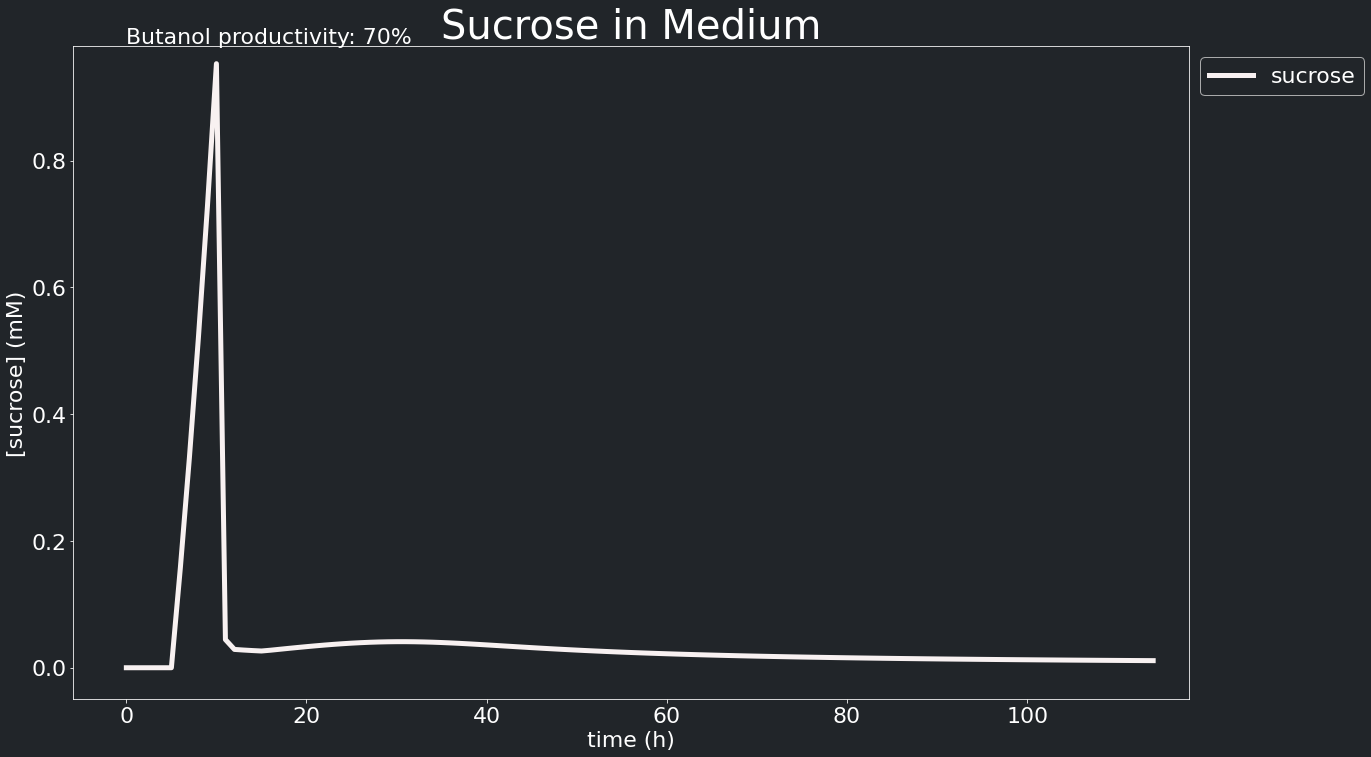

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


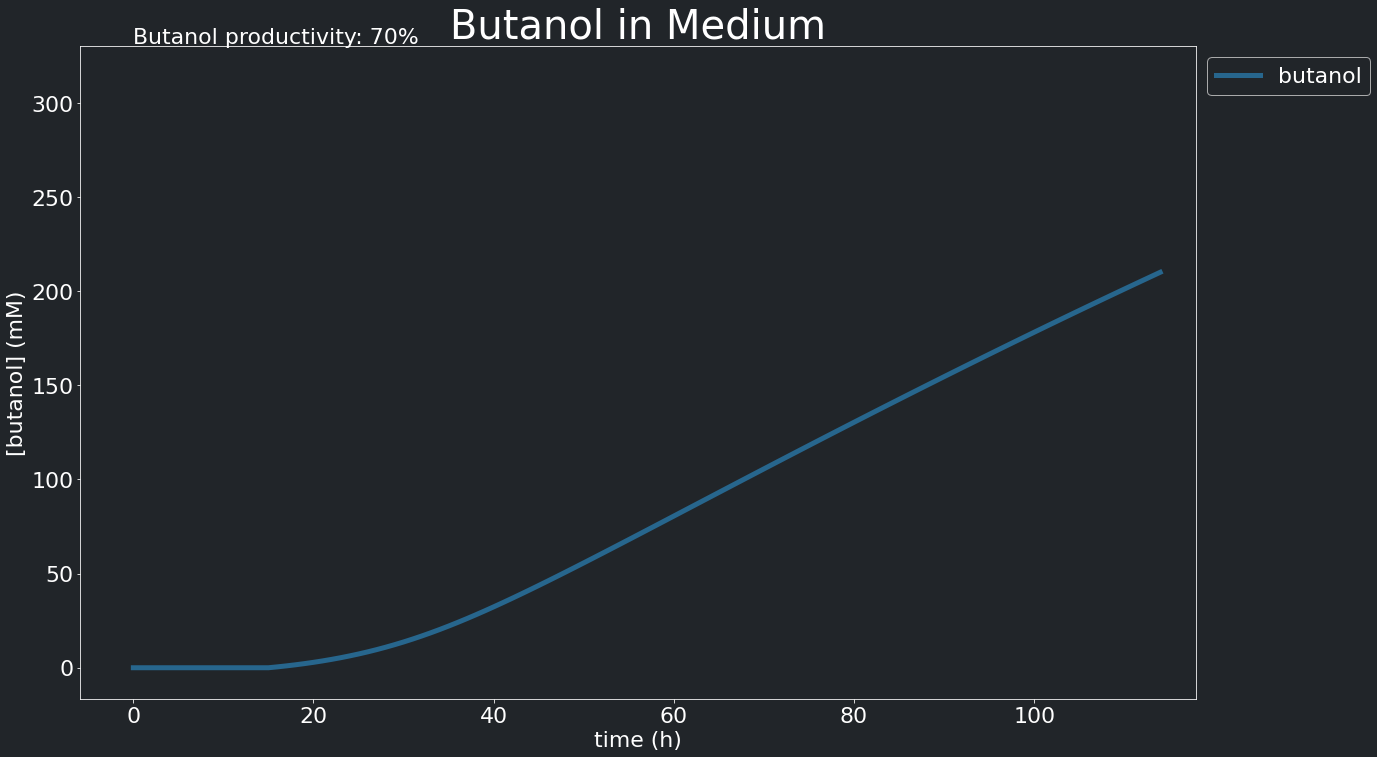

70 [1.20837124e+02 1.22504655e-01 3.95898966e+01 1.11904836e-02
 7.99738980e+00 2.10047291e+02]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


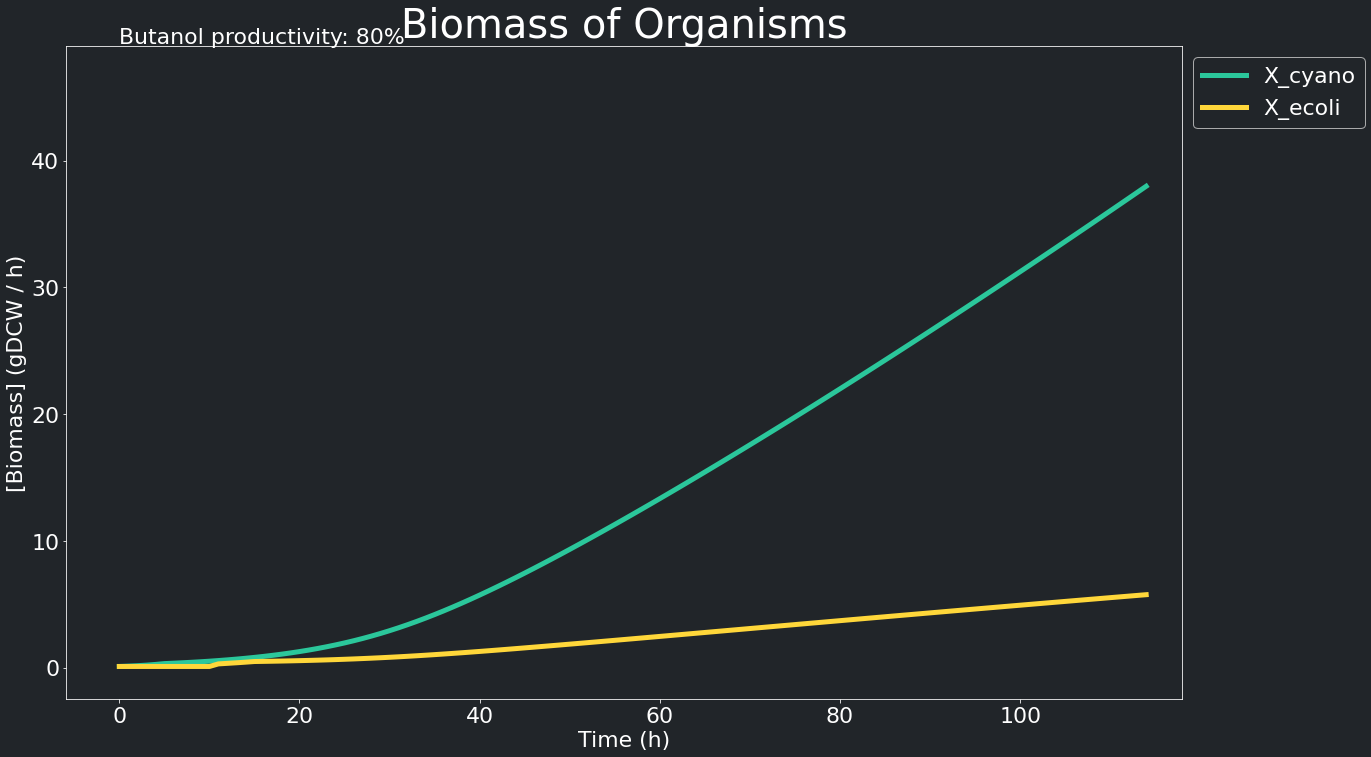

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


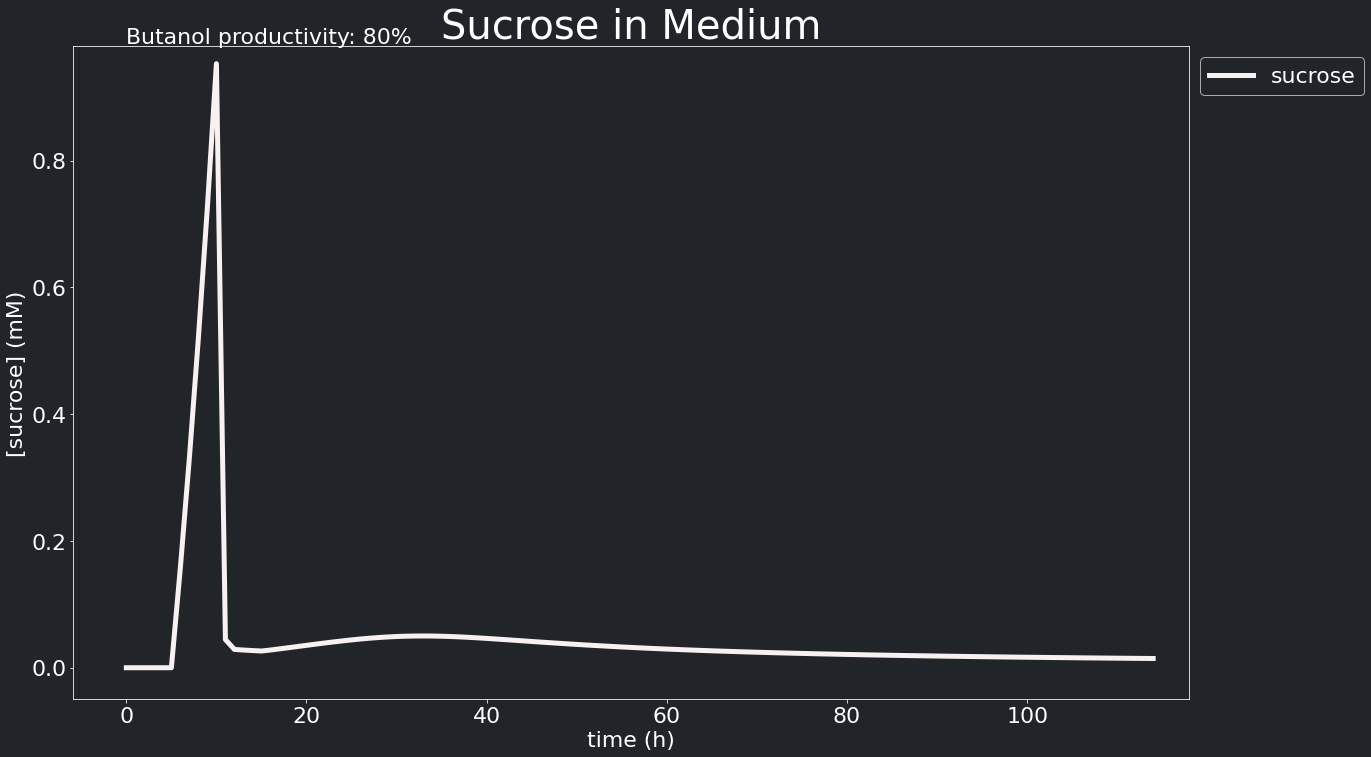

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


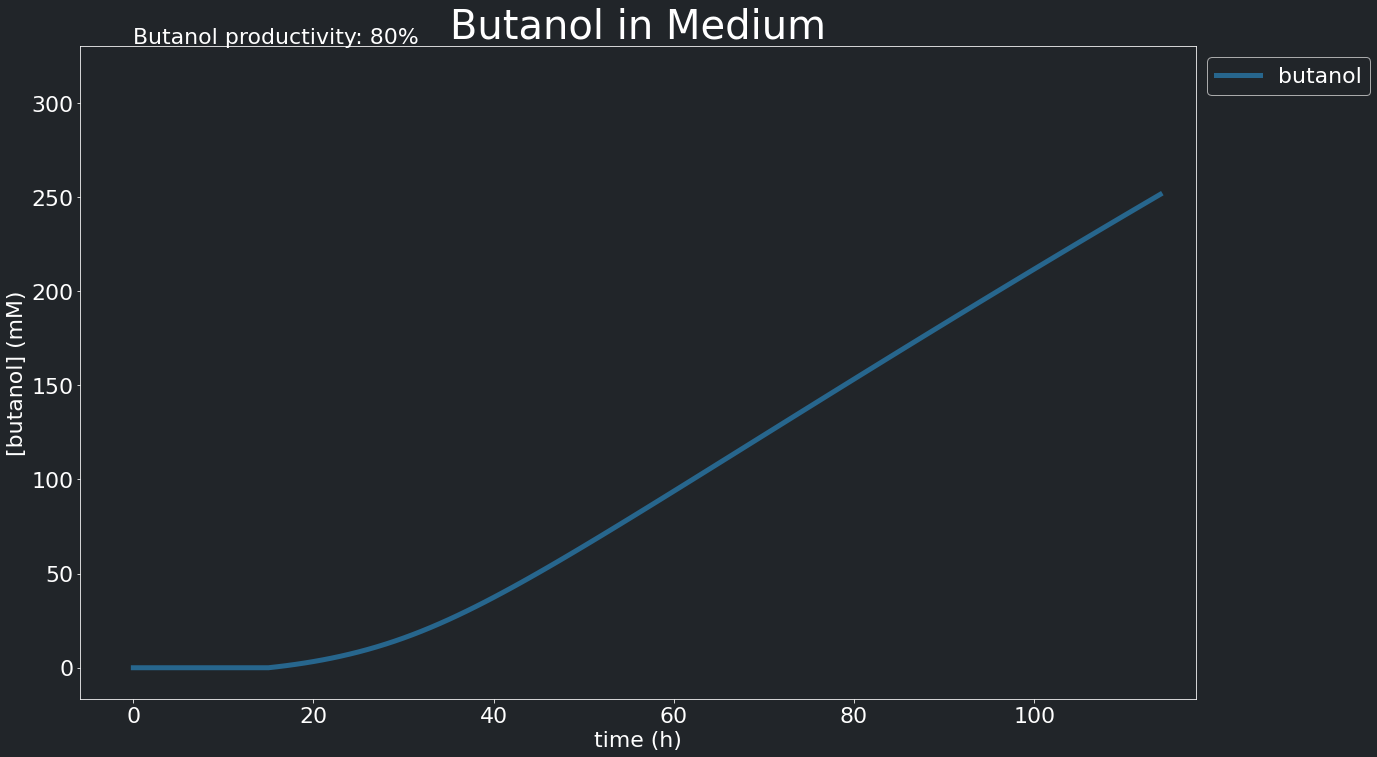

80 [1.20836939e+02 1.18732466e-01 3.79747596e+01 1.45697653e-02
 5.76150015e+00 2.51418532e+02]


<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


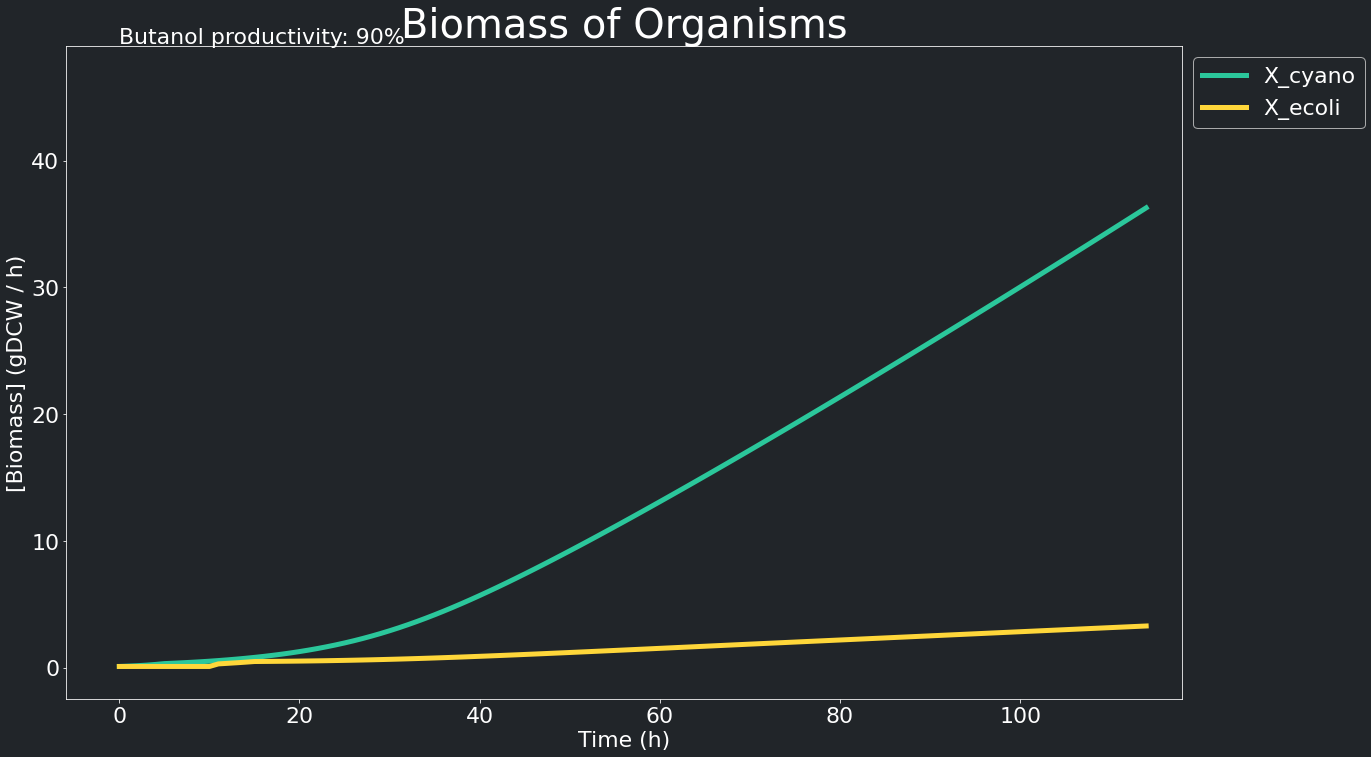

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


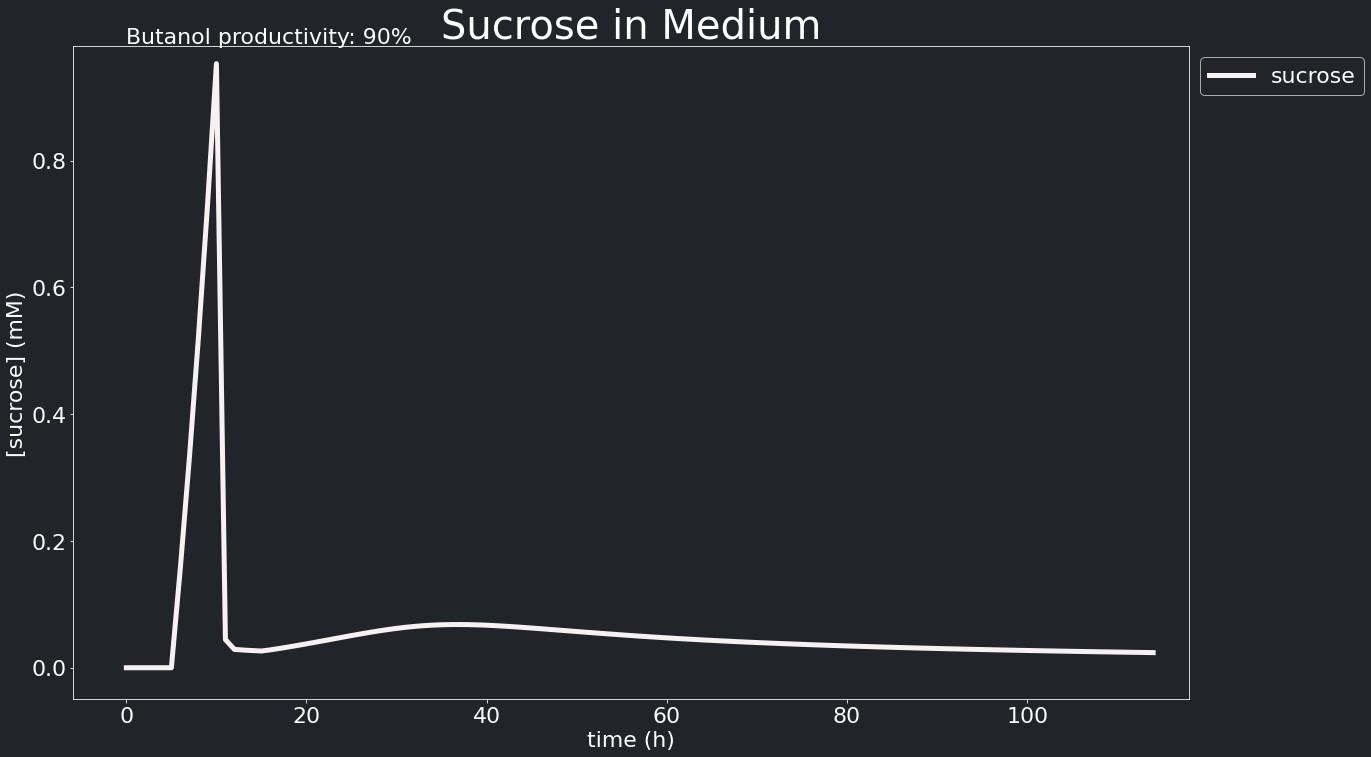

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


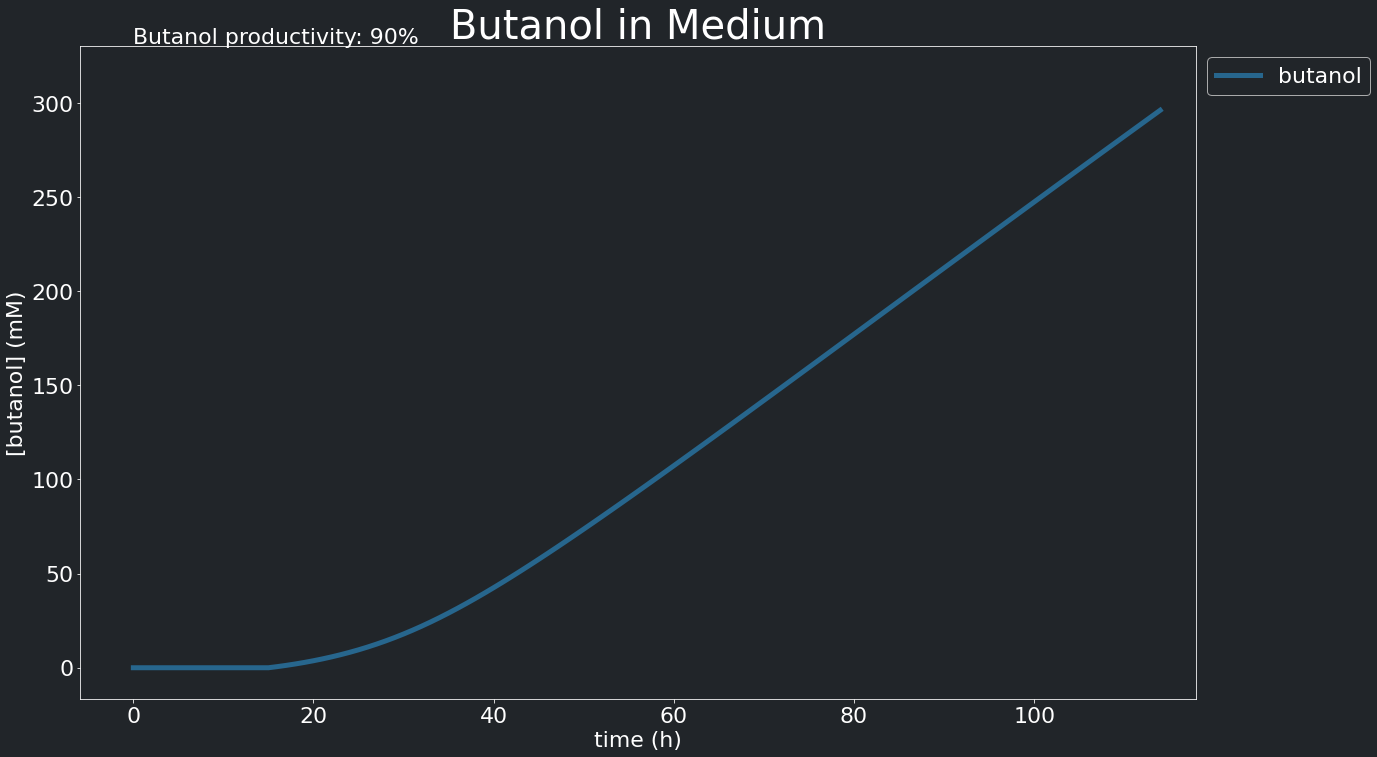

90 [1.20836714e+02 1.14140174e-01 3.62732310e+01 2.38629988e-02
 3.29266180e+00 2.96121650e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-16-addbf1082e99>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


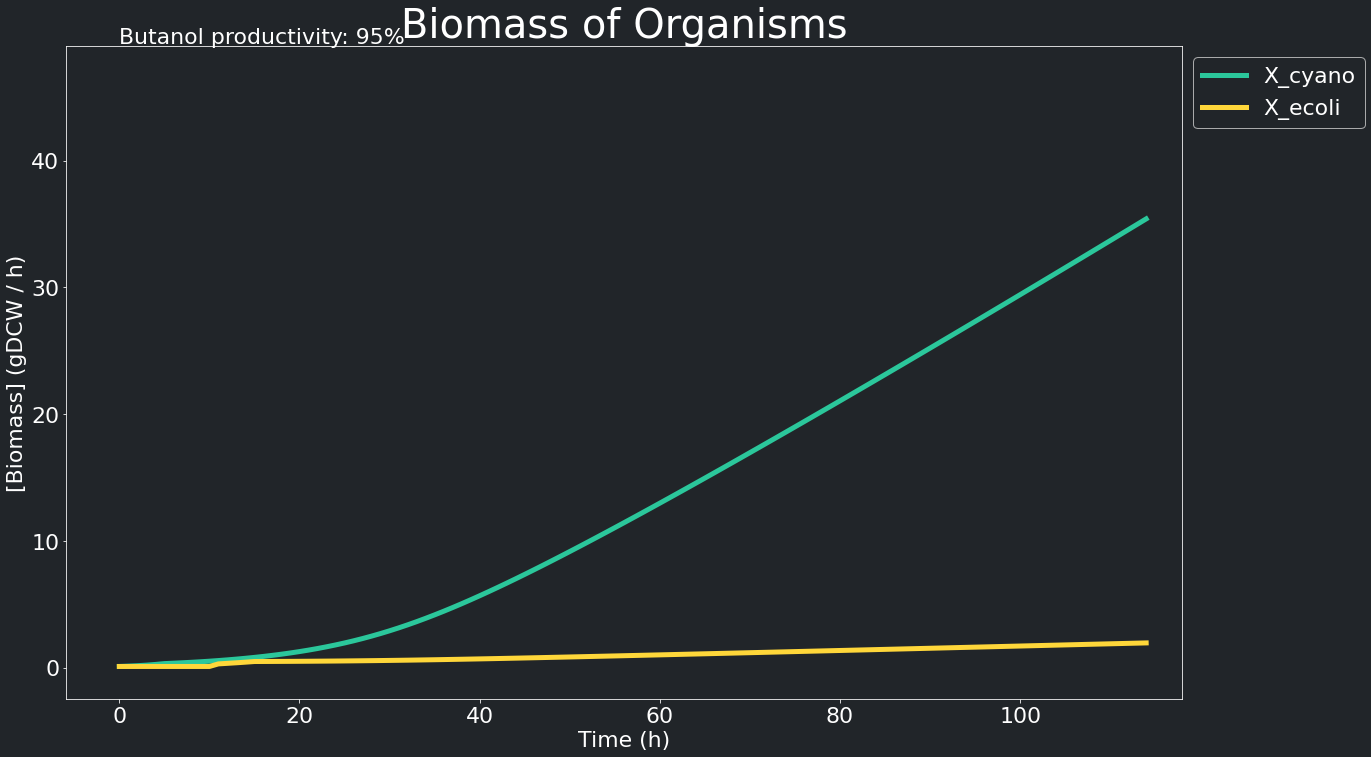

<ipython-input-16-addbf1082e99>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


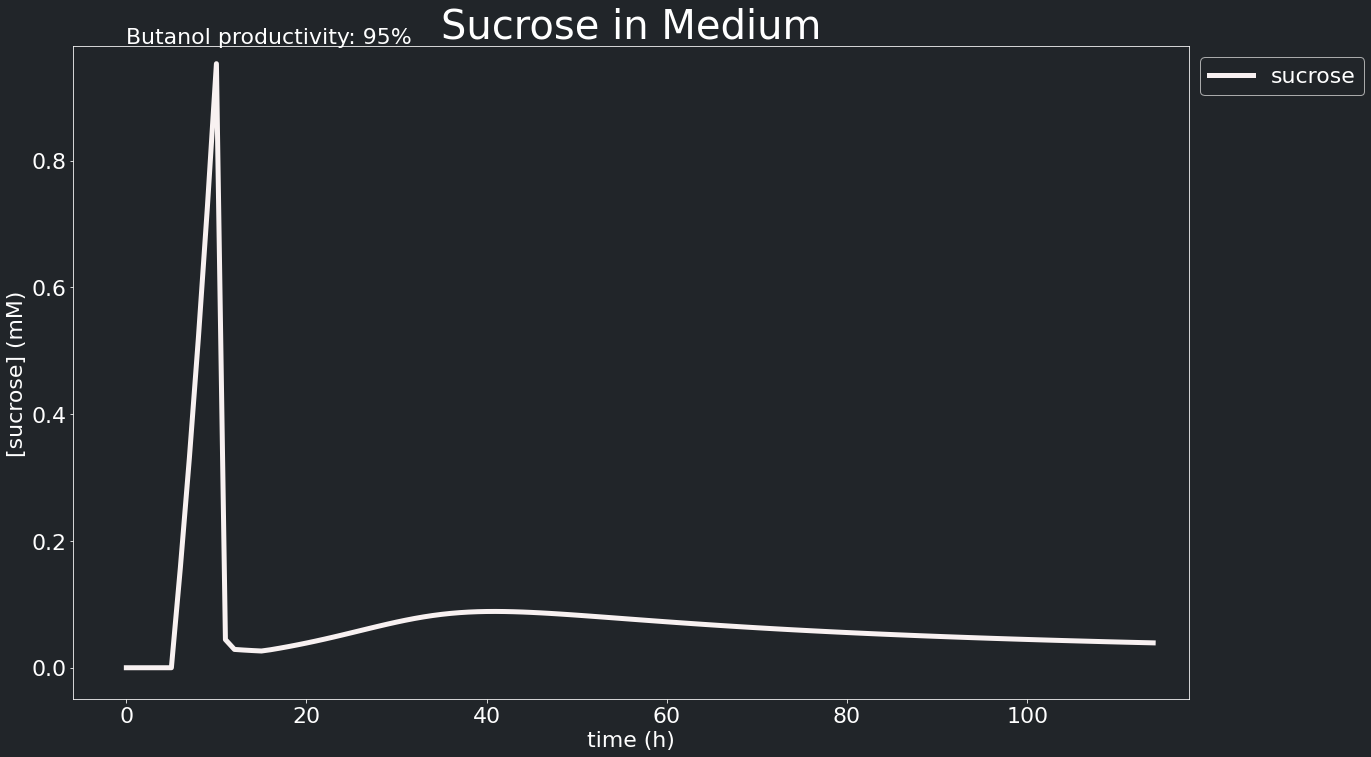

<ipython-input-16-addbf1082e99>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


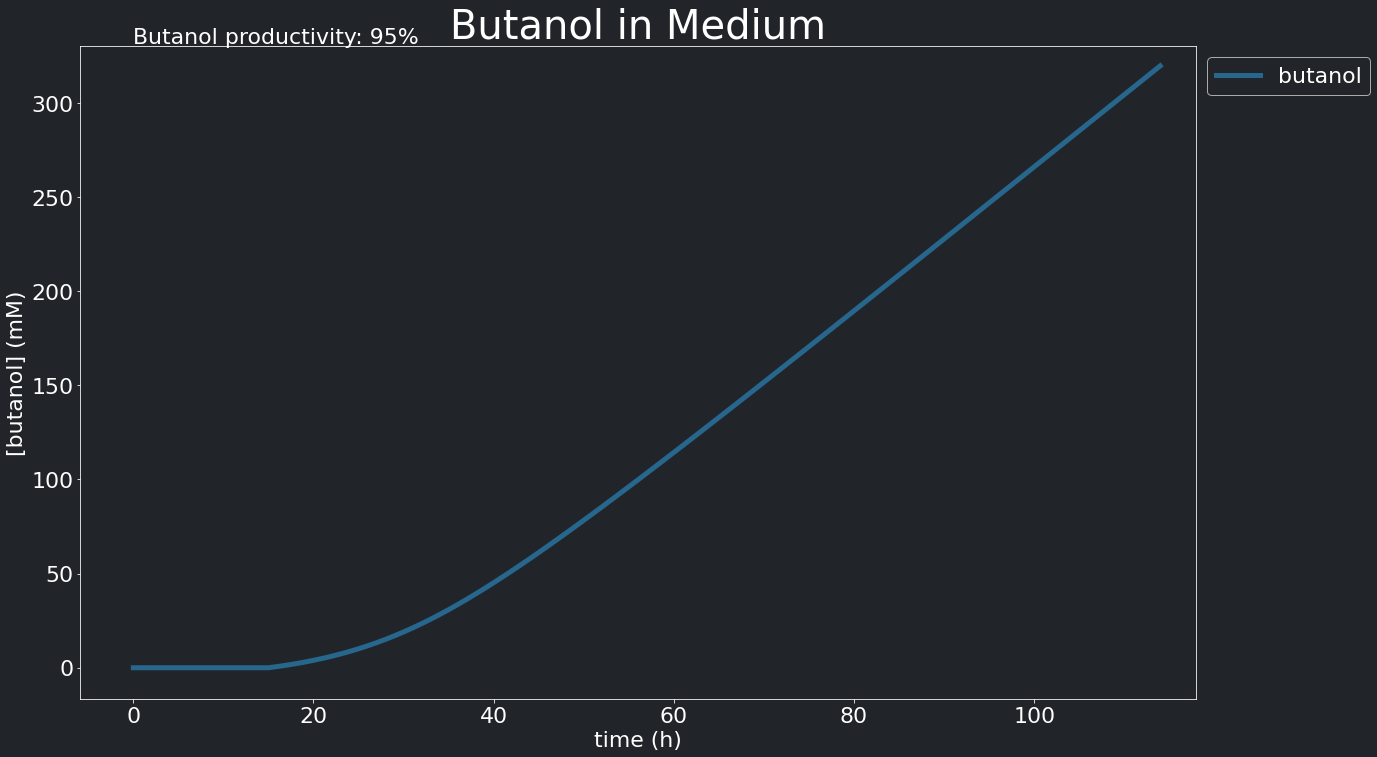

95 [1.20836576e+02 1.11319469e-01 3.54018628e+01 3.92412581e-02
 1.95795908e+00 3.19684126e+02]


In [16]:
sim_times = np.linspace(0, 114, 115)
#print(sim_times)
pars['yield_sucrose'] = 0.6
# solve ODEs
from scipy.integrate import odeint
for i in [10, 20, 40, 60, 70, 80, 90, 95]:
    pars['yield_butanol'] = i/100
    extra_params = (model_ecoli, model_cyano, pars)
    sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
    plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
    plt.xlabel("Time (h)")
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel("[Biomass] (gDCW / h)")
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*49, 'Butanol productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*49,49)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[sucrose] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*0.98, 'Butanol productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*0.98,0.98)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[butanol] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Butanol in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*330, 'Butanol productivity: '+str(i)+'%')
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*330,330)
    plt.show()
    print(i, sim_results[-1])

<ipython-input-17-a7e72d08284e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


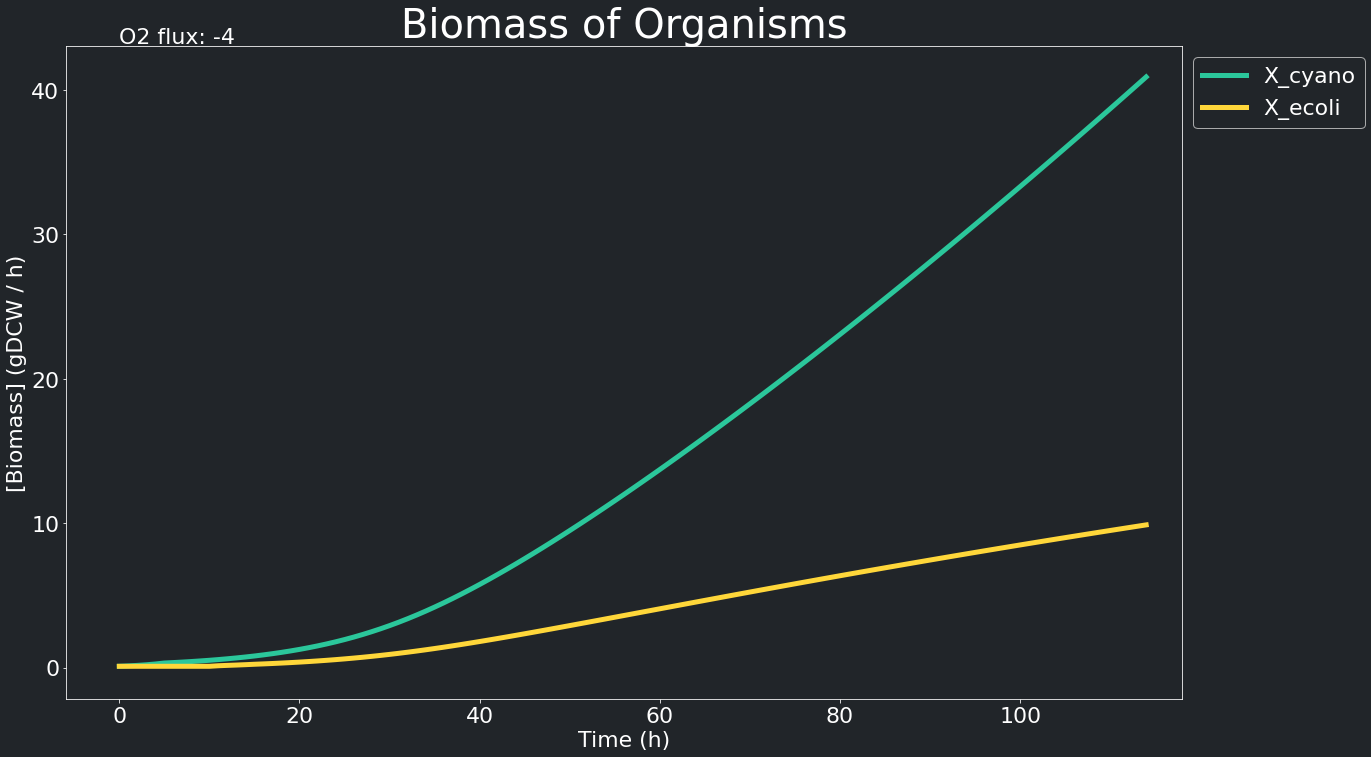

<ipython-input-17-a7e72d08284e>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


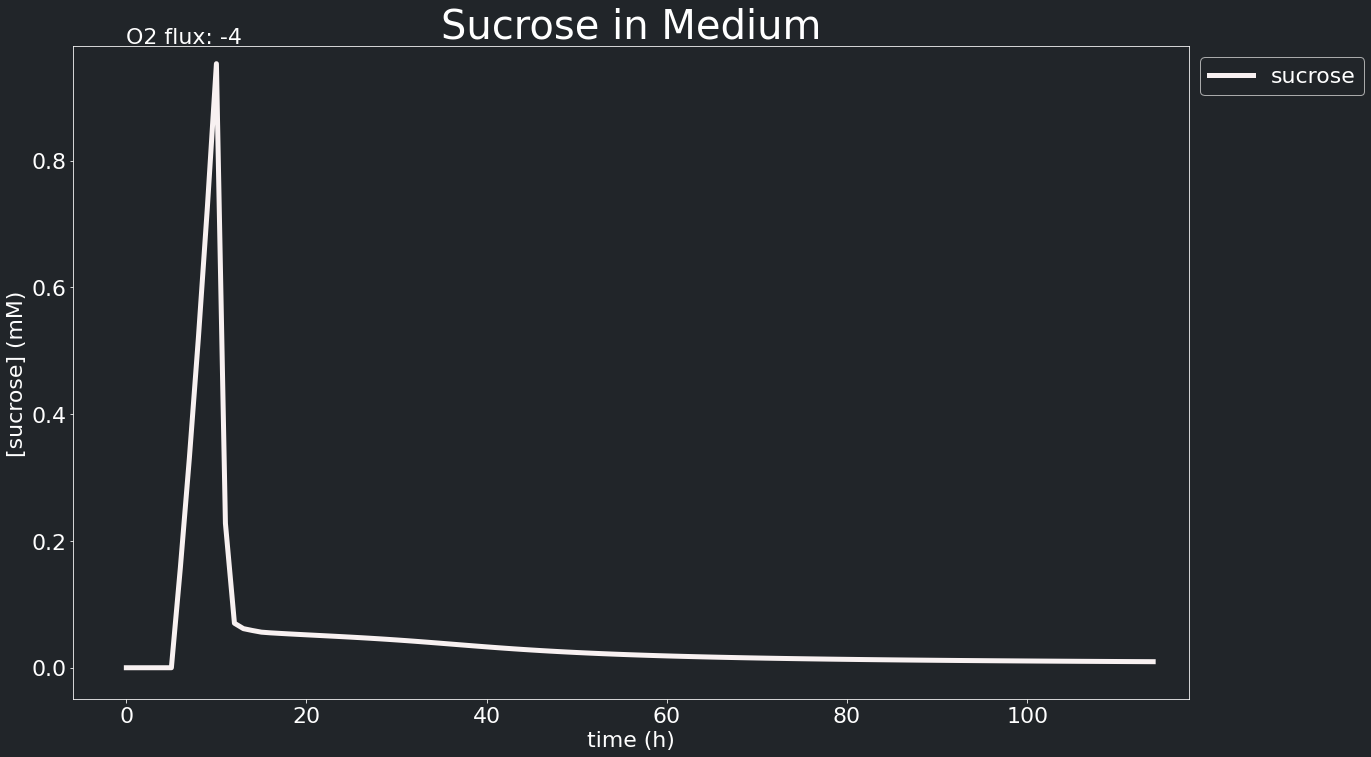

<ipython-input-17-a7e72d08284e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


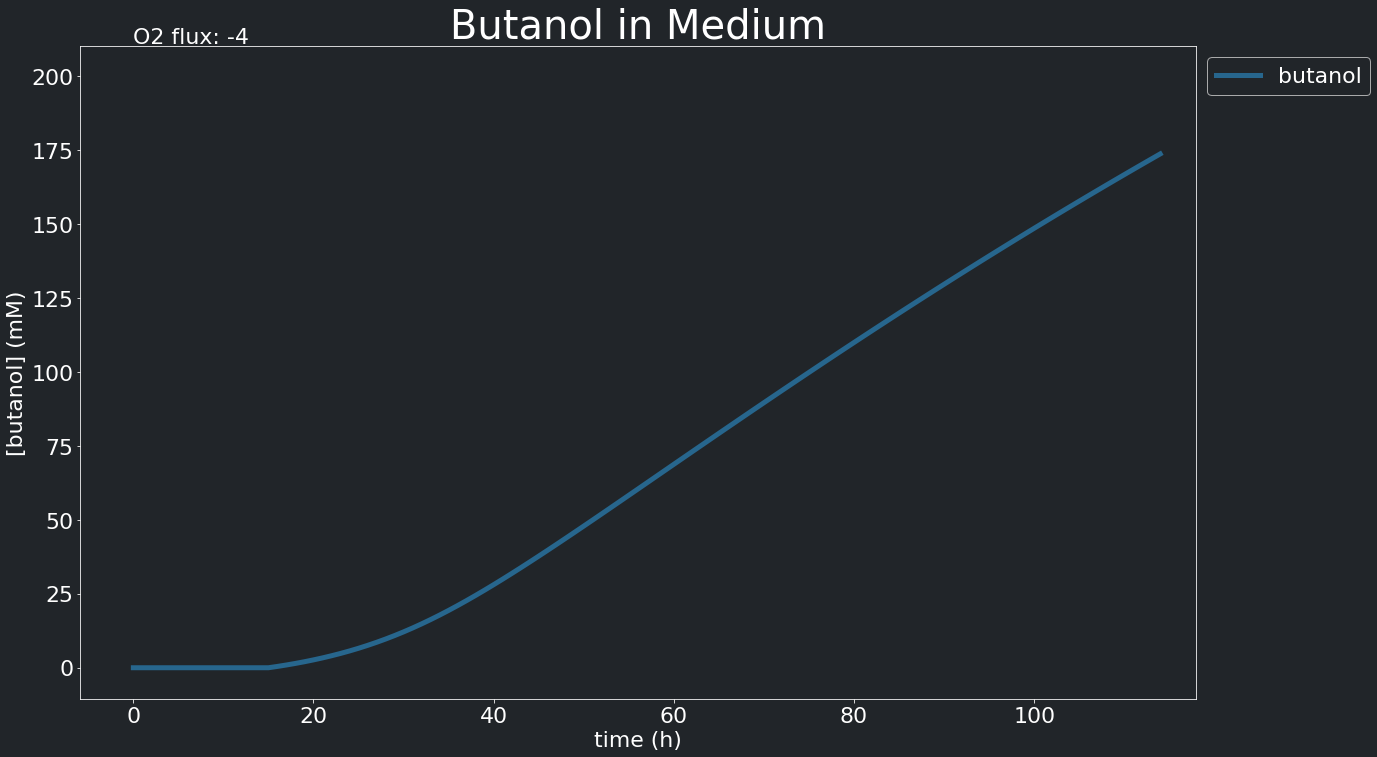

-4 [1.20837281e+02 1.25713417e-01 4.08912849e+01 9.54081191e-03
 9.88711785e+00 1.73678994e+02]


<ipython-input-17-a7e72d08284e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


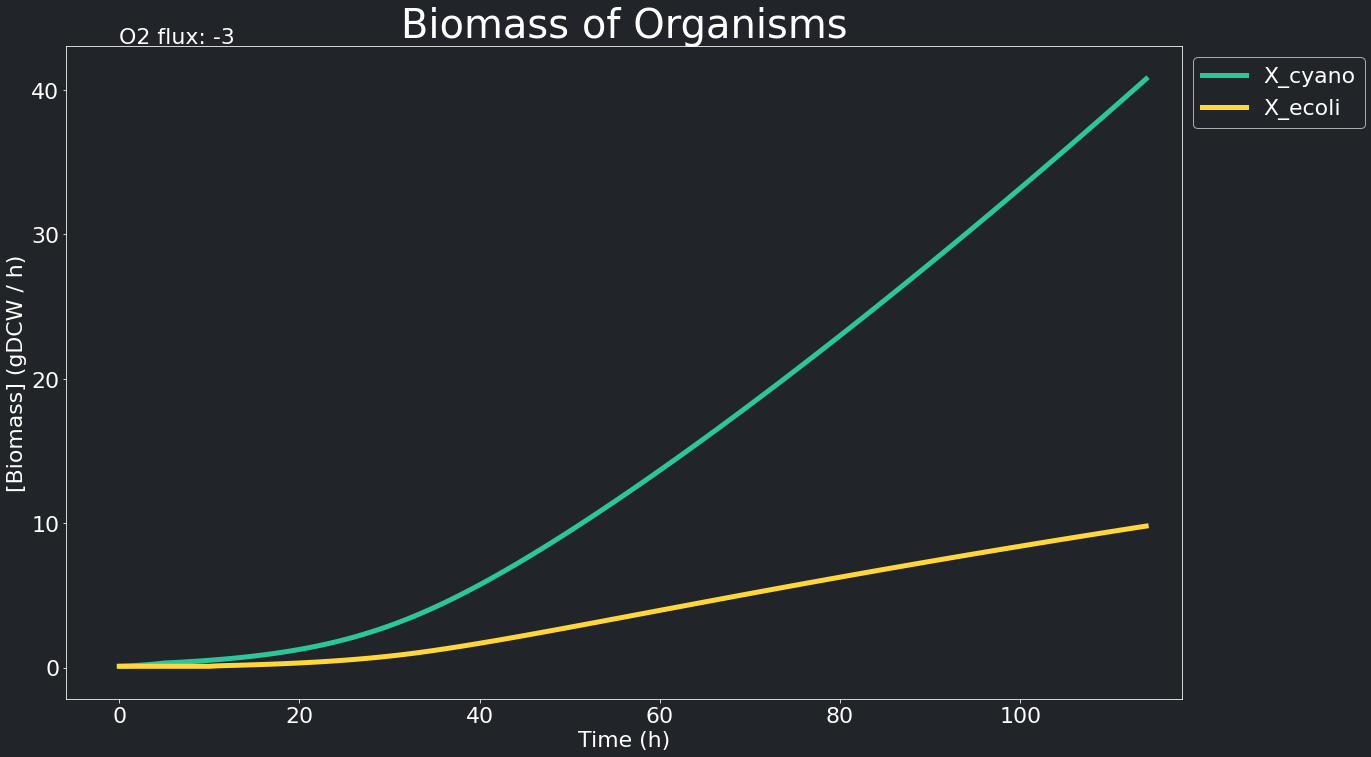

<ipython-input-17-a7e72d08284e>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


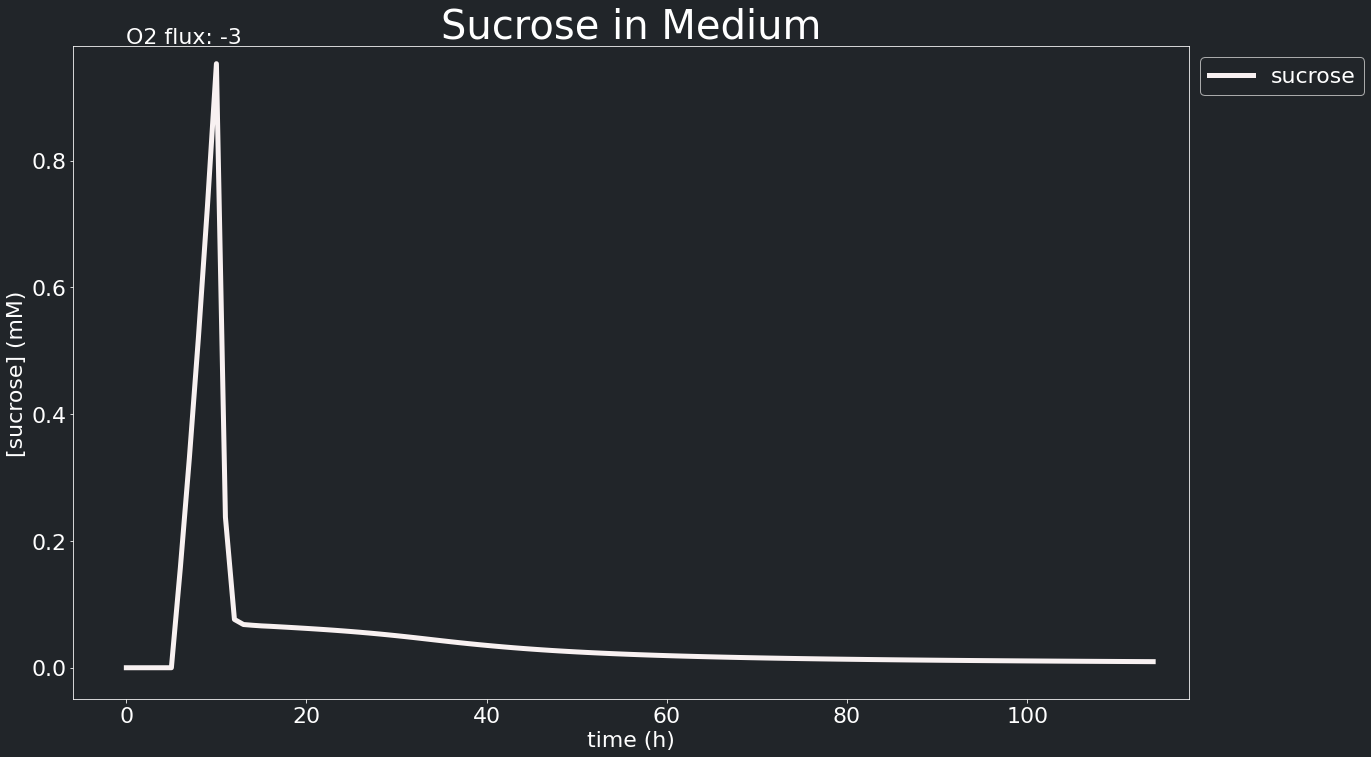

<ipython-input-17-a7e72d08284e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


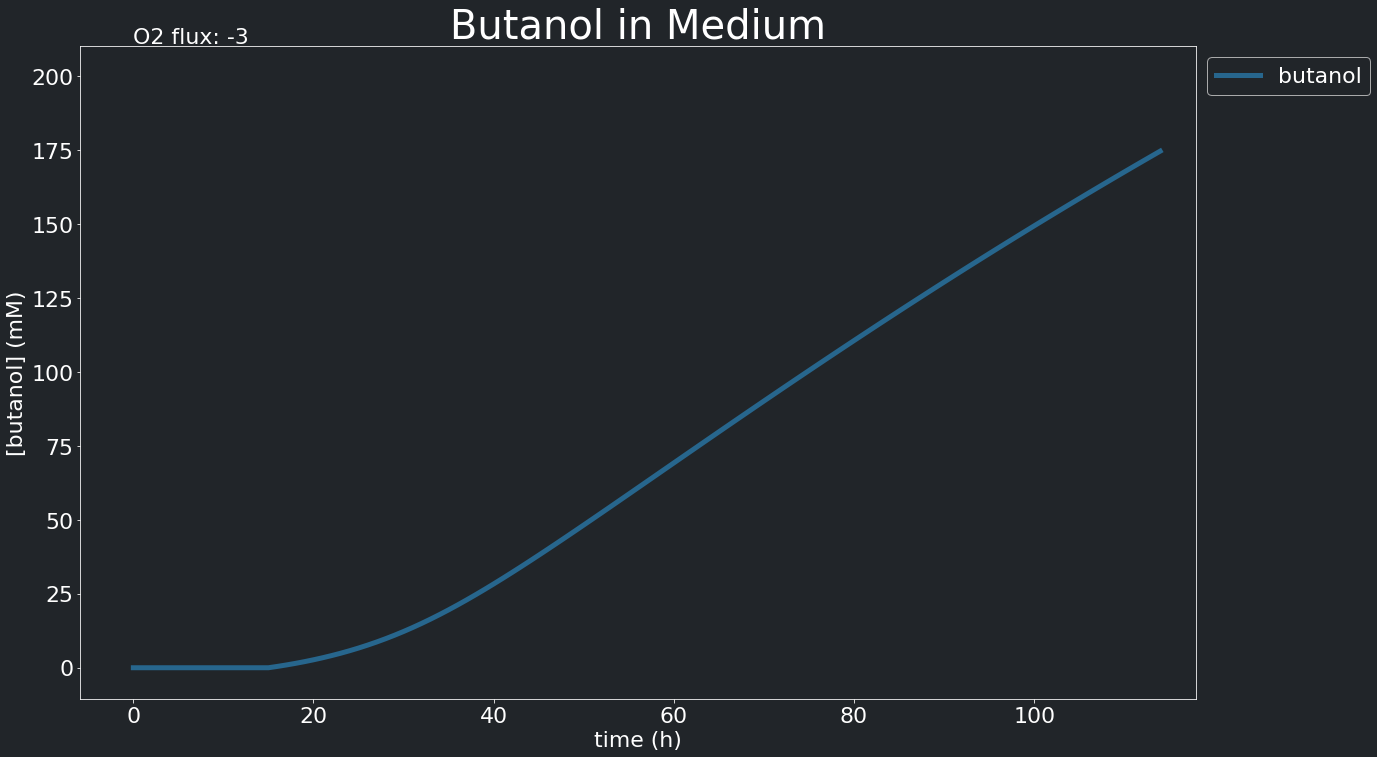

-3 [1.20837288e+02 1.25859555e-01 4.07579710e+01 9.60066292e-03
 9.80452469e+00 1.74616487e+02]


<ipython-input-17-a7e72d08284e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


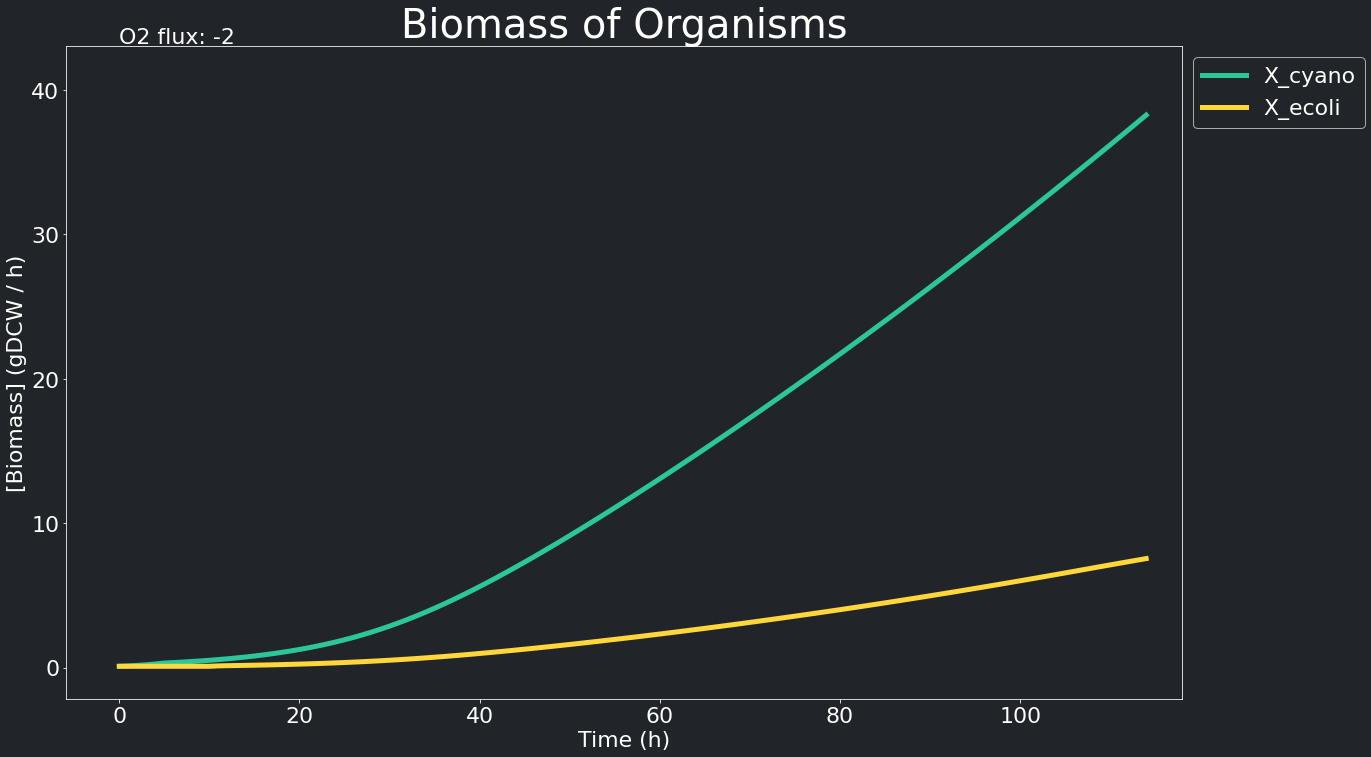

<ipython-input-17-a7e72d08284e>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


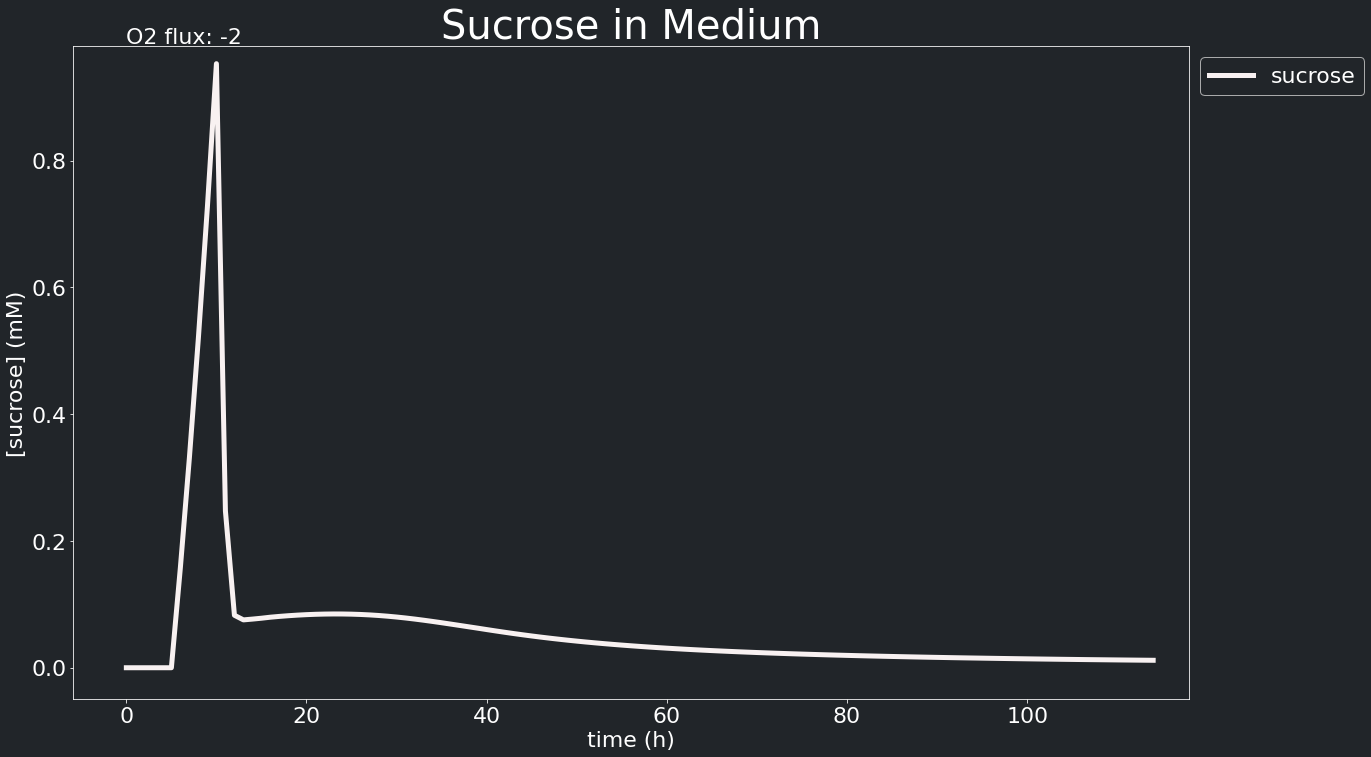

<ipython-input-17-a7e72d08284e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


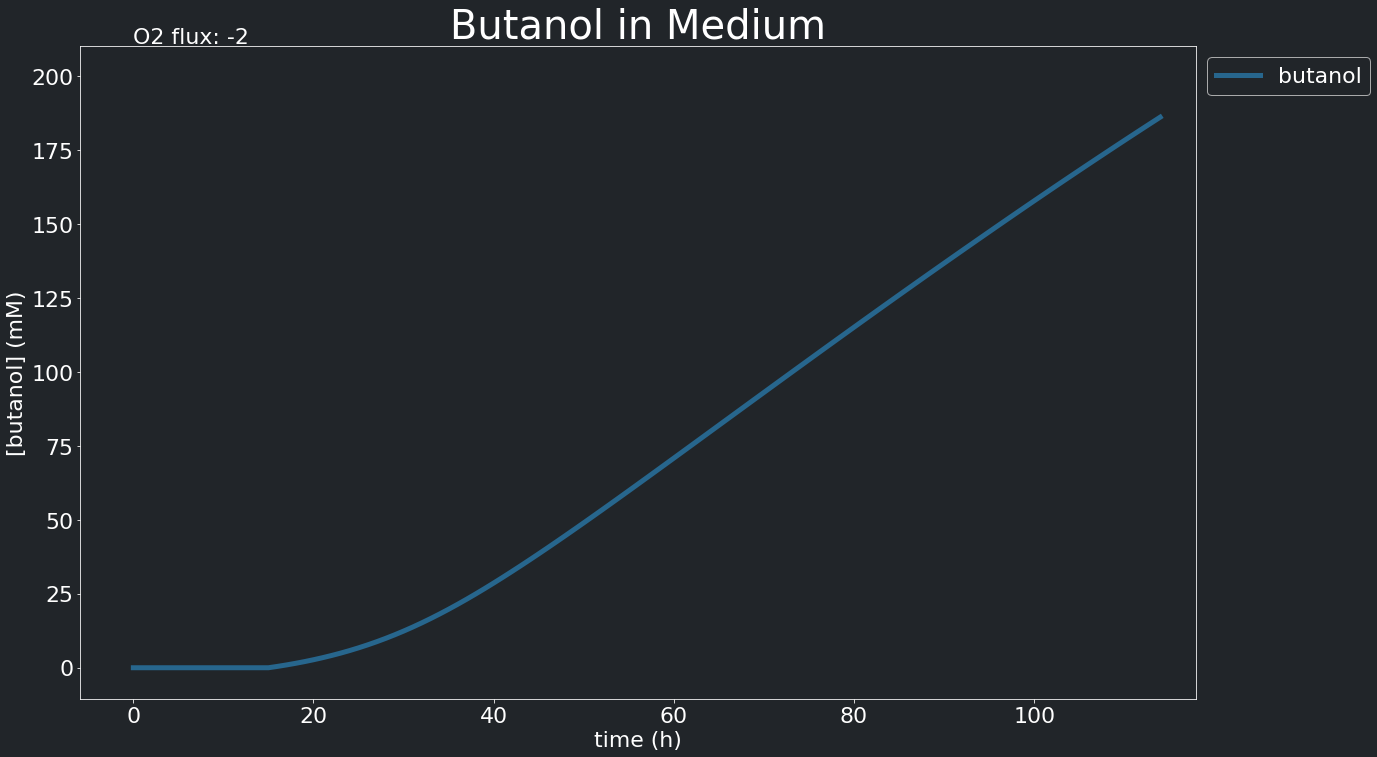

-2 [1.20837298e+02 1.26072289e-01 3.82520830e+01 1.17527755e-02
 7.55480175e+00 1.86101617e+02]


<ipython-input-17-a7e72d08284e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


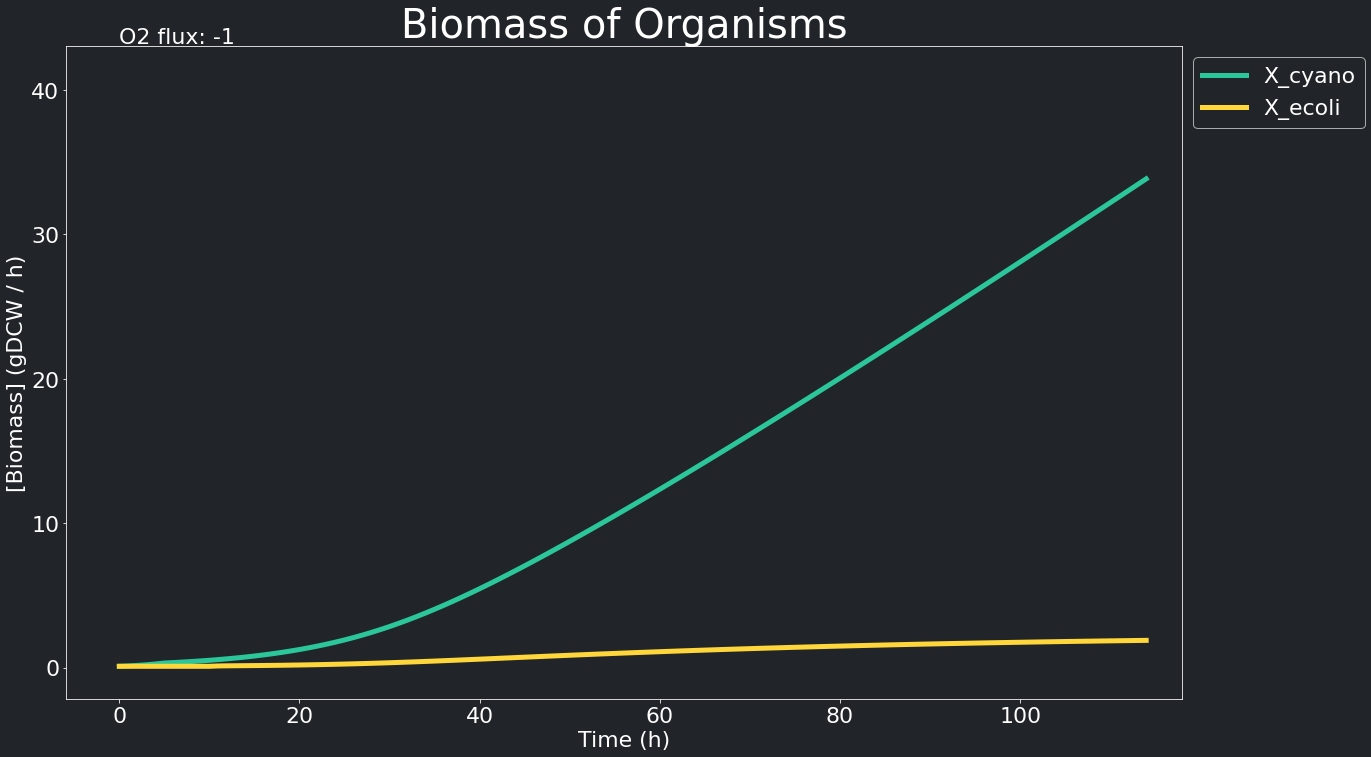

<ipython-input-17-a7e72d08284e>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


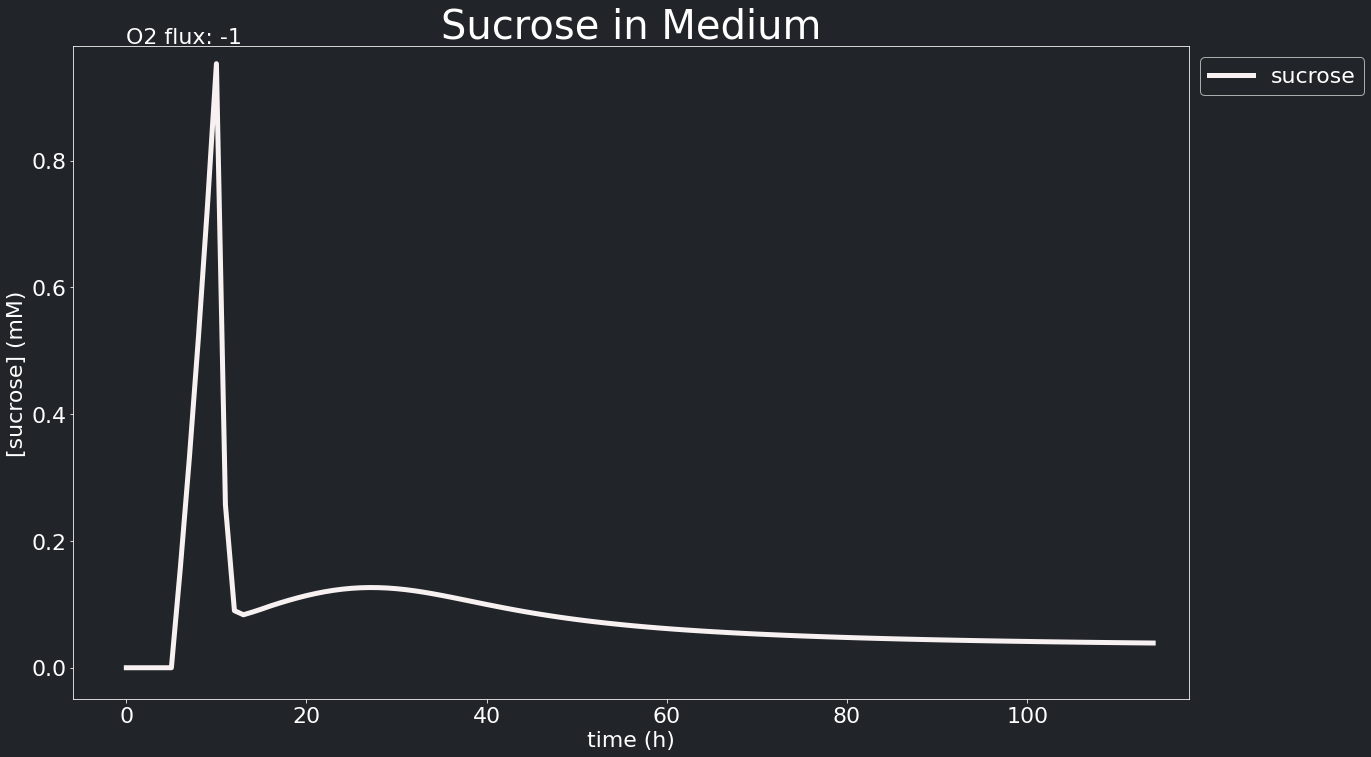

<ipython-input-17-a7e72d08284e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


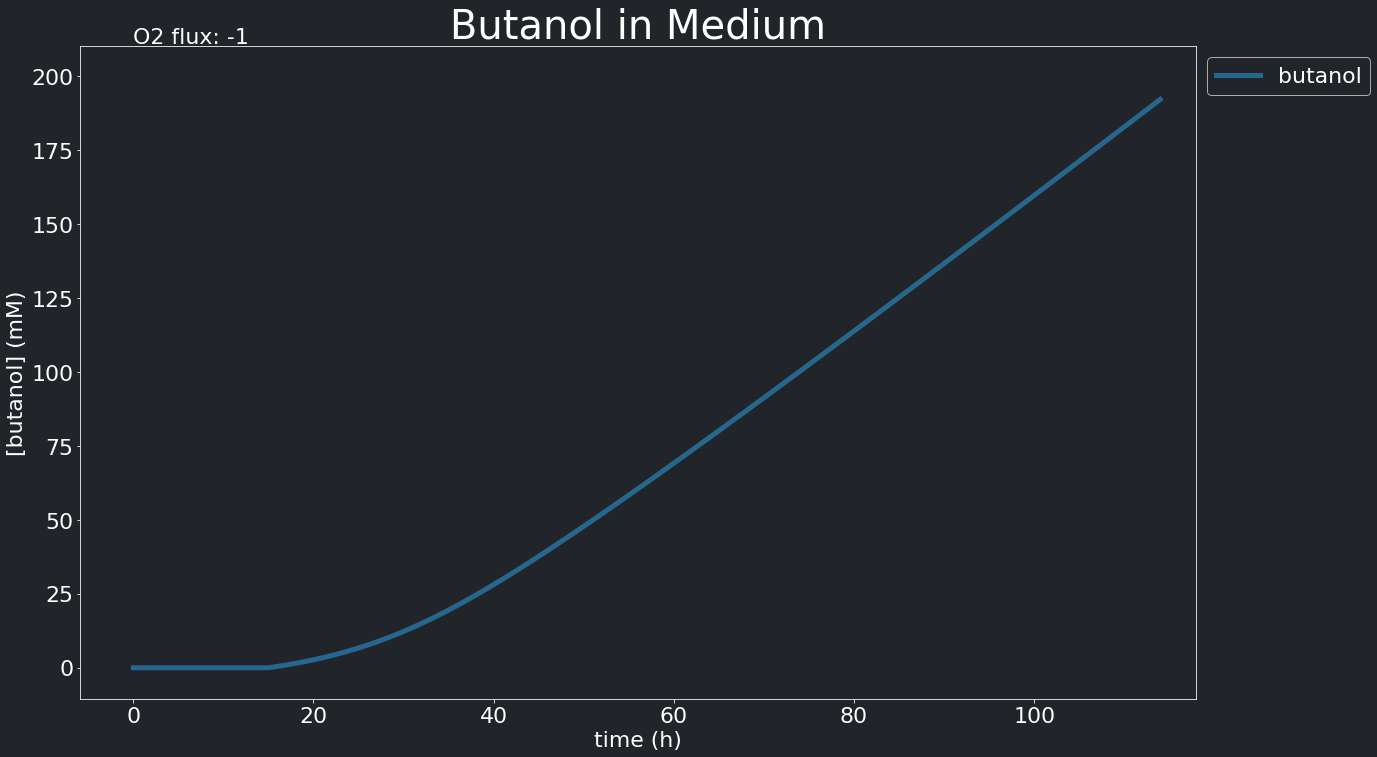

-1 [1.20836613e+02 1.12071194e-01 3.38369323e+01 3.89777365e-02
 1.89456060e+00 1.92085493e+02]


<ipython-input-17-a7e72d08284e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


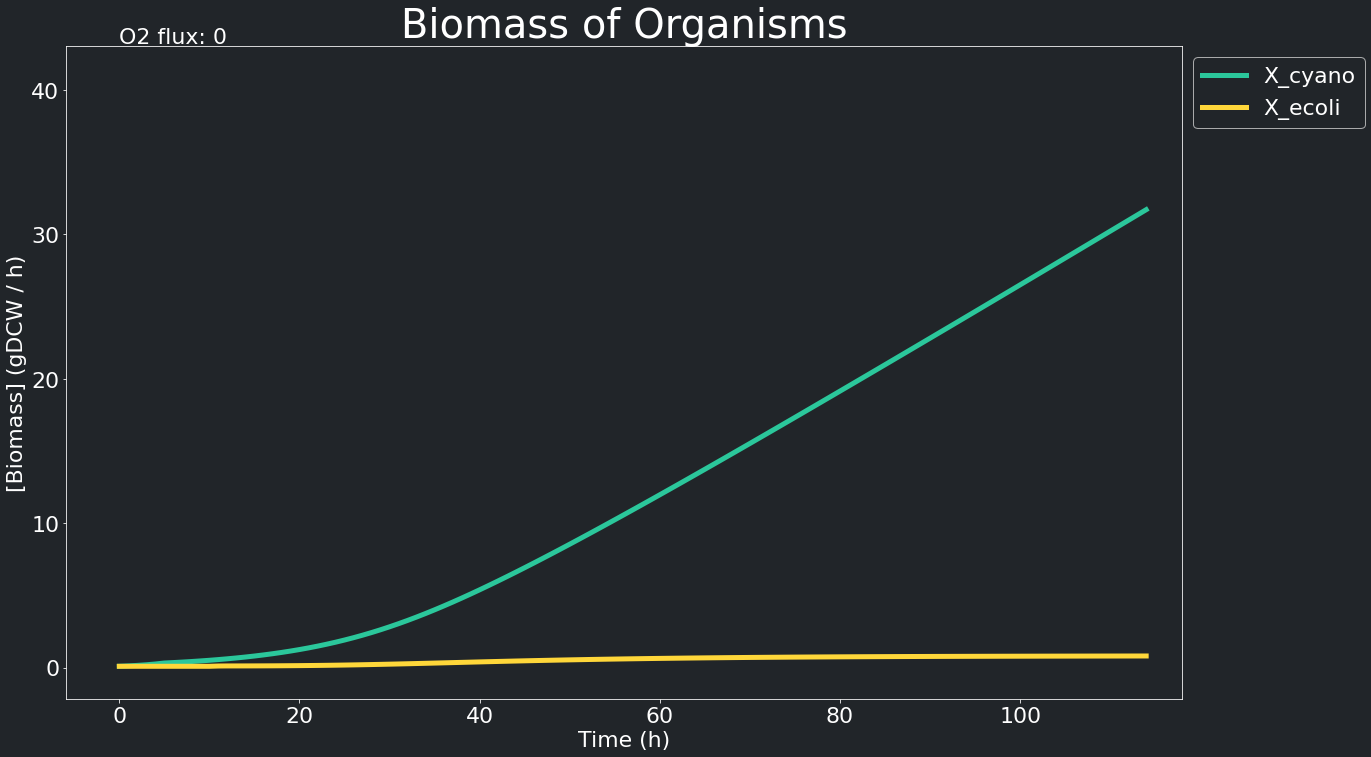

<ipython-input-17-a7e72d08284e>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


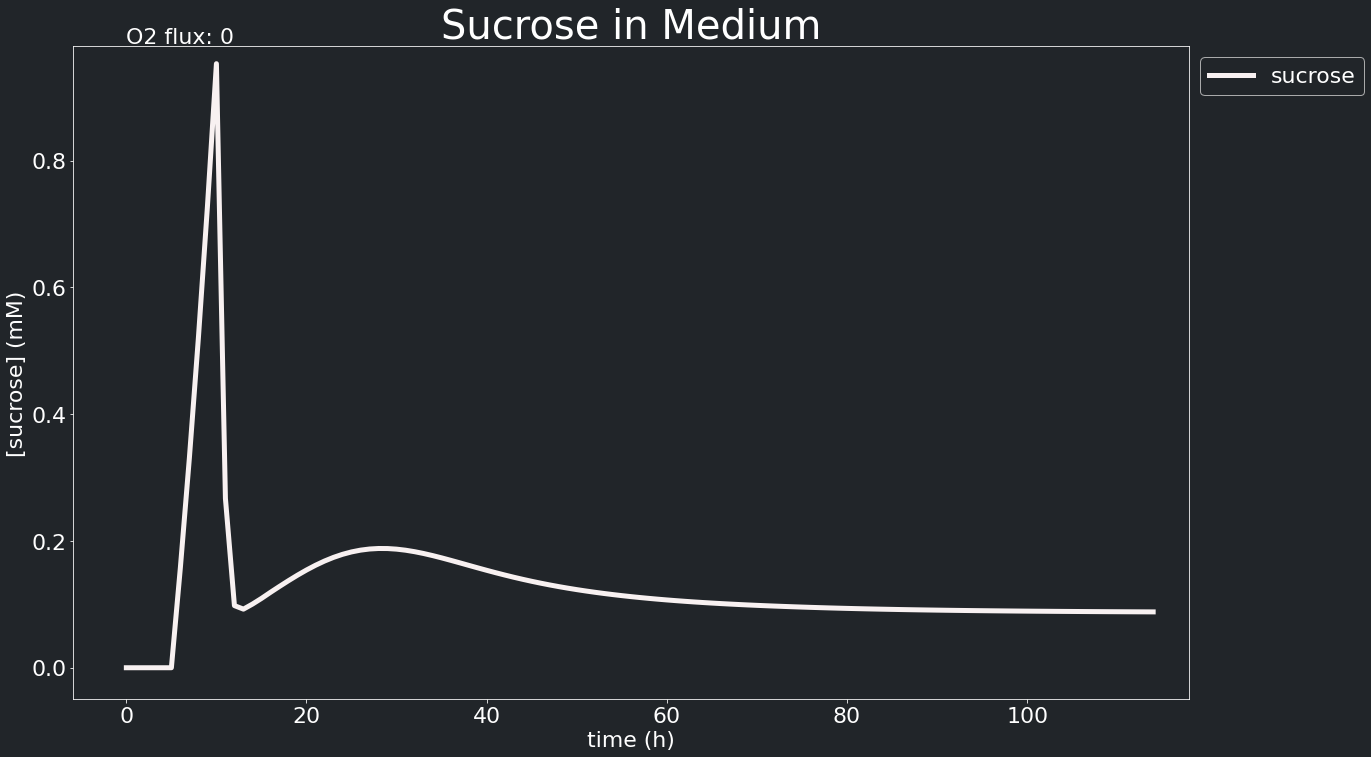

<ipython-input-17-a7e72d08284e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


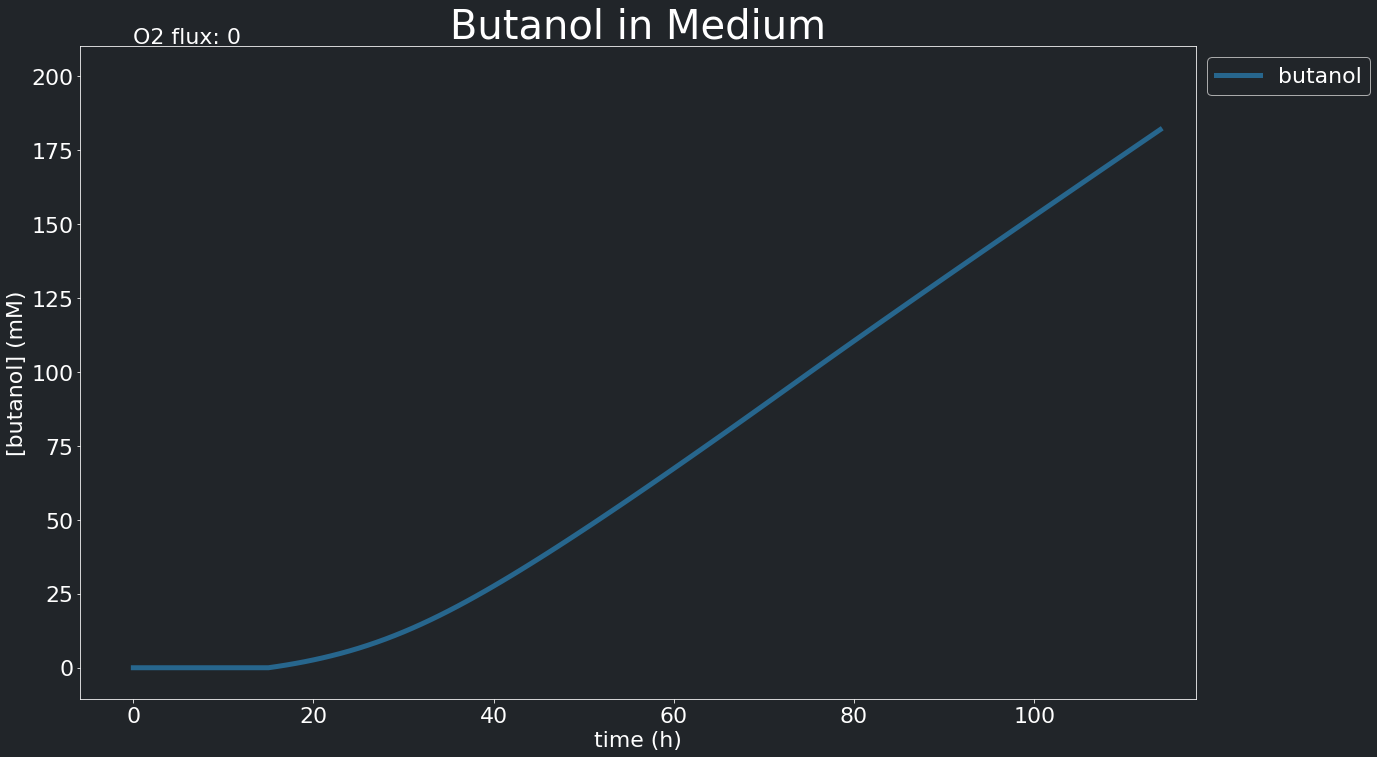

0 [1.20836380e+02 1.07319399e-01 3.17034151e+01 8.80960479e-02
 8.13345380e-01 1.81893300e+02]


In [17]:
sim_times = np.linspace(0, 114, 115)
#print(sim_times)
pars['yield_butanol'] = 0.6
# solve ODEs
from scipy.integrate import odeint
for i in [-4, -3, -2, -1, 0]:
    model_ecoli.reactions.get_by_id('EX_o2_e').lower_bound = i
    extra_params = (model_ecoli, model_cyano, pars)
    sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
    plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
    plt.xlabel("Time (h)")
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel("[Biomass] (gDCW / h)")
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*43, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*43,43)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[sucrose] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*0.98, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*0.98,0.98)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[butanol] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Butanol in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*210, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*210,210)
    plt.show()
    print(i, sim_results[-1])

<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


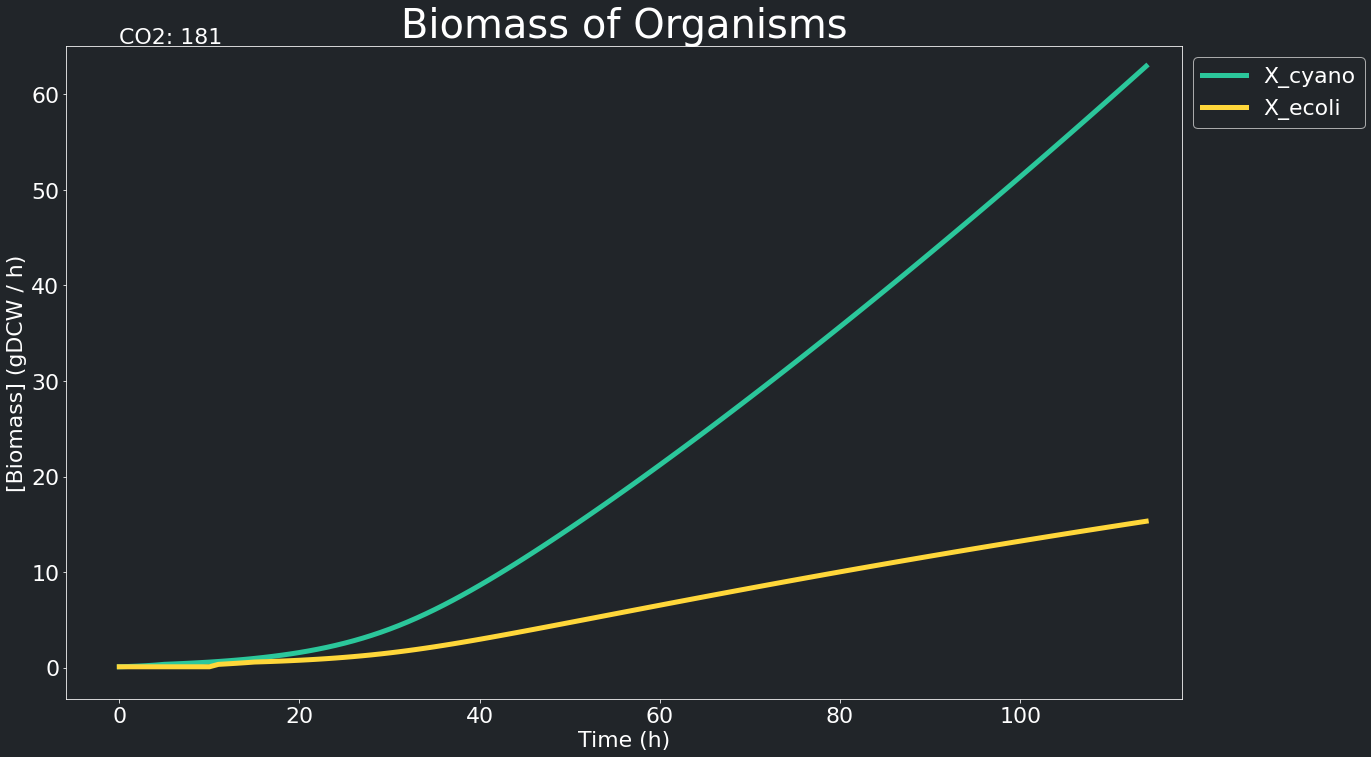

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


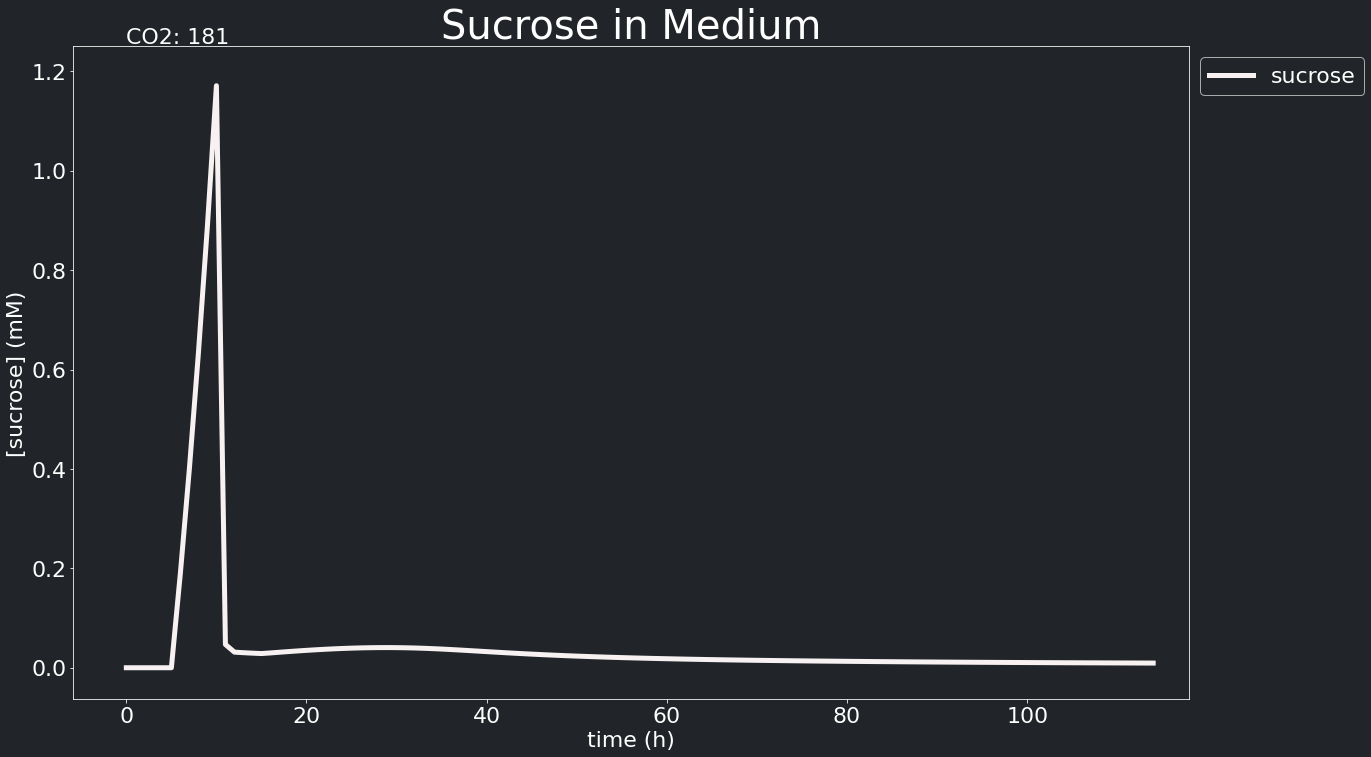

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


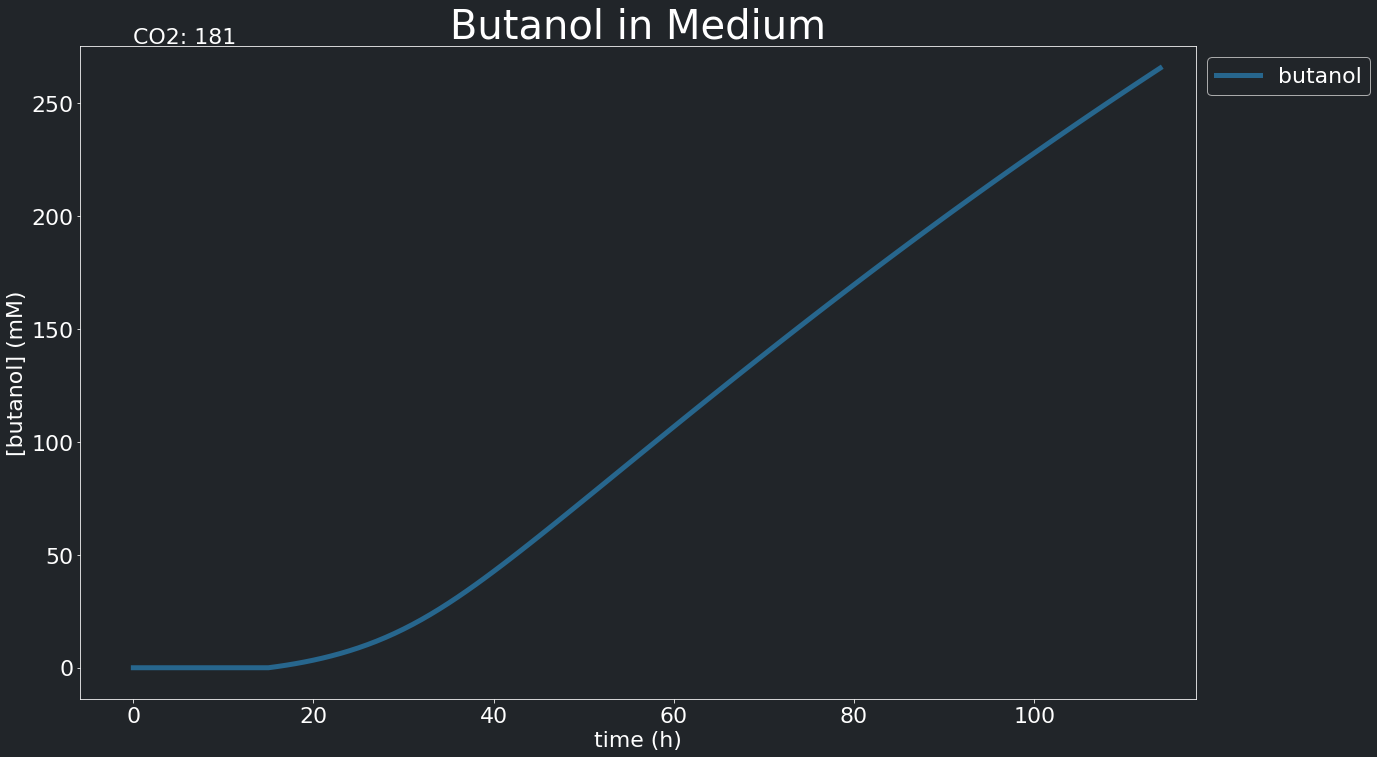

181 [1.80753475e+02 1.24339504e-01 6.29406418e+01 9.37881584e-03
 1.53266434e+01 2.65436914e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


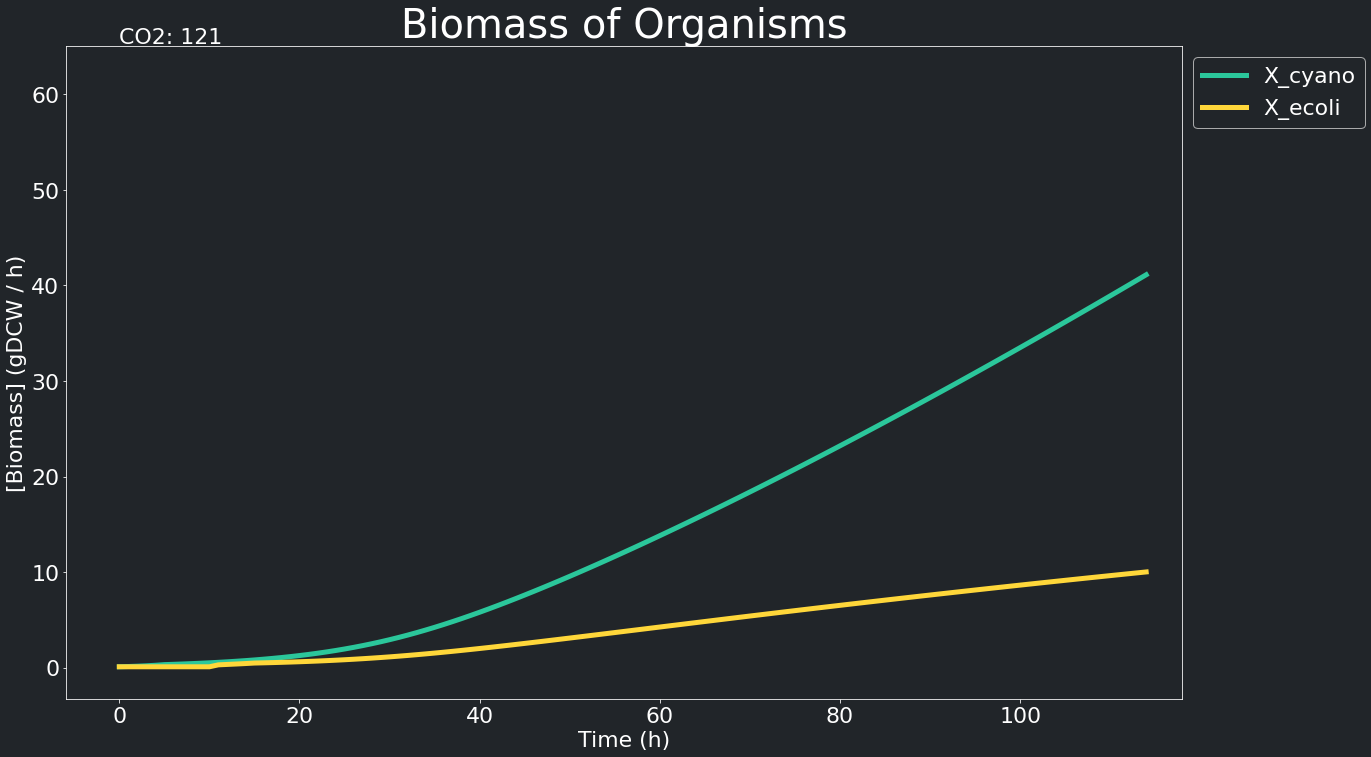

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


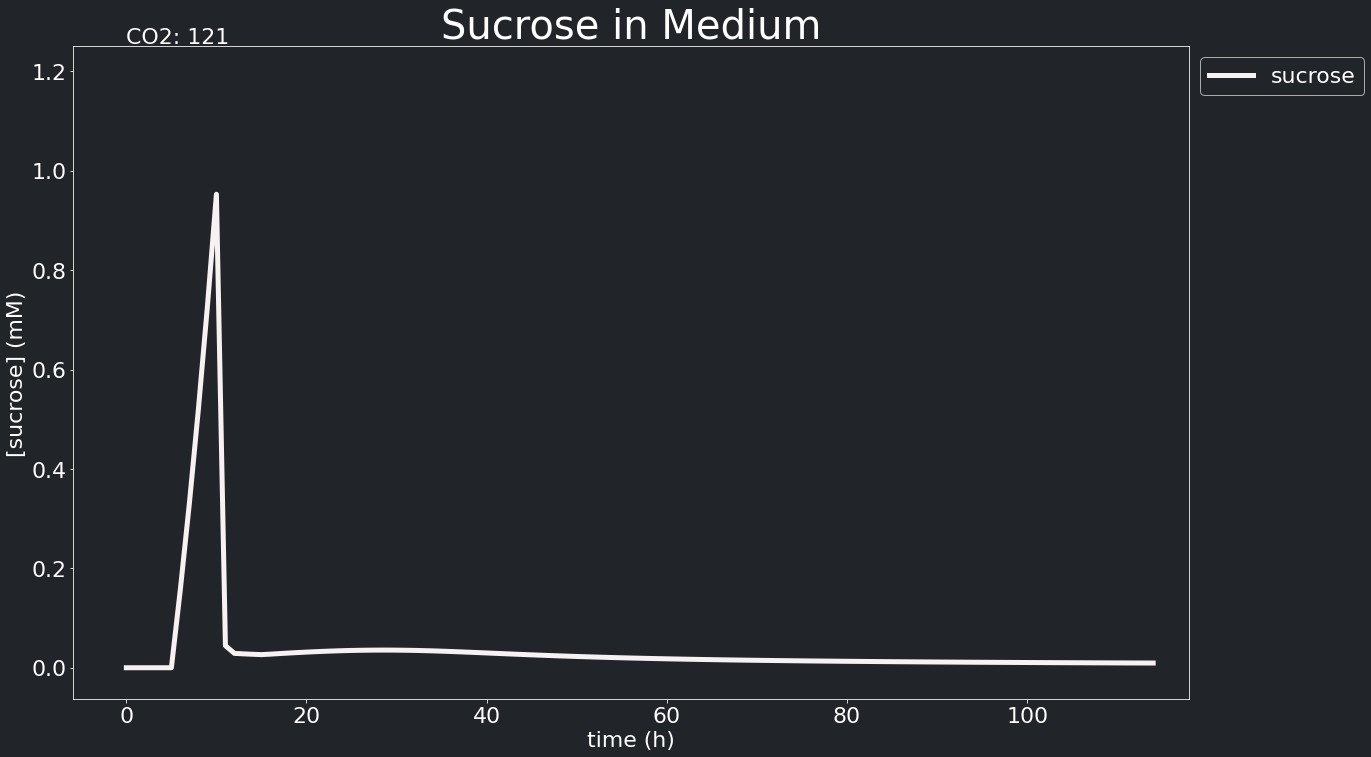

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


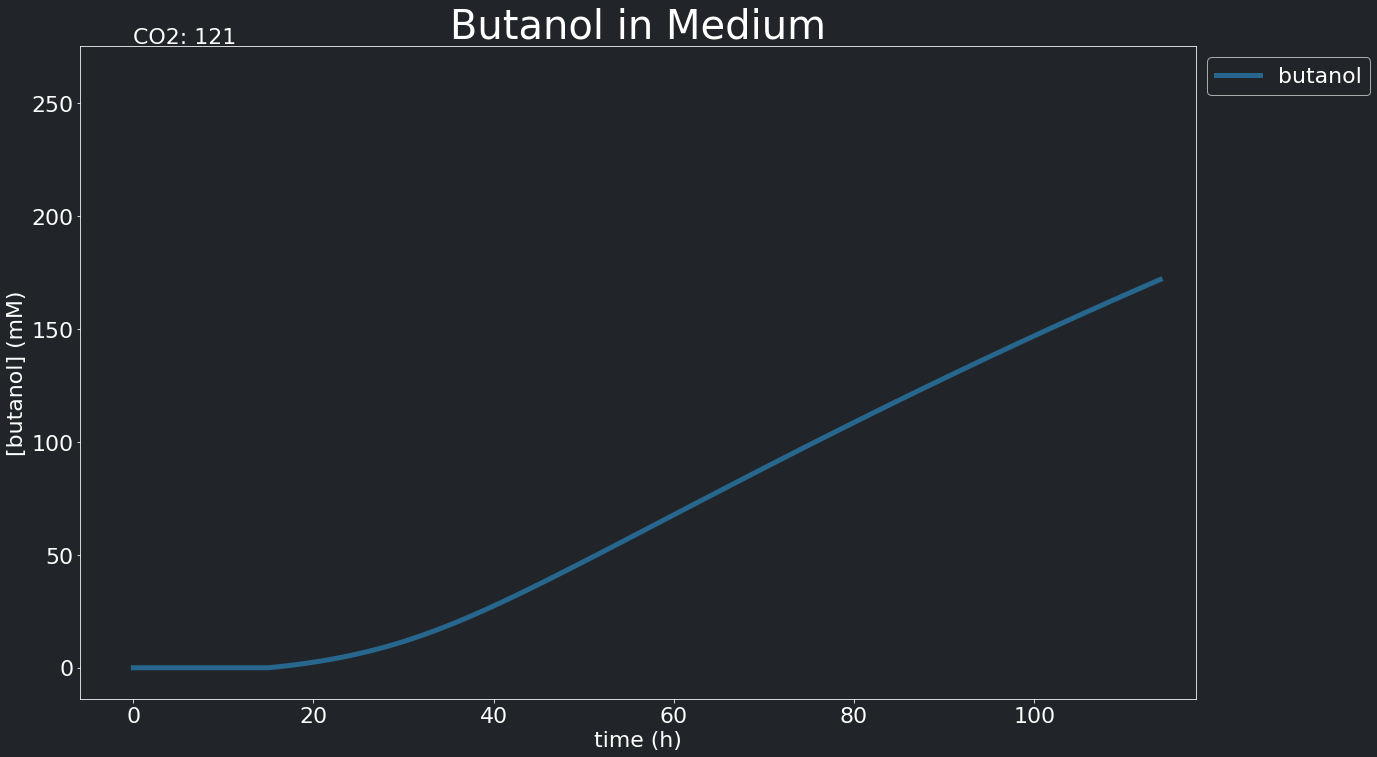

121 [1.20837268e+02 1.25459976e-01 4.11146819e+01 9.44482470e-03
 1.00225891e+01 1.71837086e+02]


<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


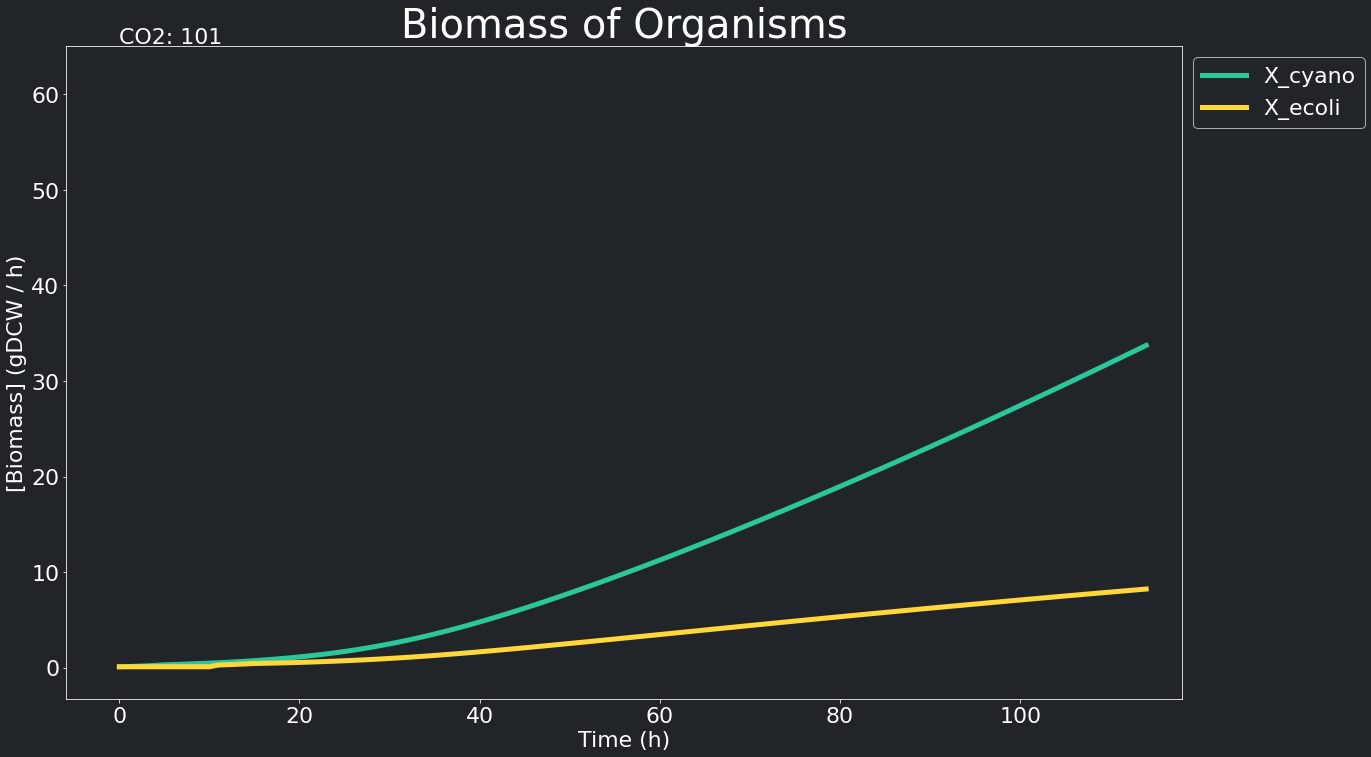

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


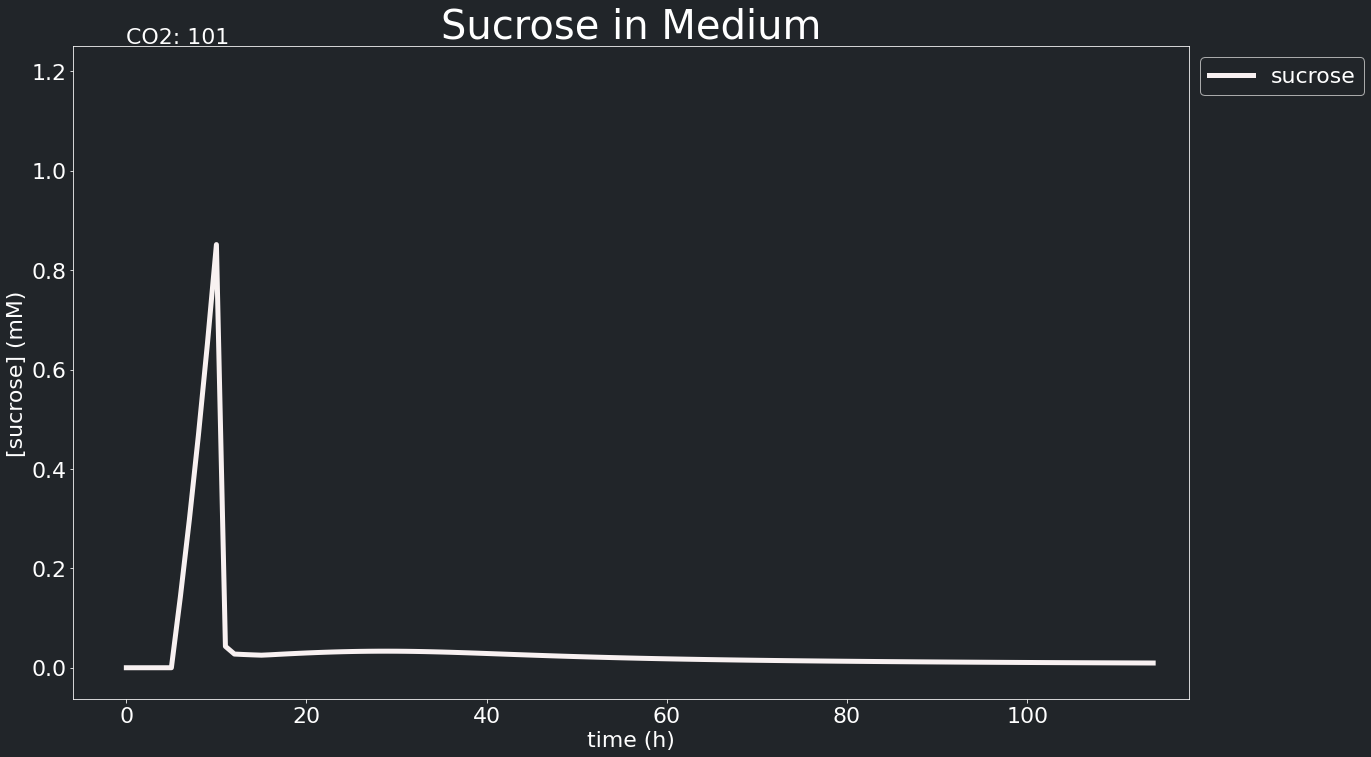

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


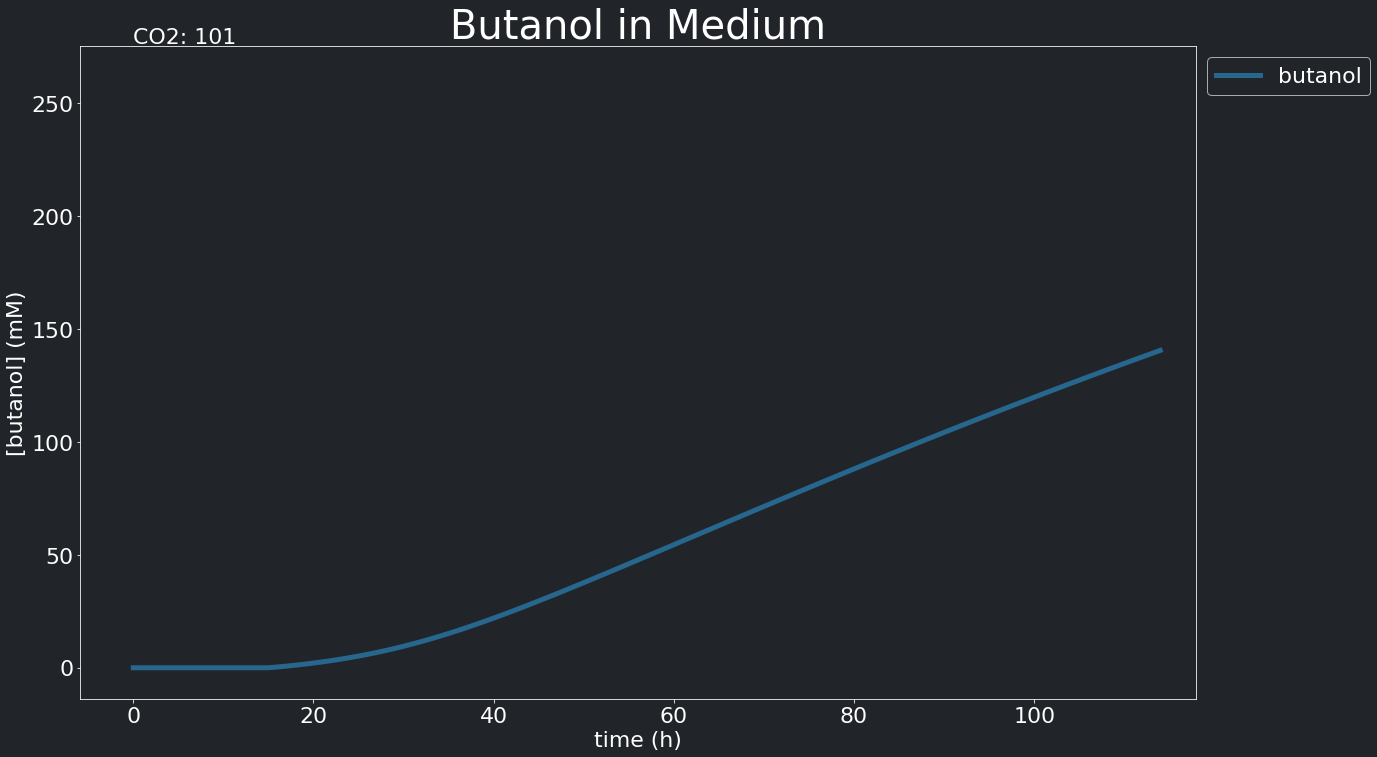

101 [1.00865233e+02 1.26505917e-01 3.37279076e+01 9.50159182e-03
 8.23408627e+00 1.40458249e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


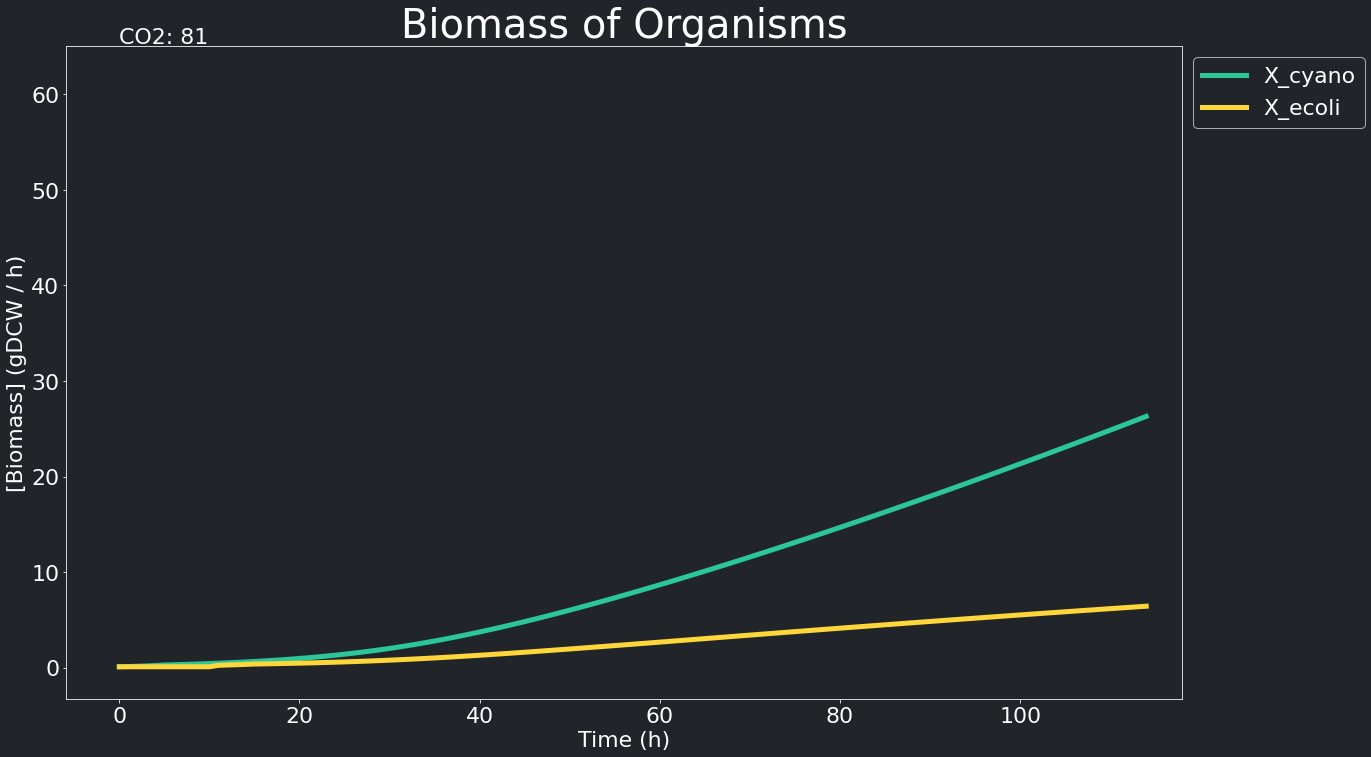

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


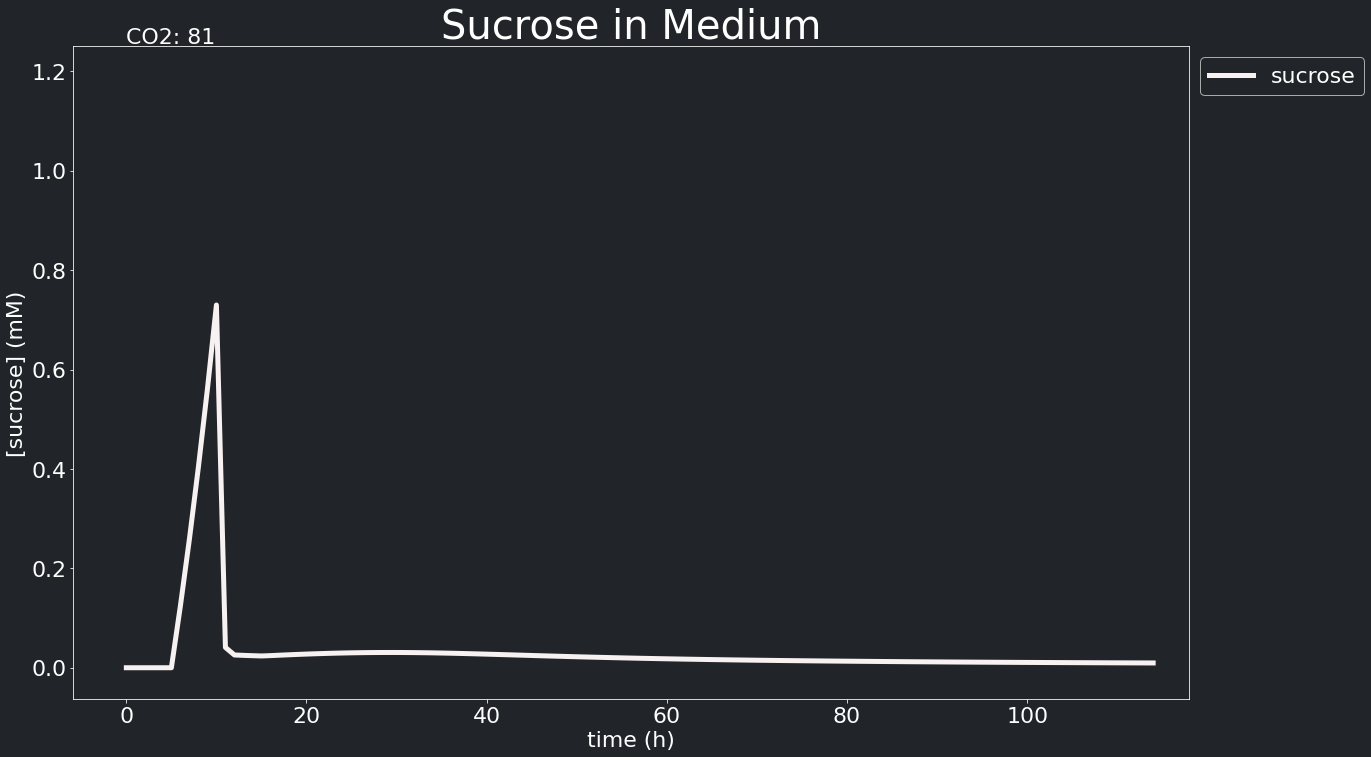

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


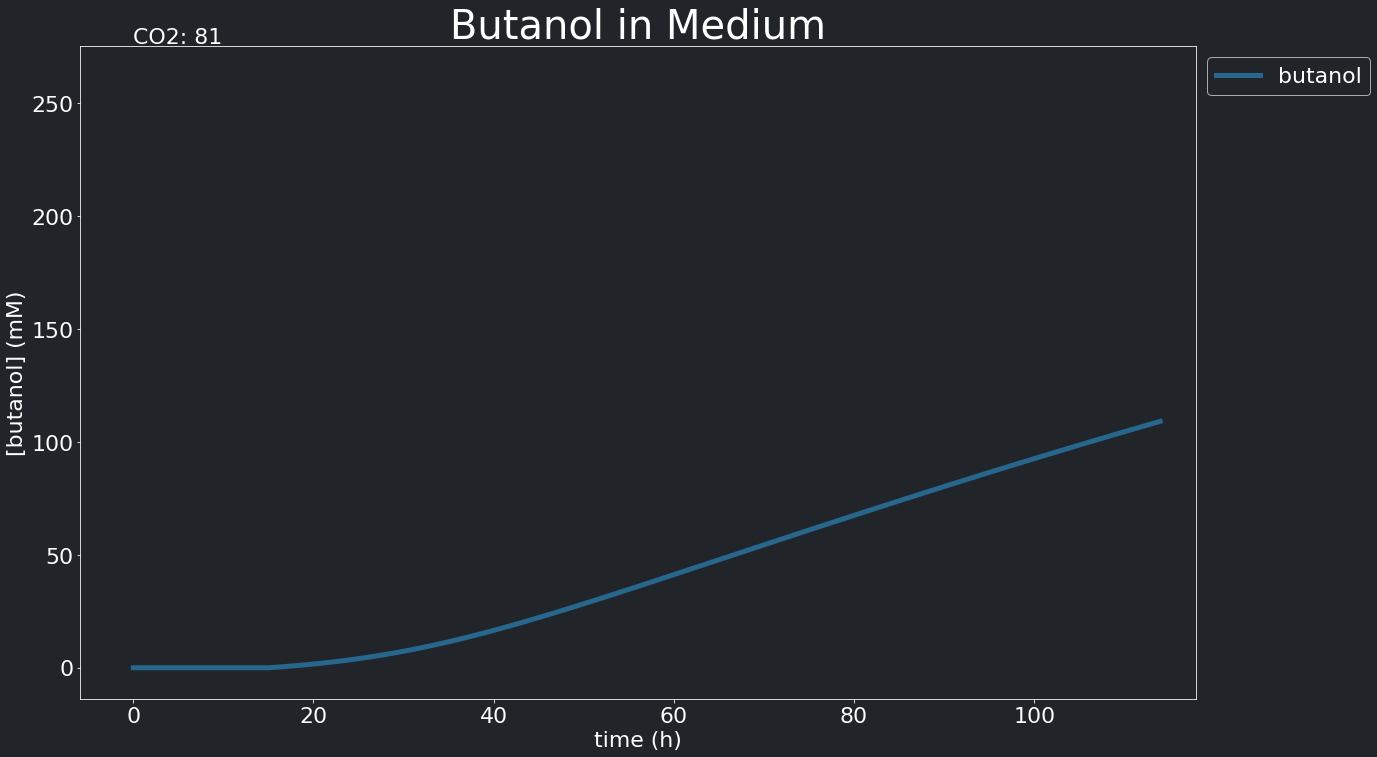

81 [8.08932335e+01 1.28301785e-01 2.62957099e+01 9.59763436e-03
 6.43642124e+00 1.09063946e+02]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


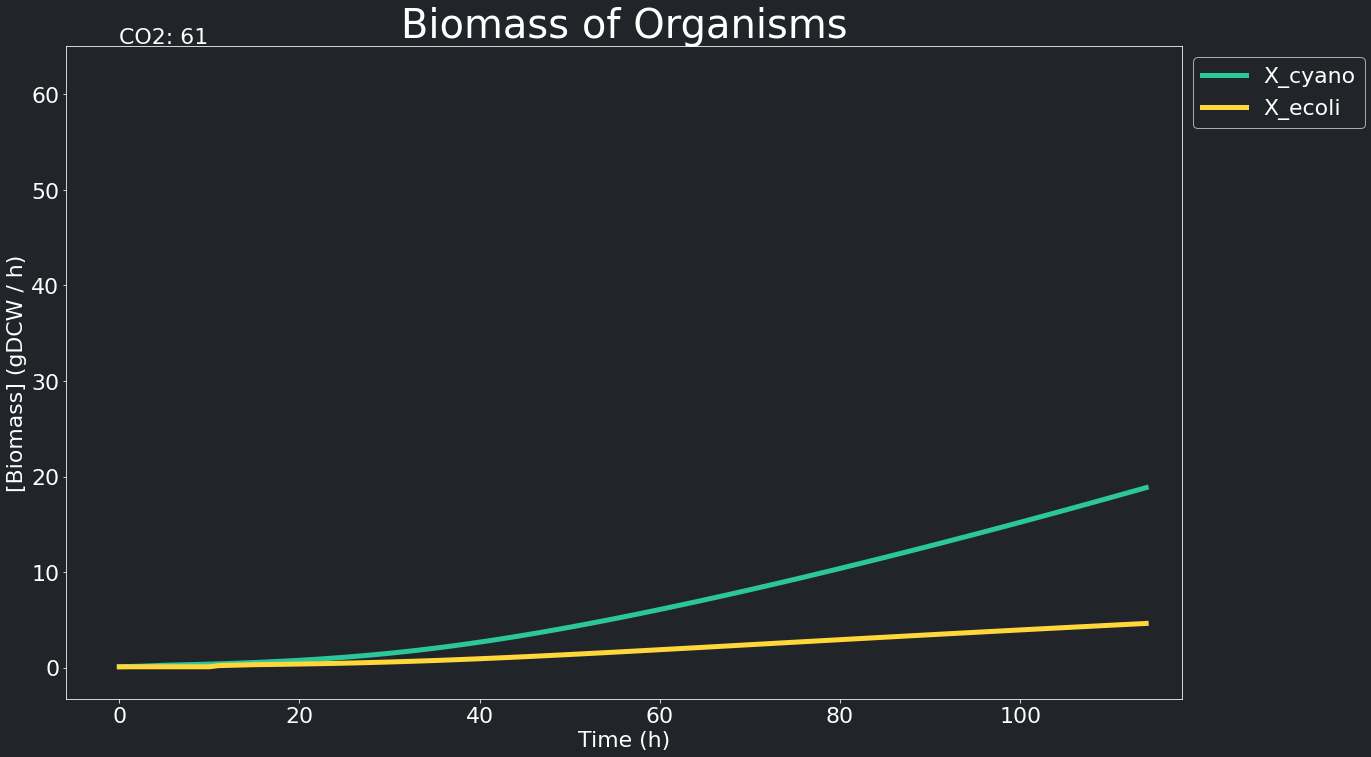

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


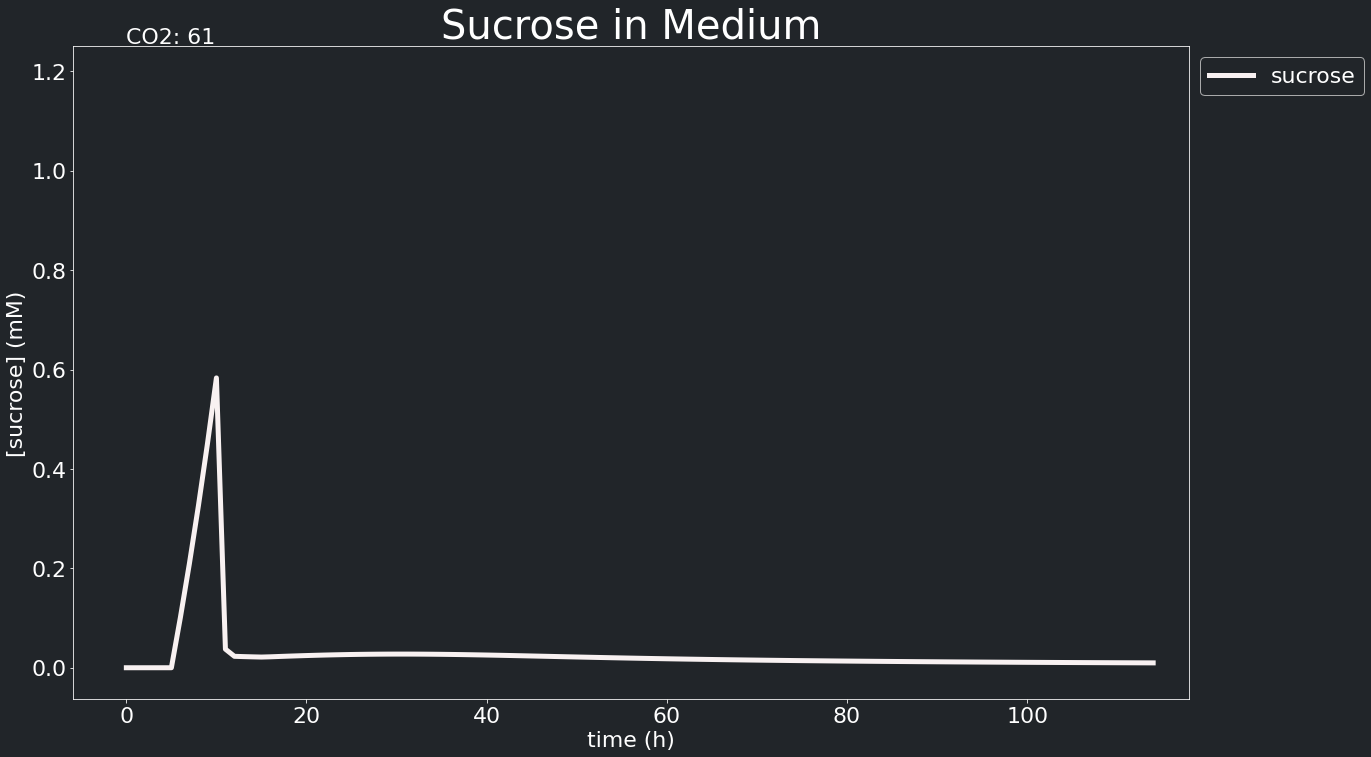

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


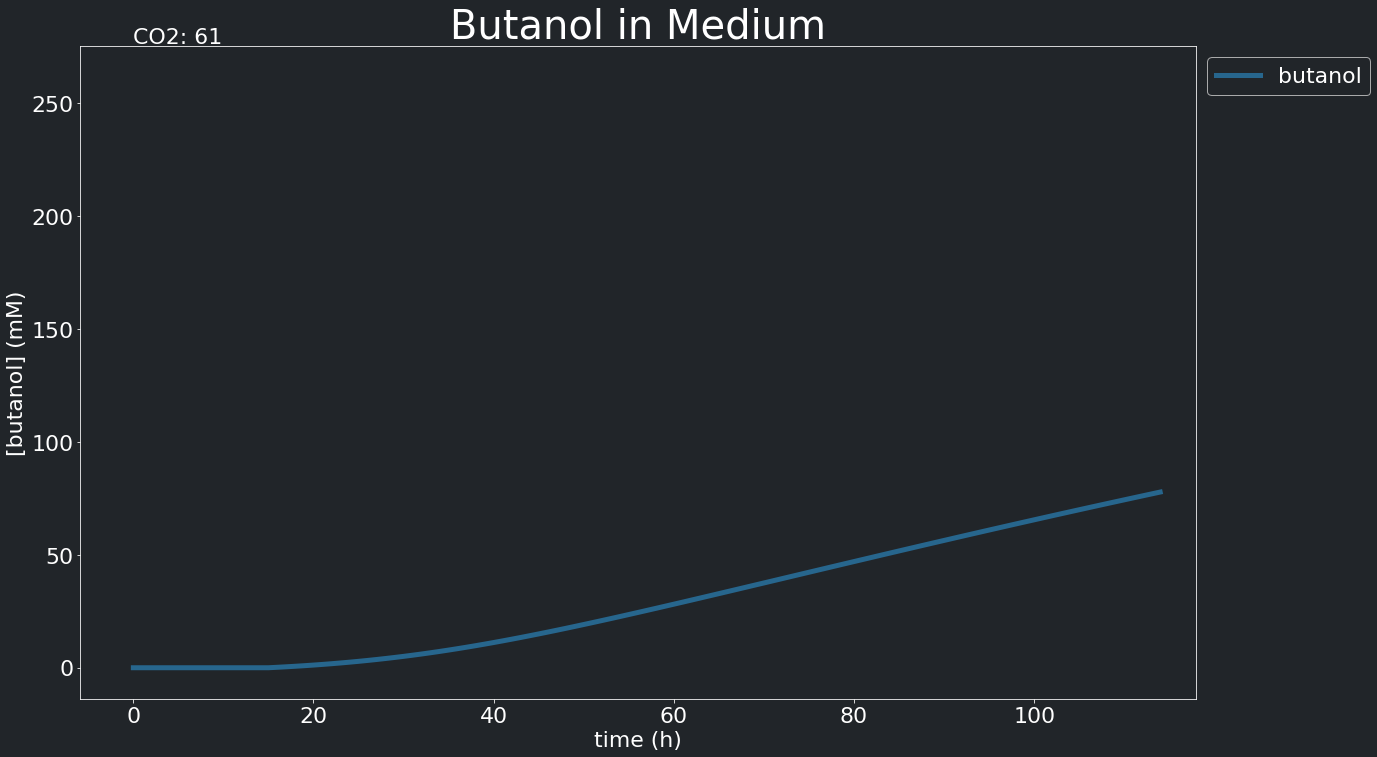

61 [6.09213041e+01 1.31522153e-01 1.88471034e+01 9.76879488e-03
 4.63429976e+00 7.77620258e+01]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


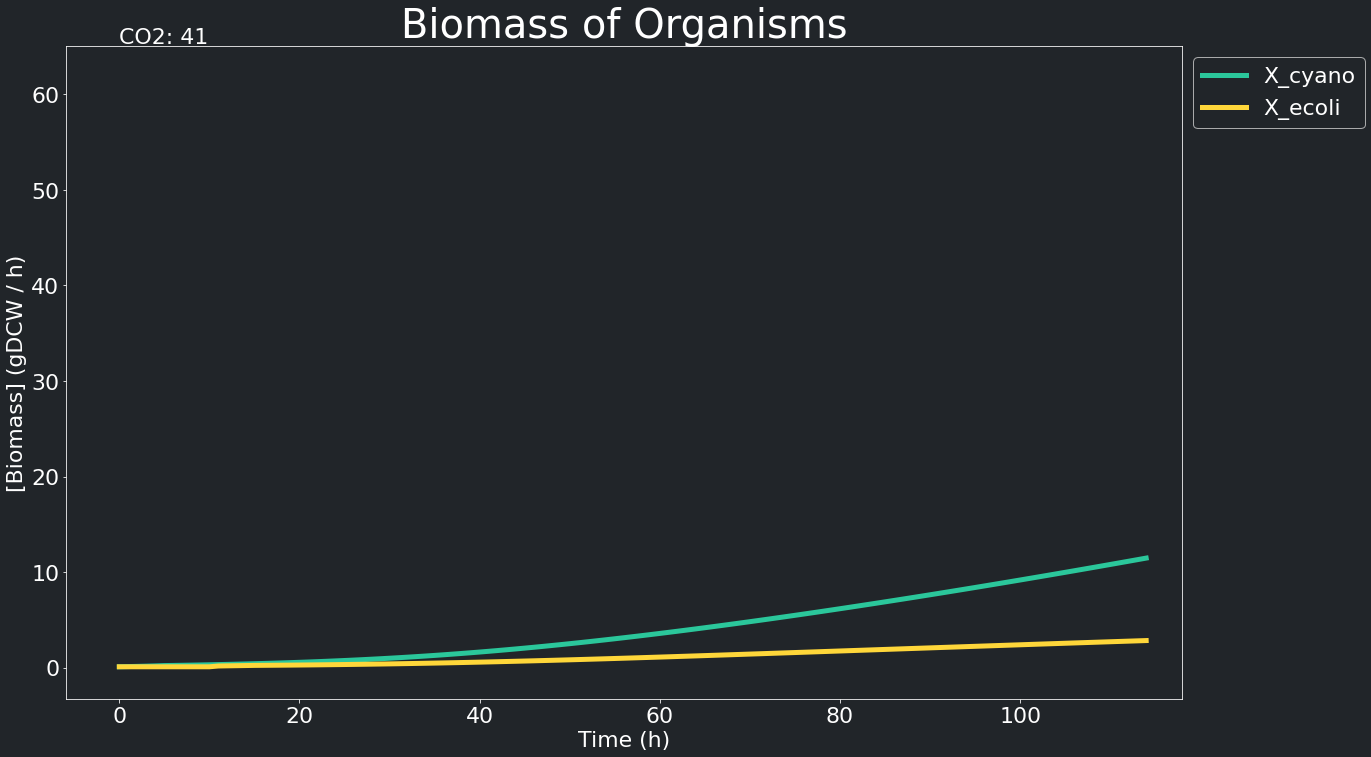

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


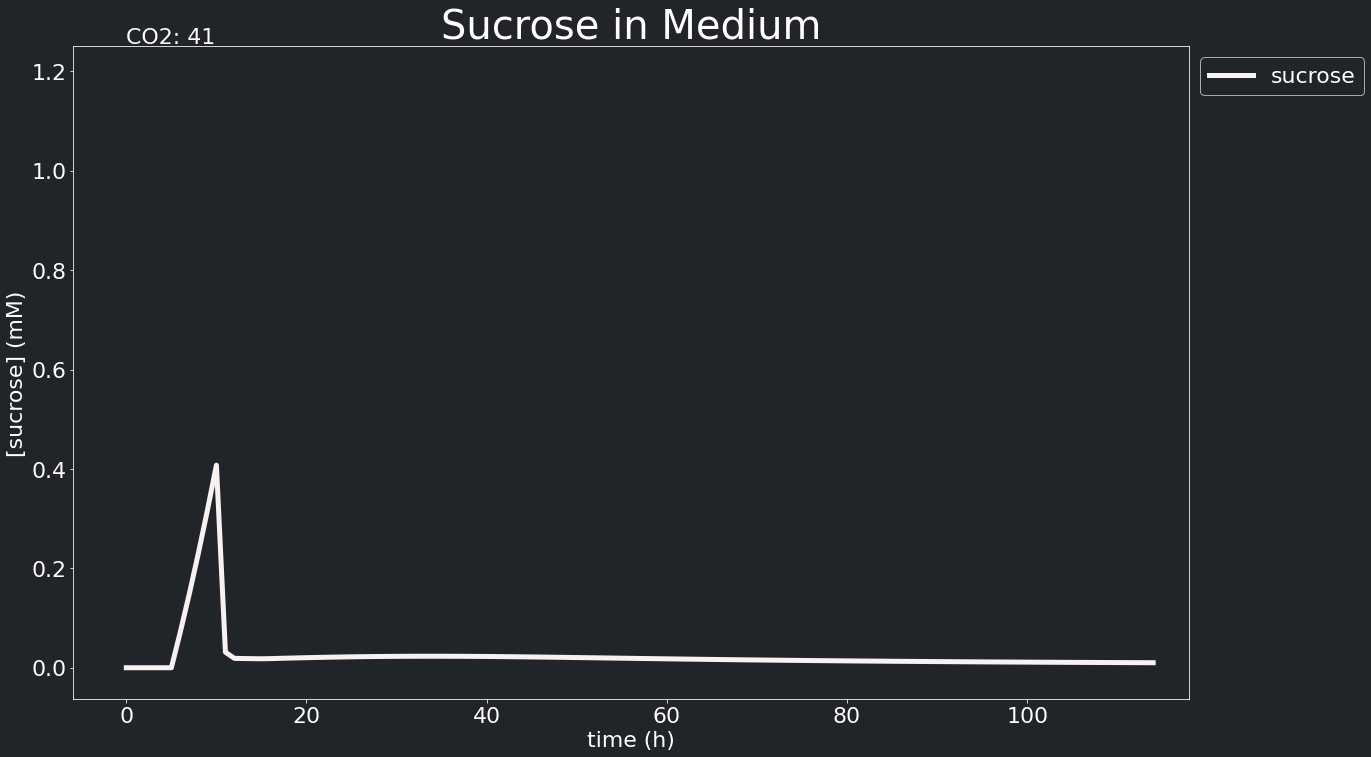

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


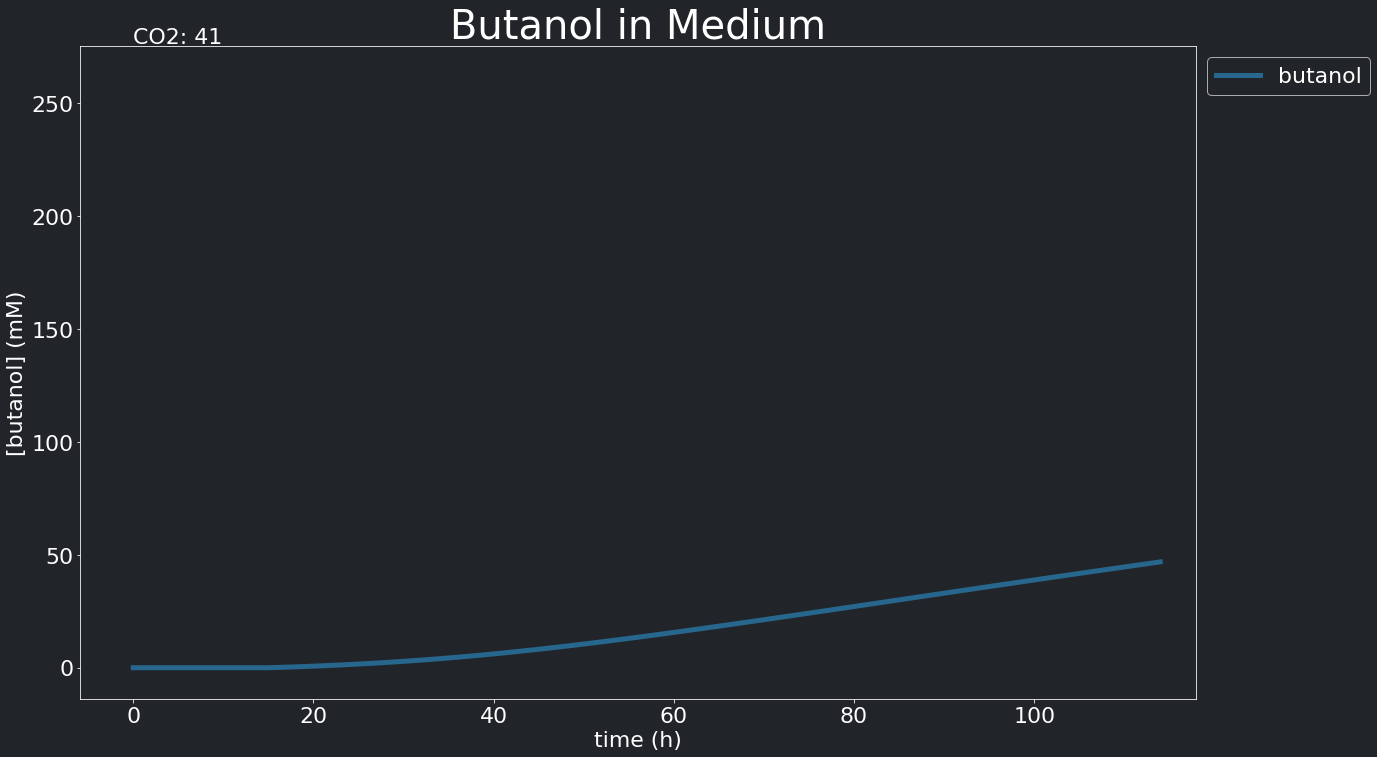

41 [4.09495256e+01 1.37825840e-01 1.14709821e+01 1.01040887e-02
 2.84351883e+00 4.68433329e+01]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


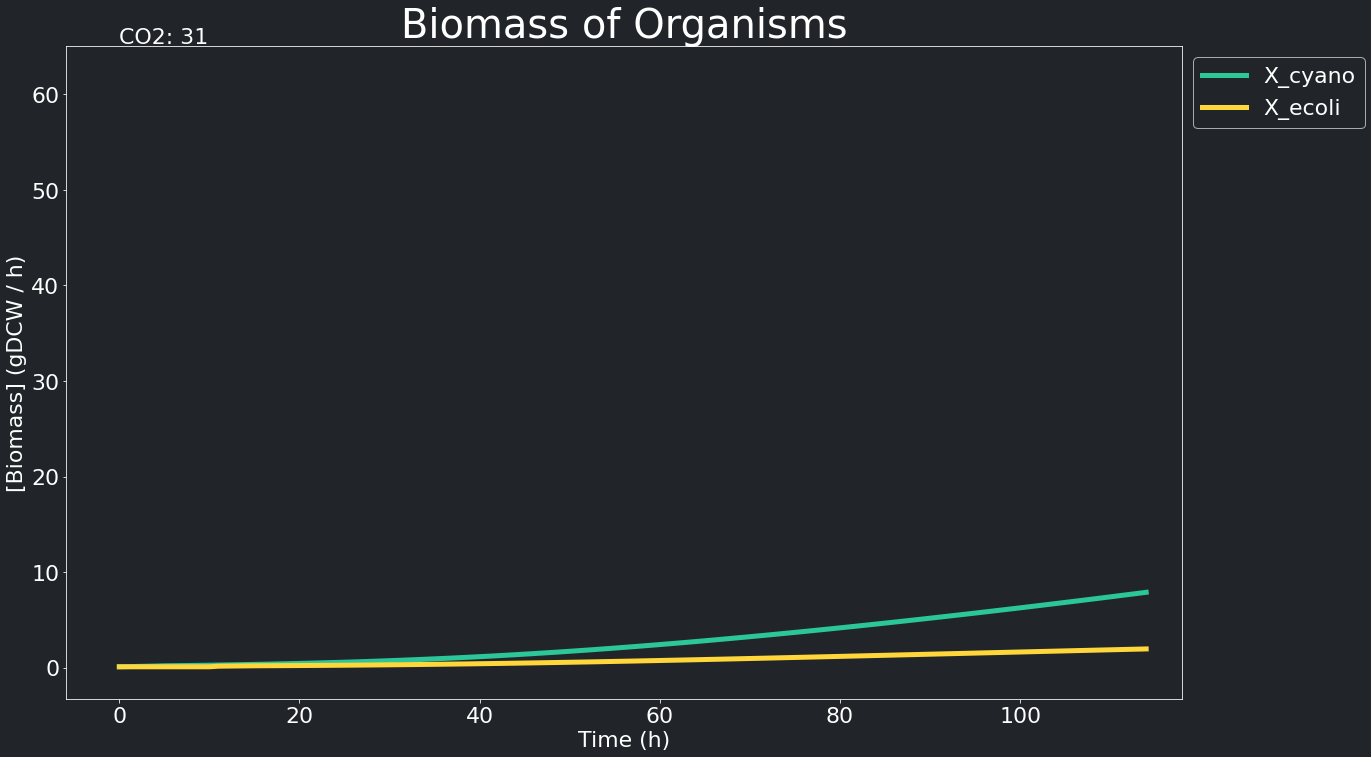

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


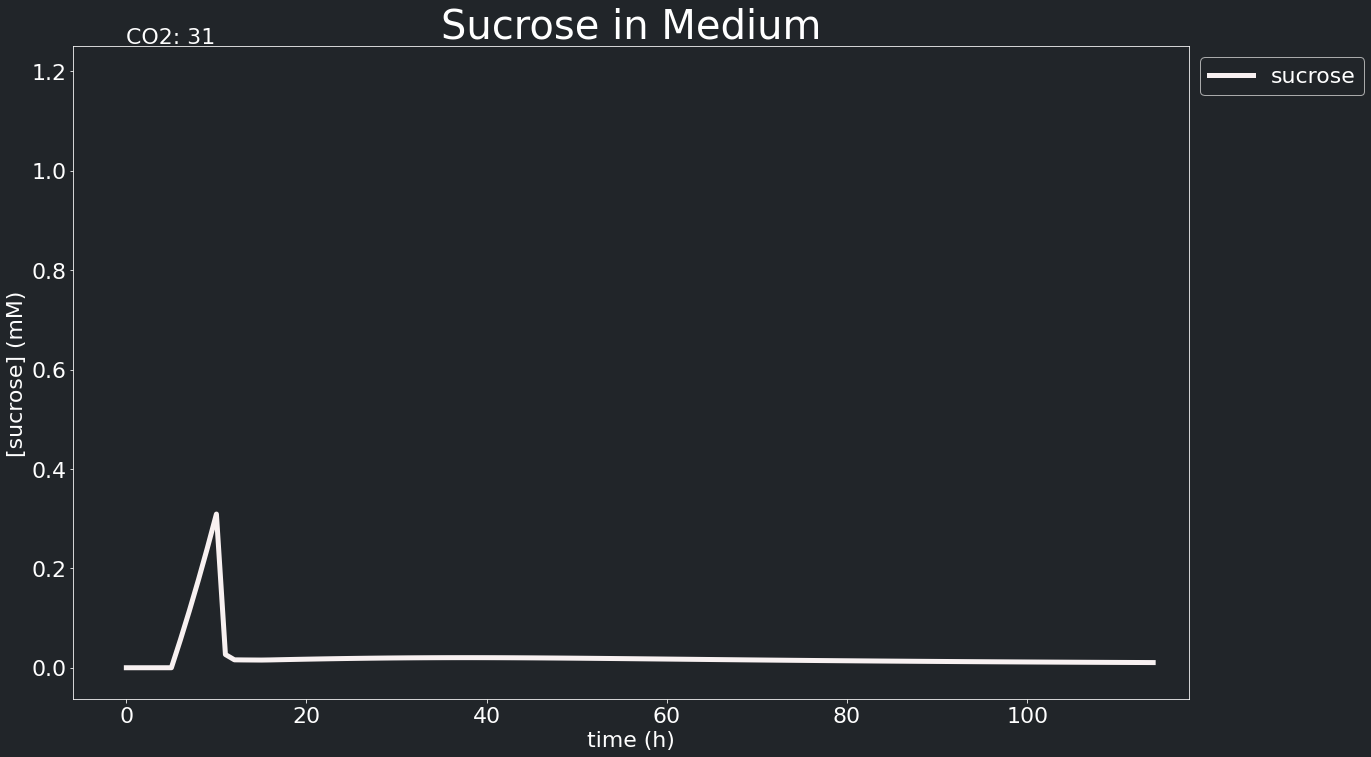

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


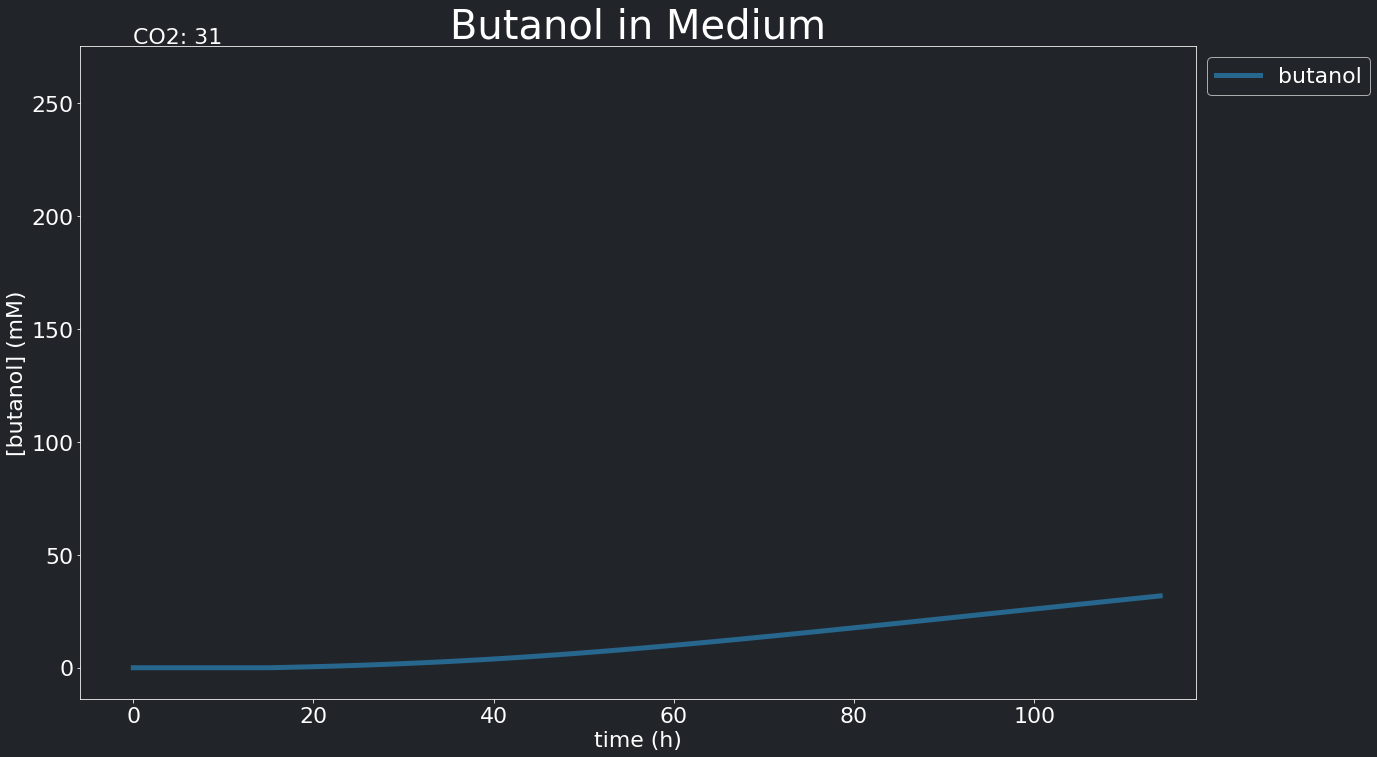

31 [3.09637493e+01 1.43285599e-01 7.89101187e+00 1.03967236e-02
 1.96791177e+00 3.17946211e+01]


<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


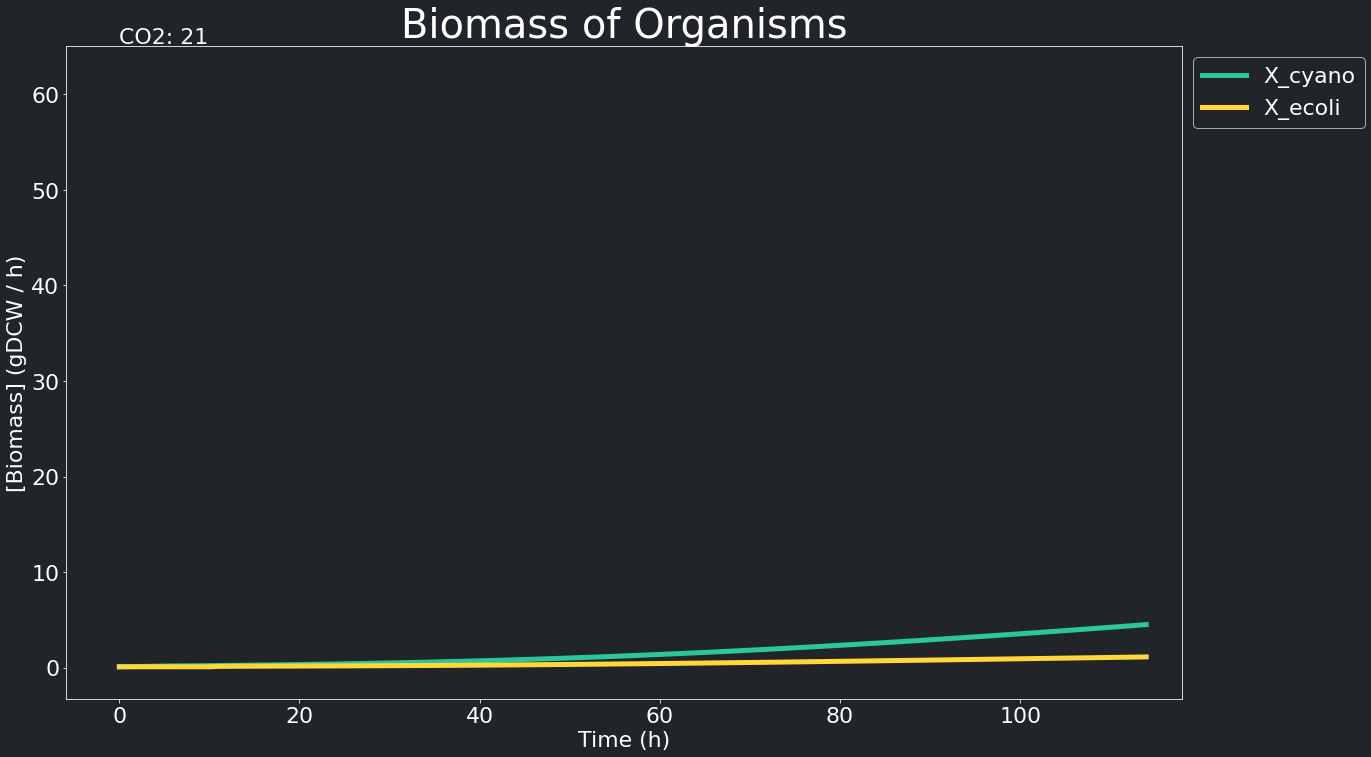

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


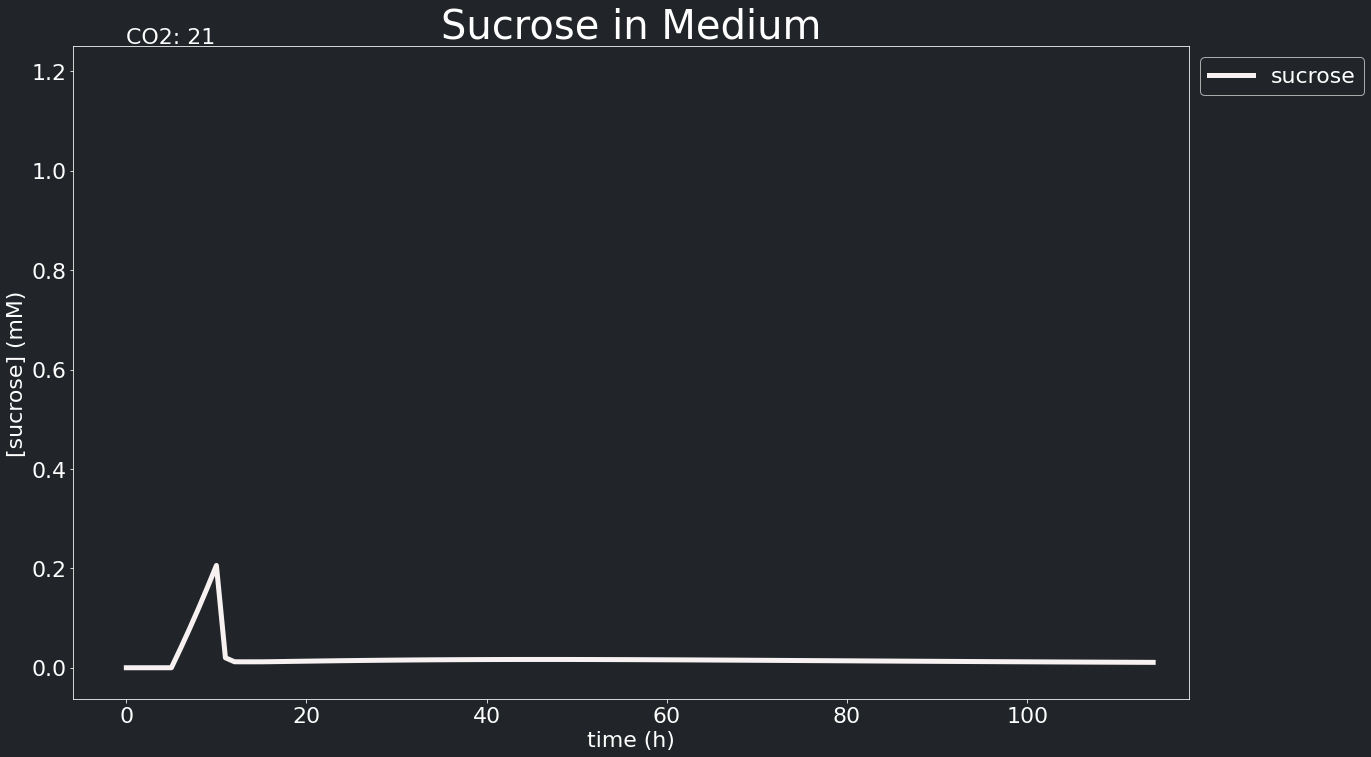

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


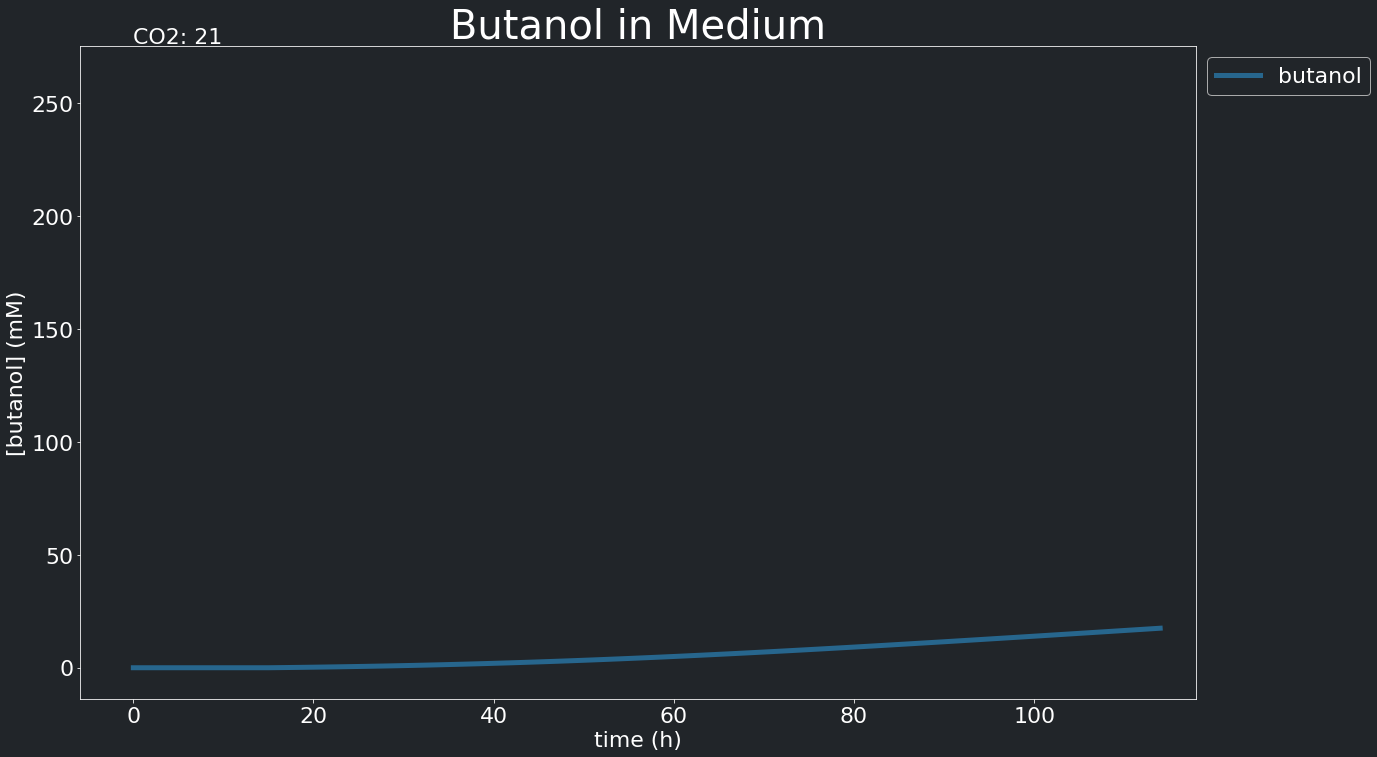

21 [2.09780721e+01 1.50767547e-01 4.51322206e+00 1.08072467e-02
 1.13276436e+00 1.74938556e+01]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


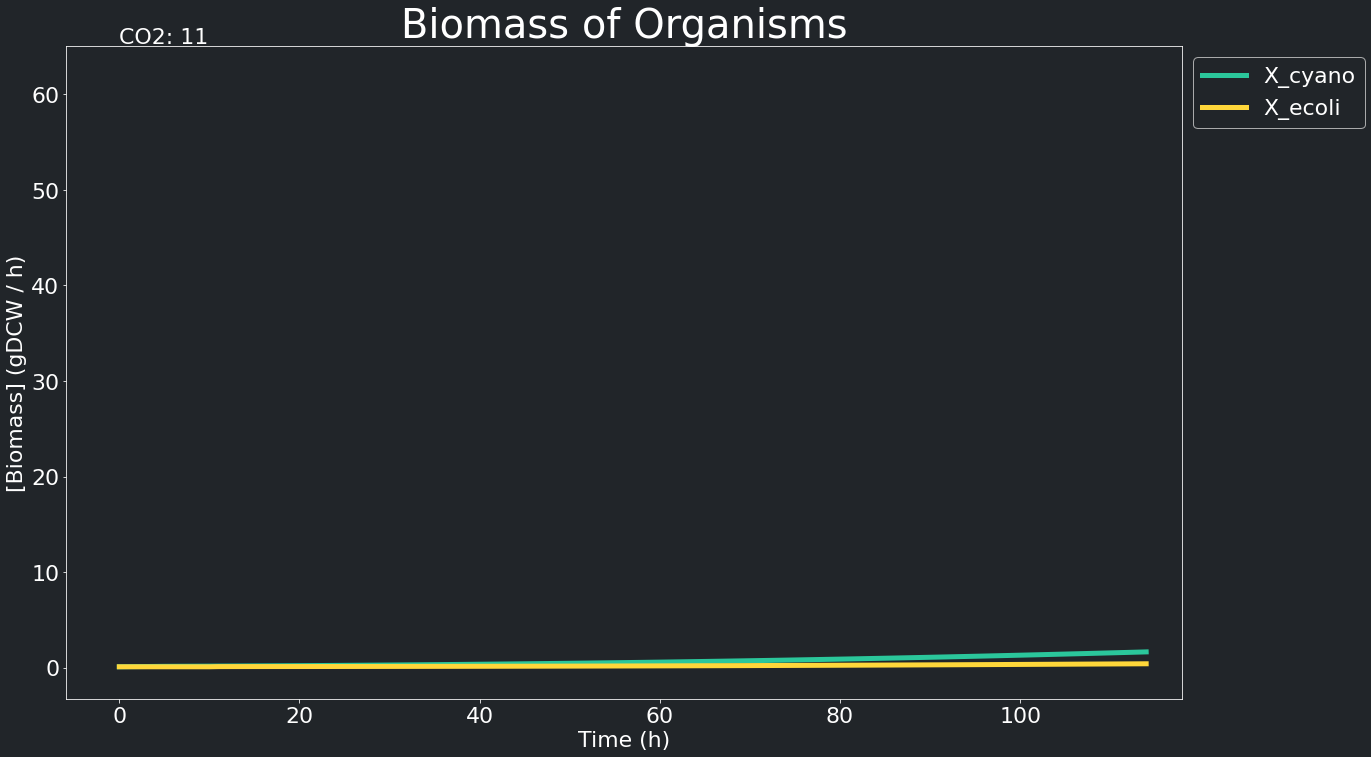

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


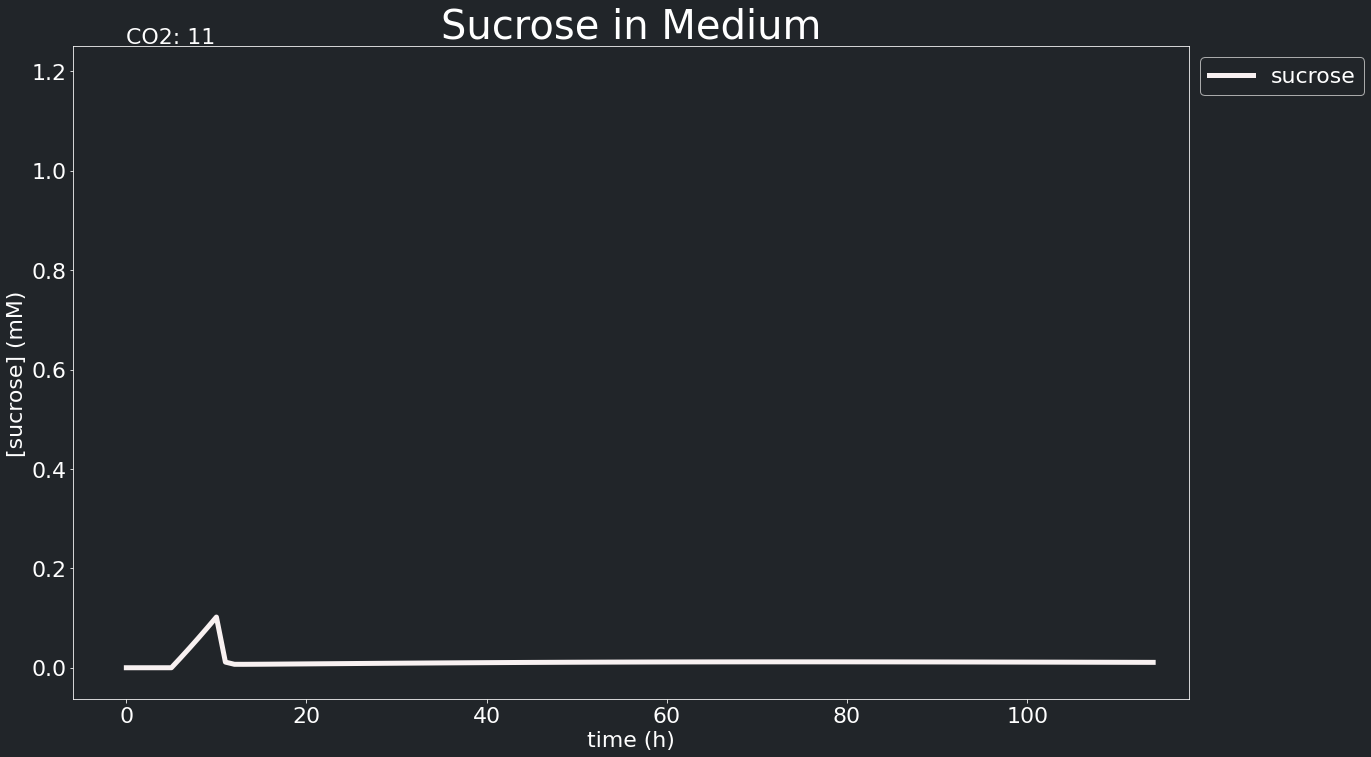

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


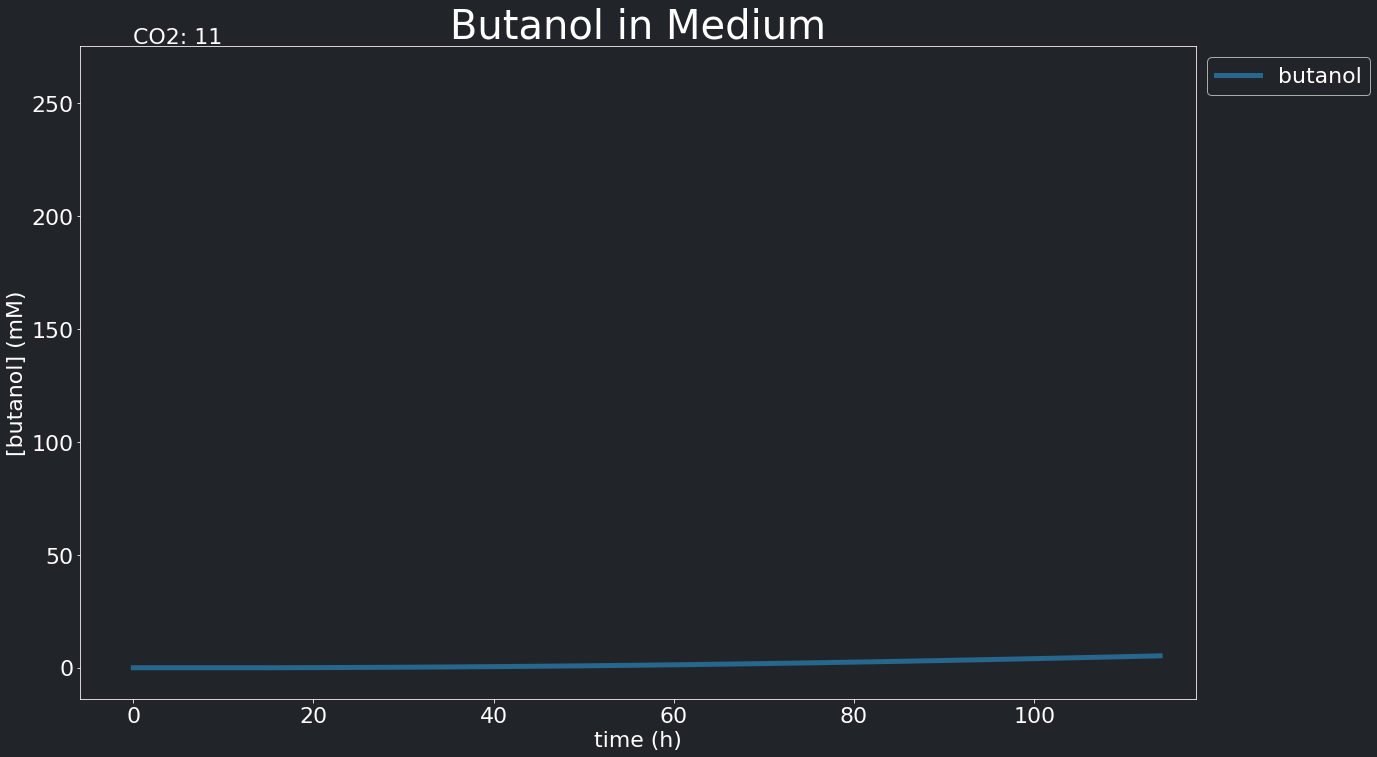

11 [1.09919903e+01 1.49987748e-01 1.65725503e+00 1.07963174e-02
 4.14537730e-01 5.26747623e+00]


C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\Namasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-18-12f9f1754e0a>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


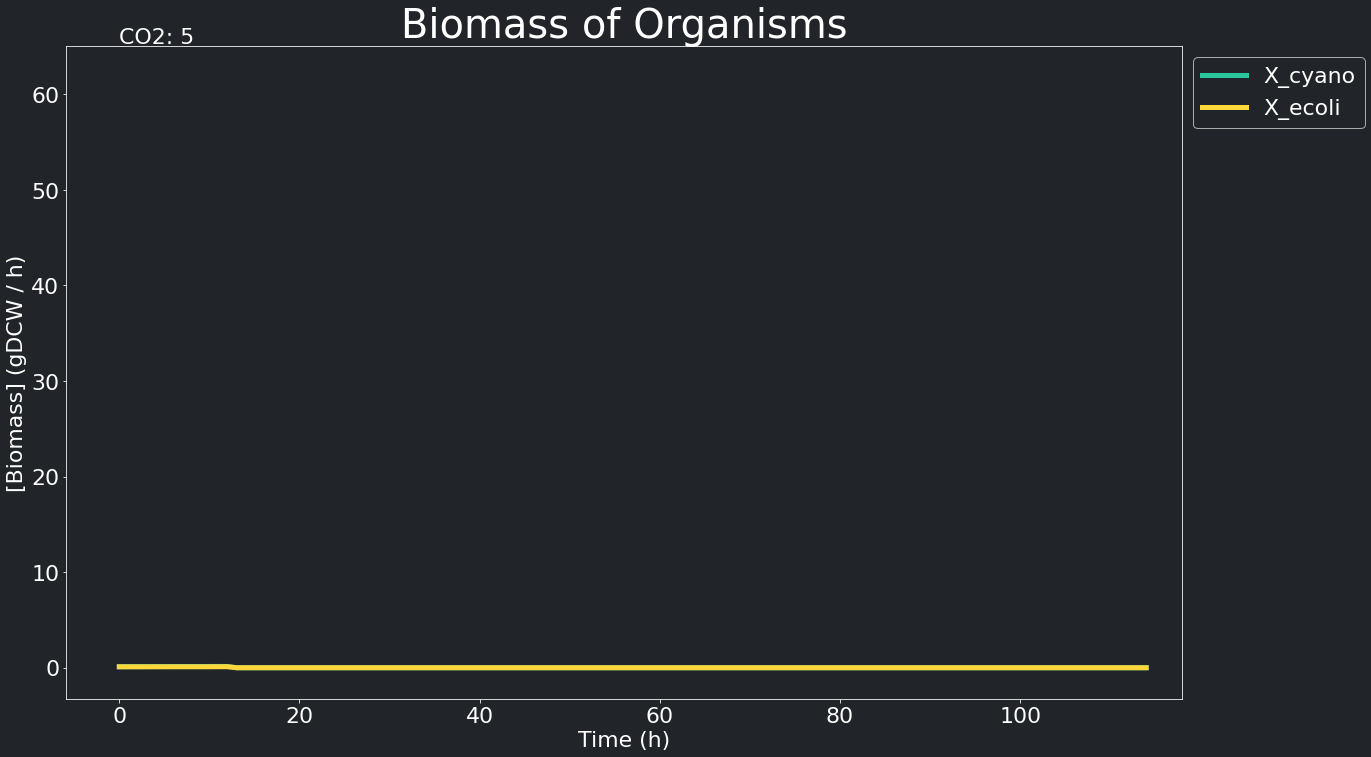

<ipython-input-18-12f9f1754e0a>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


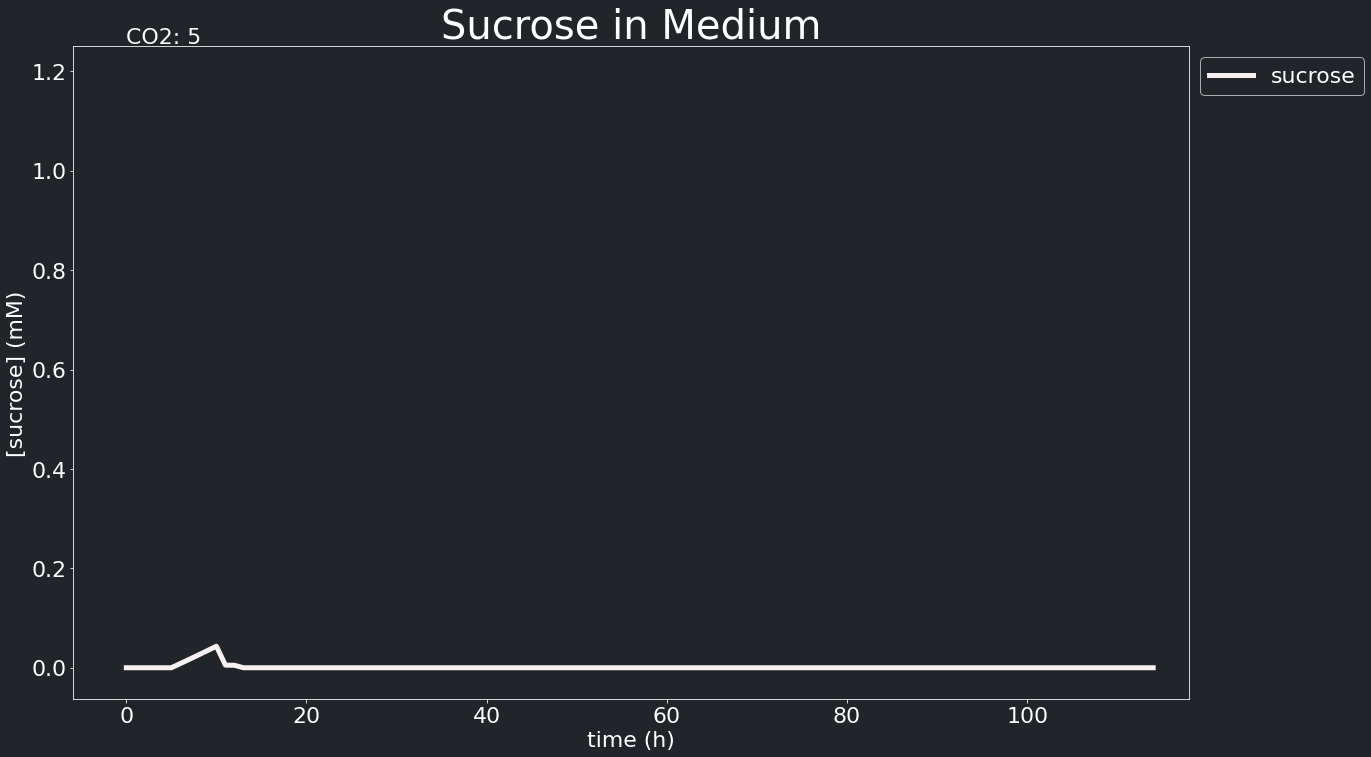

<ipython-input-18-12f9f1754e0a>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


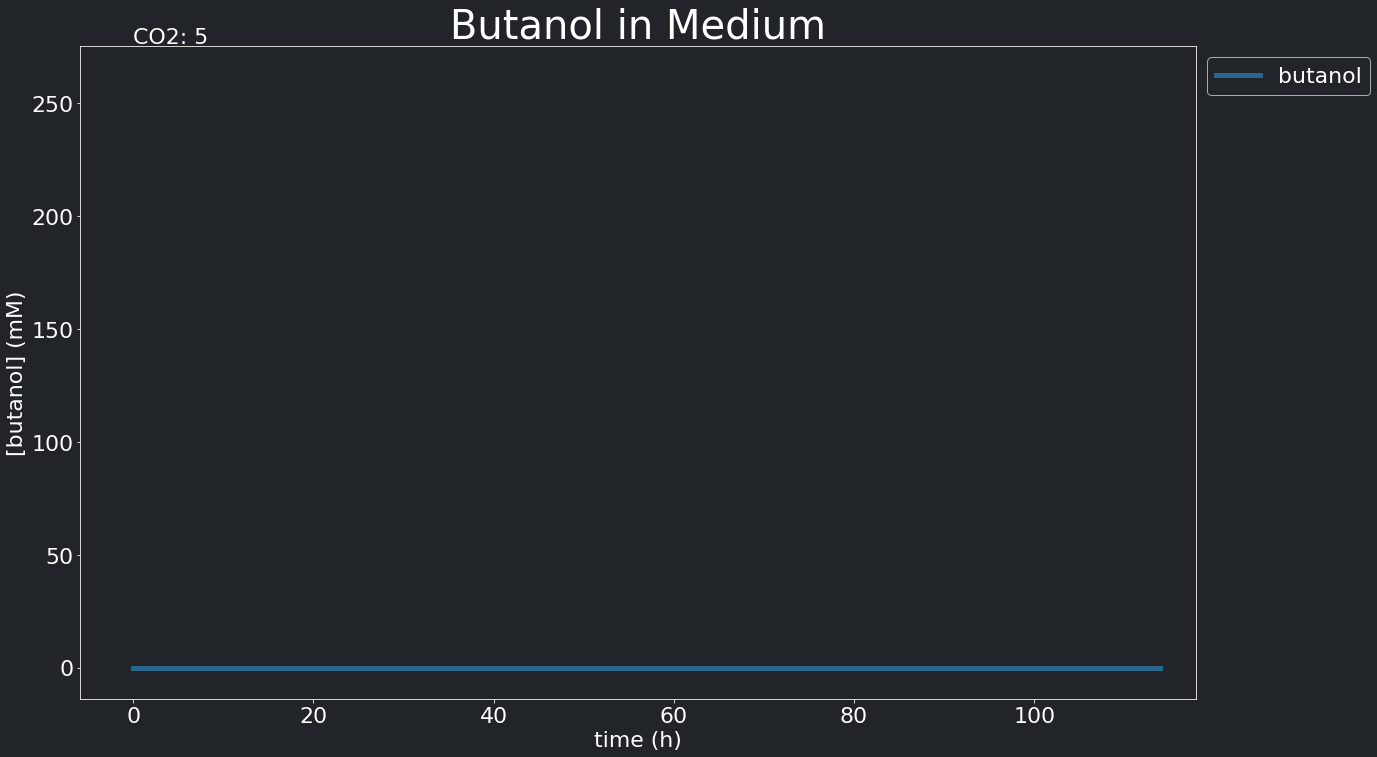

5 [1.7574729e-110 1.7574729e-110 1.7574729e-110 1.7574729e-110
 5.4144998e-312 0.0000000e+000]


In [18]:
sim_times = np.linspace(0, 114, 115)
#print(sim_times)
model_ecoli.reactions.get_by_id('EX_o2_e').lower_bound = -100
# solve ODEs
from scipy.integrate import odeint
for i in [181, 121, 101, 81, 61, 41, 31, 21, 11, 5]:
    pars['co2g_input'] = i
    initial_values[0] = 0.8*i
    initial_values[1] = 0.8*i
    extra_params = (model_ecoli, model_cyano, pars)
    sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
    plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
    plt.xlabel("Time (h)")
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel("[Biomass] (gDCW / h)")
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*65, 'CO2: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*65,65)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[sucrose] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*1.25, 'CO2: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*1.25,1.25)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[butanol] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Butanol in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*275, 'CO2: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*275,275)
    plt.show()
    print(i, sim_results[-1])

last one crashes after 12 hours

In [ ]:
model_ecoli.reactions.get_by_id('EX_o2_e').lower_bound = -100  
sim_times = np.linspace(0, 30, 31)
pars['co2g_input'] = 5
initial_values[0] = 0.8*5
initial_values[1] = 0.8*5
extra_params = (model_ecoli, model_cyano, pars)
sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)

<ipython-input-30-854e8462acd5>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


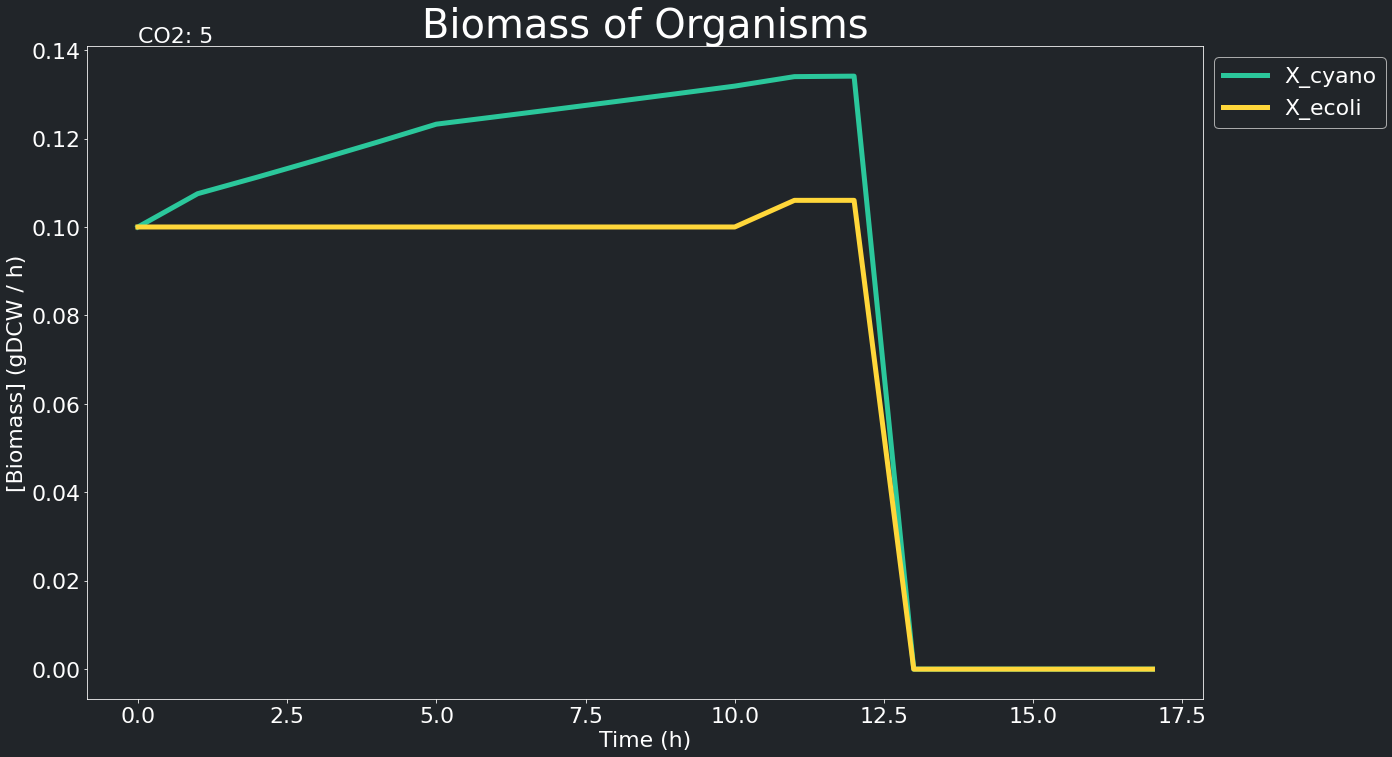

<ipython-input-30-854e8462acd5>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


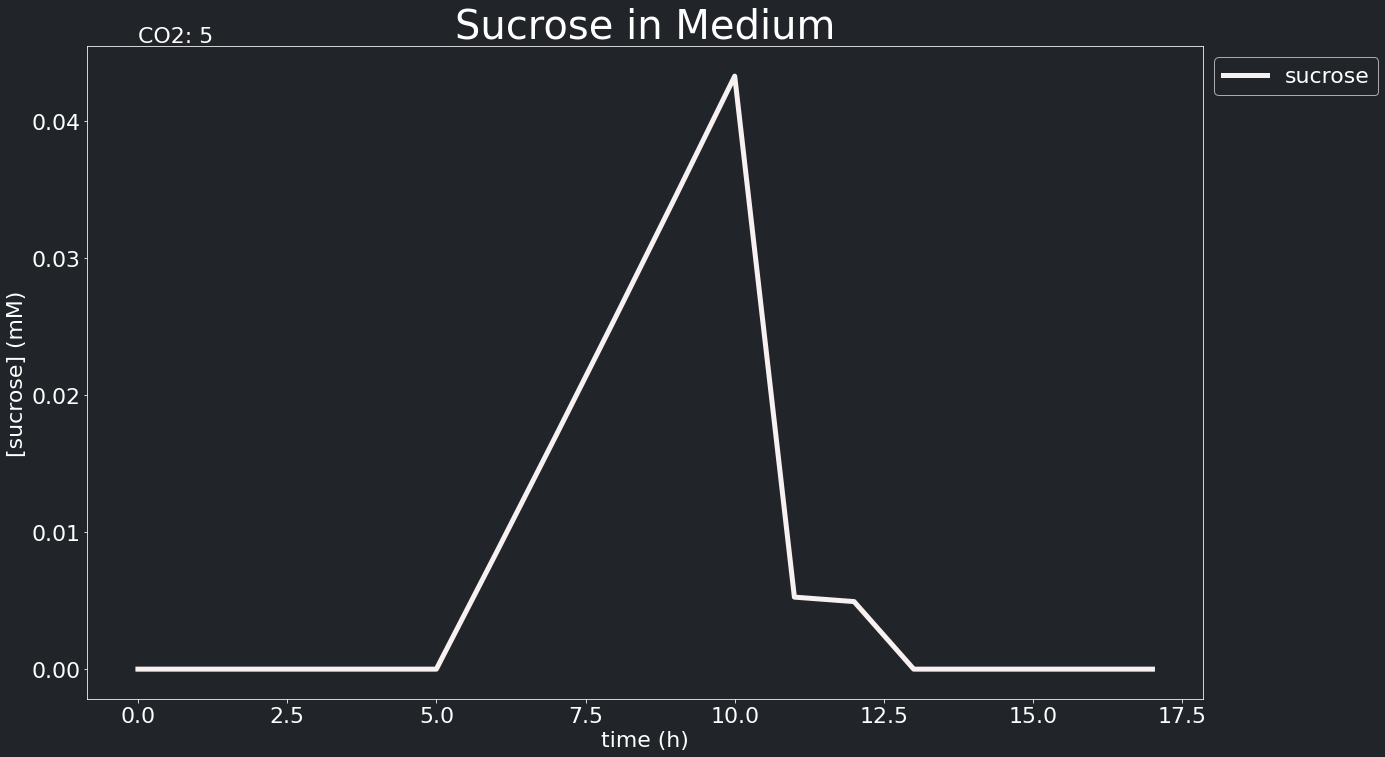

<ipython-input-30-854e8462acd5>:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


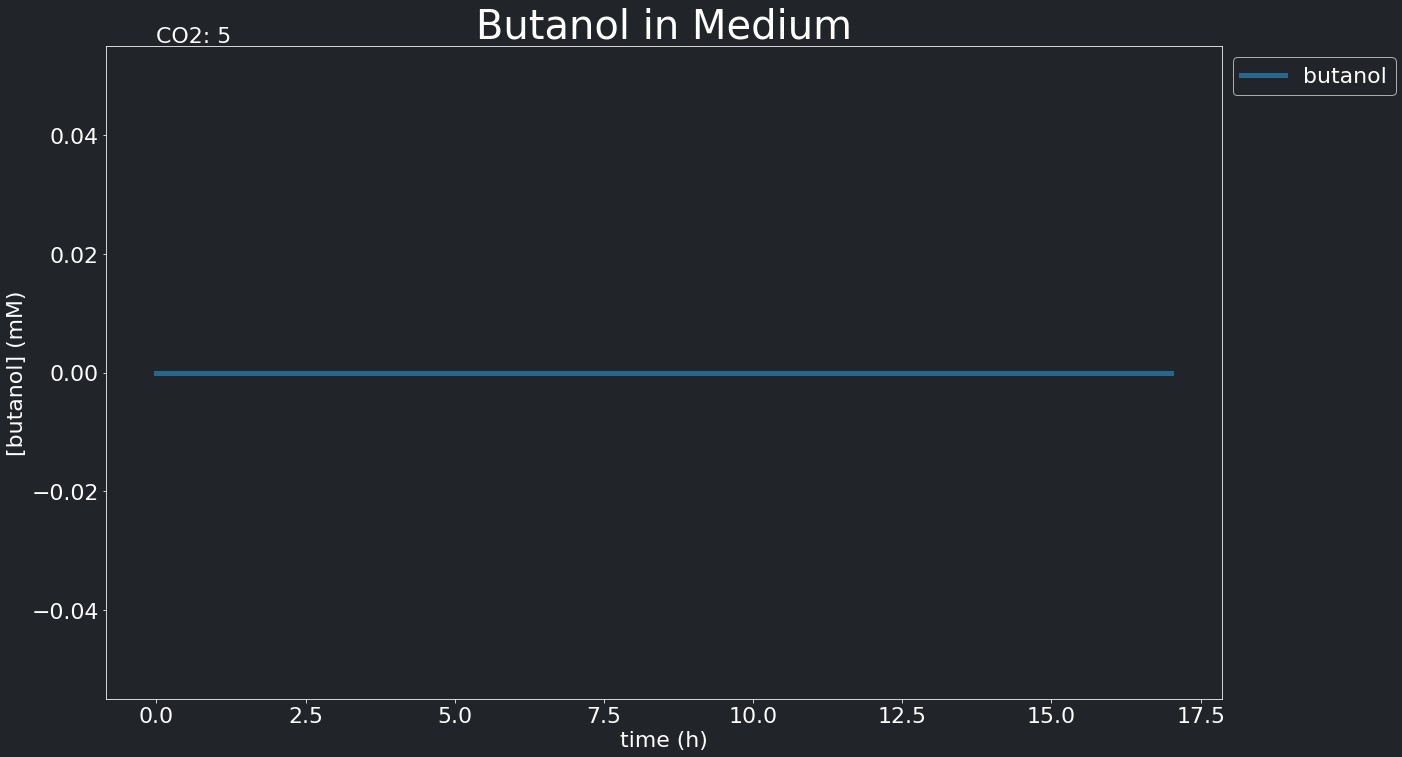

-0.25 [6.59778692e+002 0.00000000e+000 1.63041663e-322 6.68785645e+002
 1.37934583e-311 1.01855798e-312]


In [30]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times[:18], sim_results[:18,2],'#2BC79B', label ='X_cyano', linewidth=5)
plt.plot(sim_times[:18], sim_results[:18,4],'#FFD73A', label ='X_ecoli', linewidth=5)
plt.xlabel("Time (h)")
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel("[Biomass] (gDCW / h)")
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*0.141, 'CO2: 5')
text.set_color('white')
plt.show()

plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times[:18], sim_results[:18,3],'#F8F1F1', label ='sucrose', linewidth=5)
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
plt.xlabel('time (h)')
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel('[sucrose] (mM)')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*0.0455, 'CO2: 5')
text.set_color('white')
plt.show()

plt.figure(figsize=(20,12), facecolor='#212529')
plt.plot(sim_times[:18], sim_results[:18,5],'#27668D', label ='butanol', linewidth=5)
leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
for text in leg.get_texts():
    text.set_color("white")
plt.xlabel('time (h)')
ax = plt.axes()
ax.set_facecolor("#212529")
plt.ylabel('[butanol] (mM)')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
title = plt.title('Butanol in Medium', loc='center', fontsize=40)
title.set_color('white')
text = plt.text(0,1.005*0.0555, 'CO2: 5')
text.set_color('white')
plt.show()
print(i, sim_results[-1])

<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


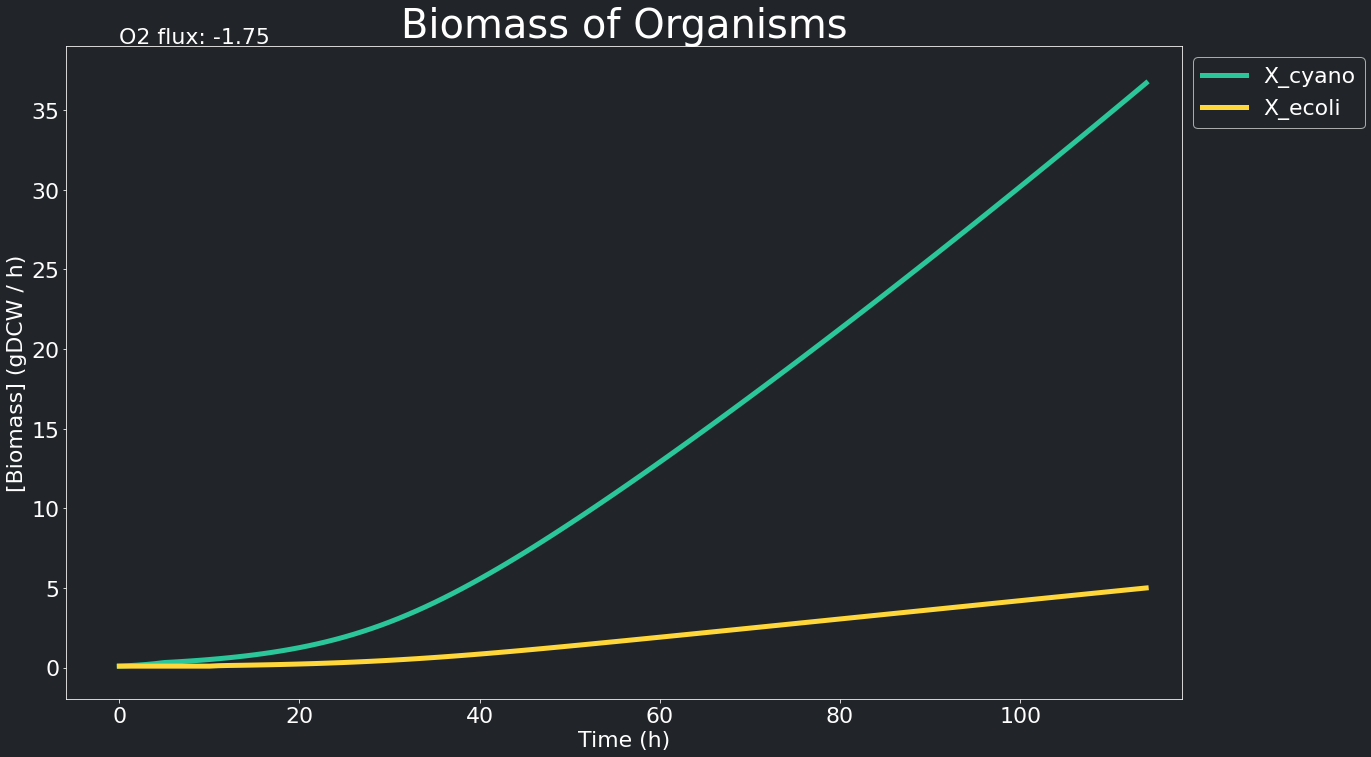

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


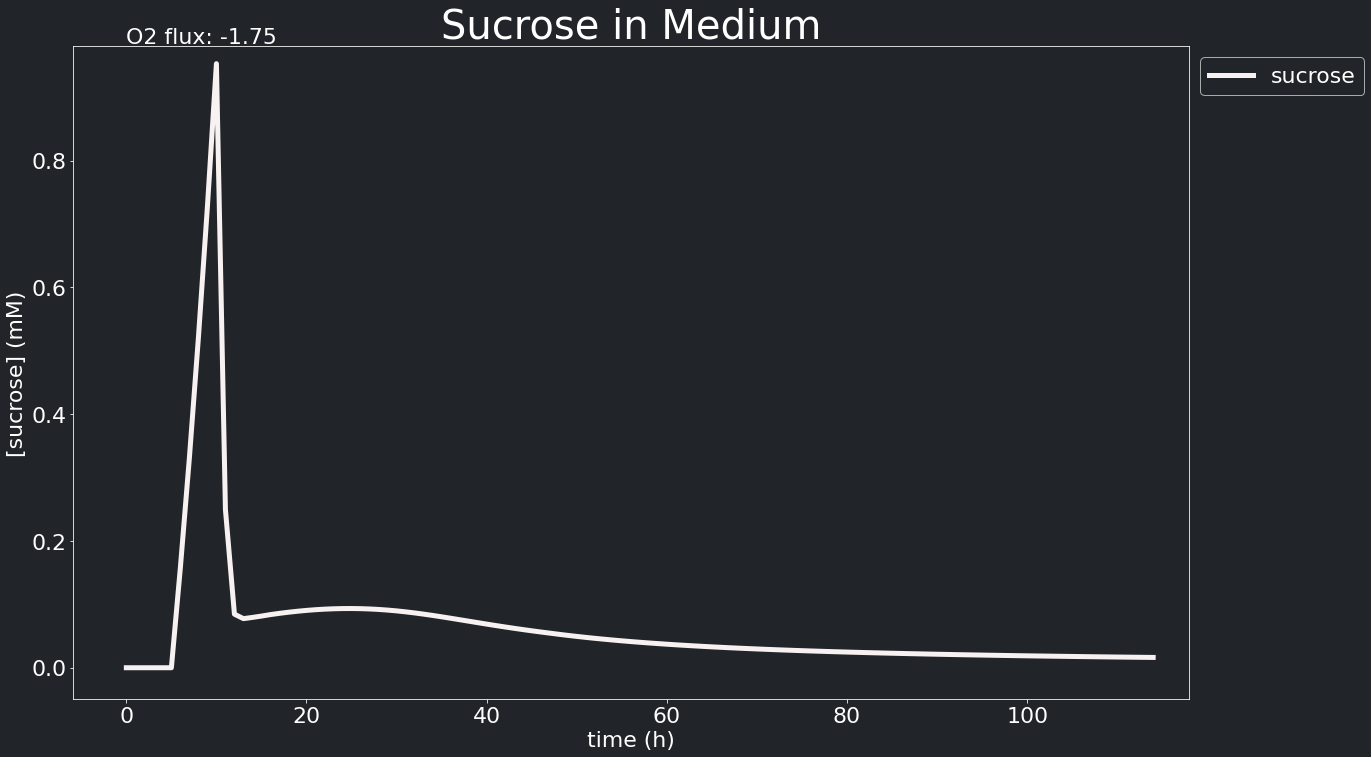

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


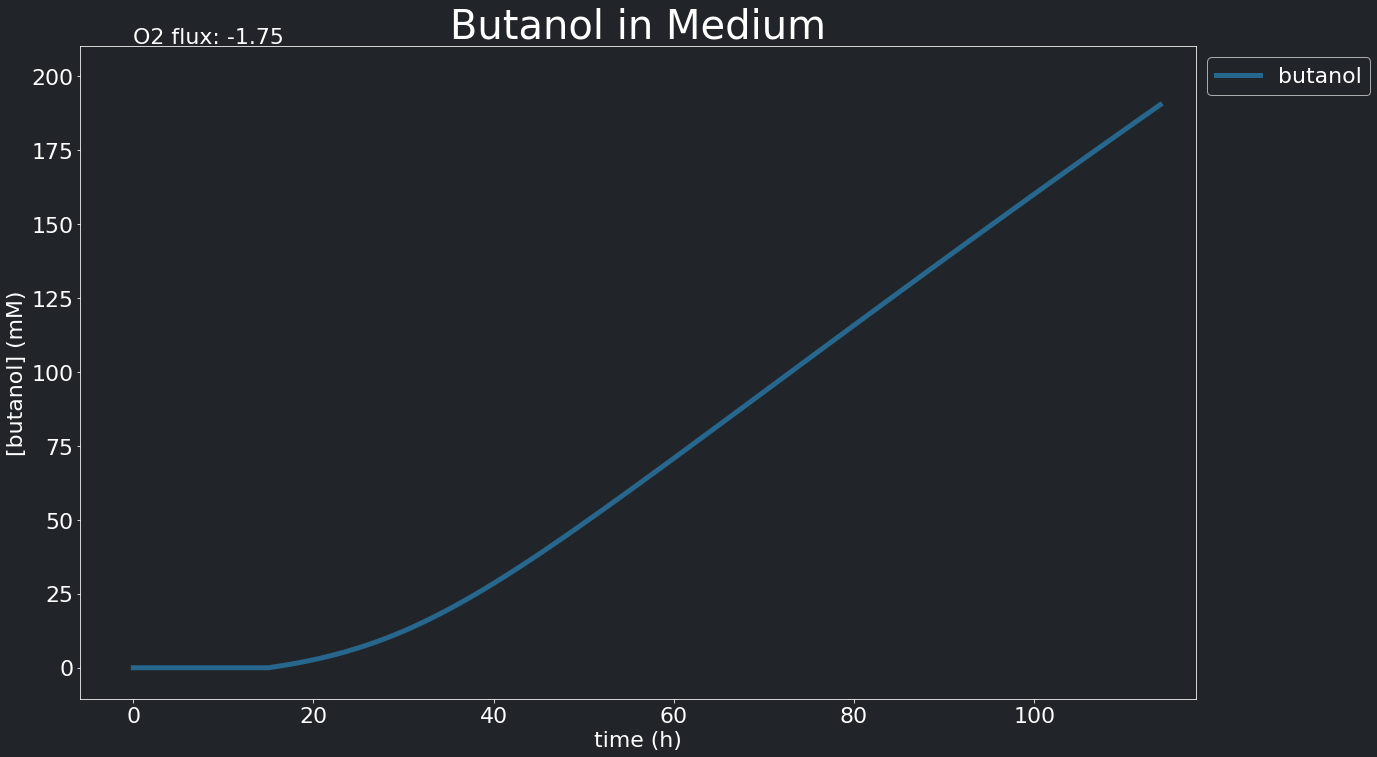

-1.75 [1.20836939e+02 1.18726026e-01 3.67080069e+01 1.62487524e-02
 5.00730103e+00 1.90299869e+02]


<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


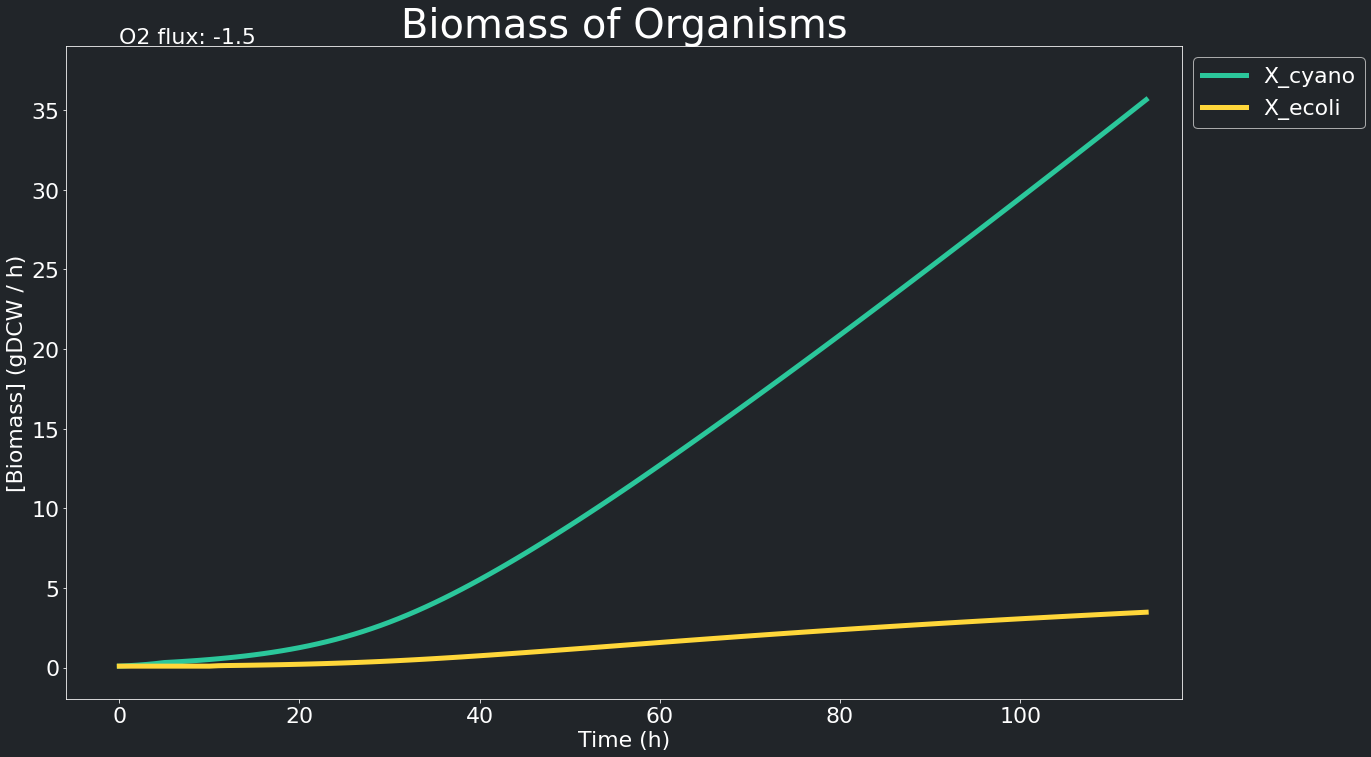

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


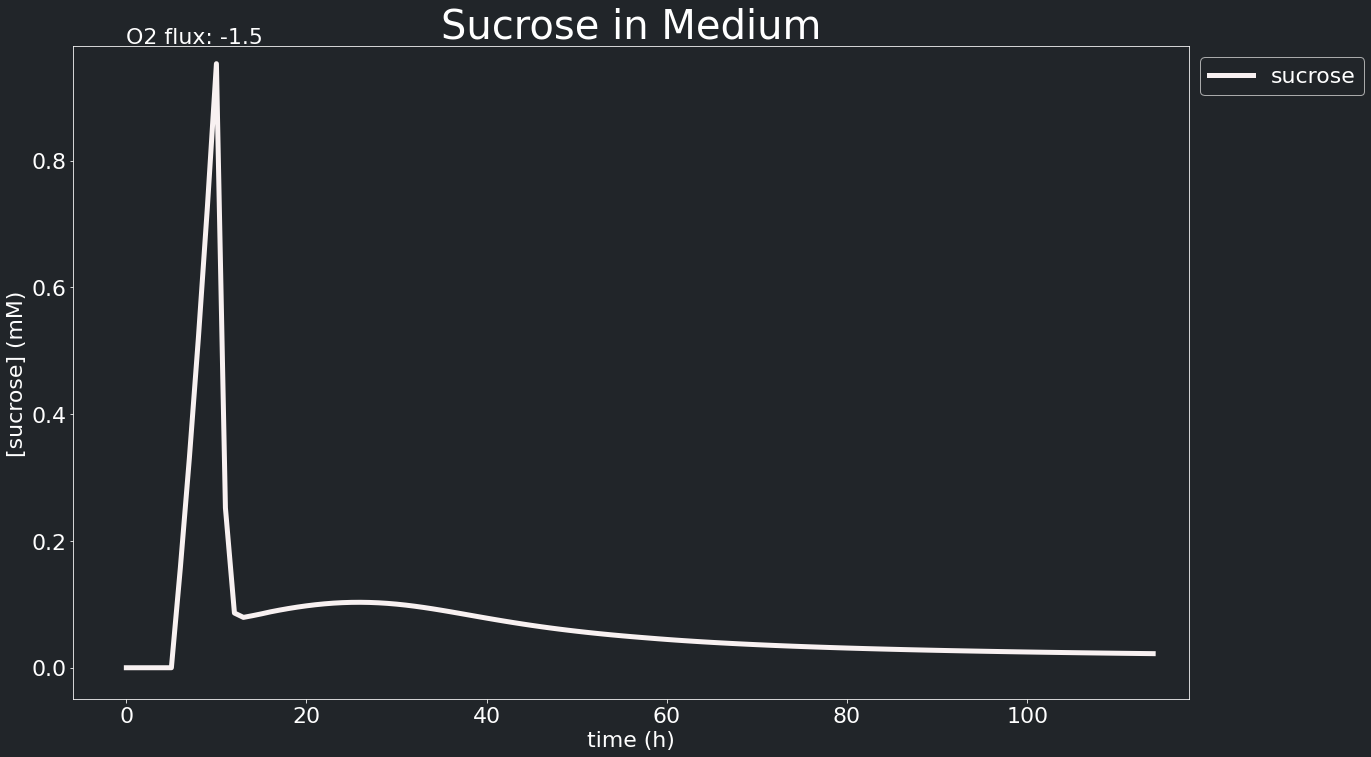

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


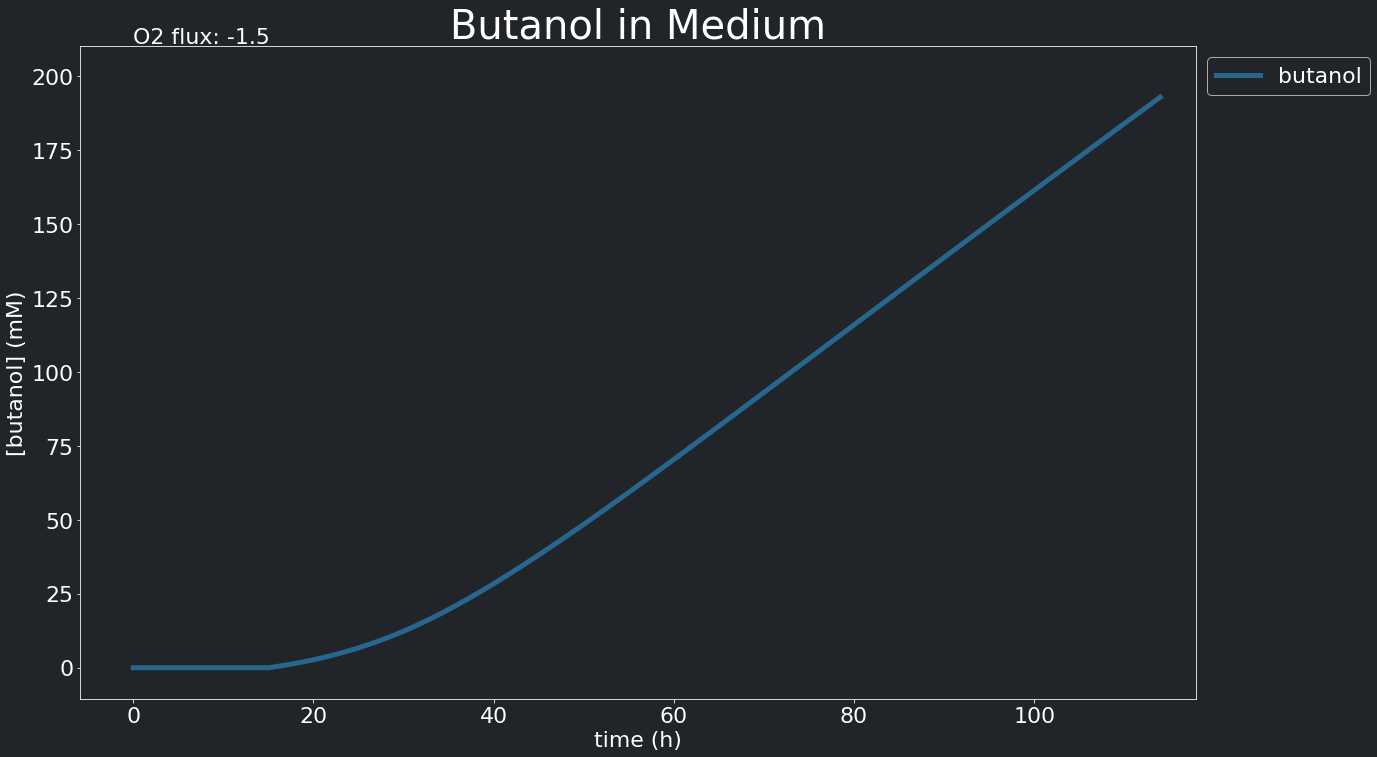

-1.5 [1.20836750e+02 1.14870990e-01 3.56572220e+01 2.22306886e-02
 3.48513014e+00 1.92871831e+02]


<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


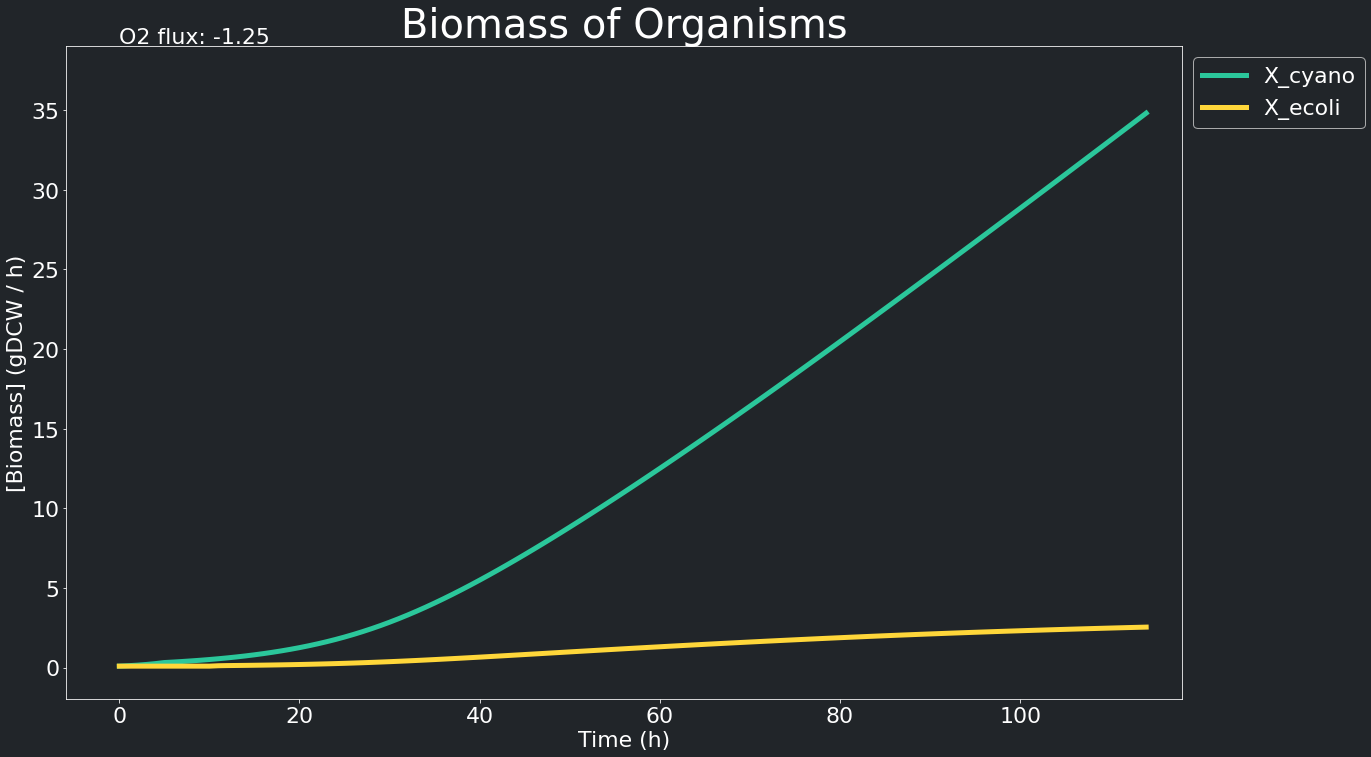

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


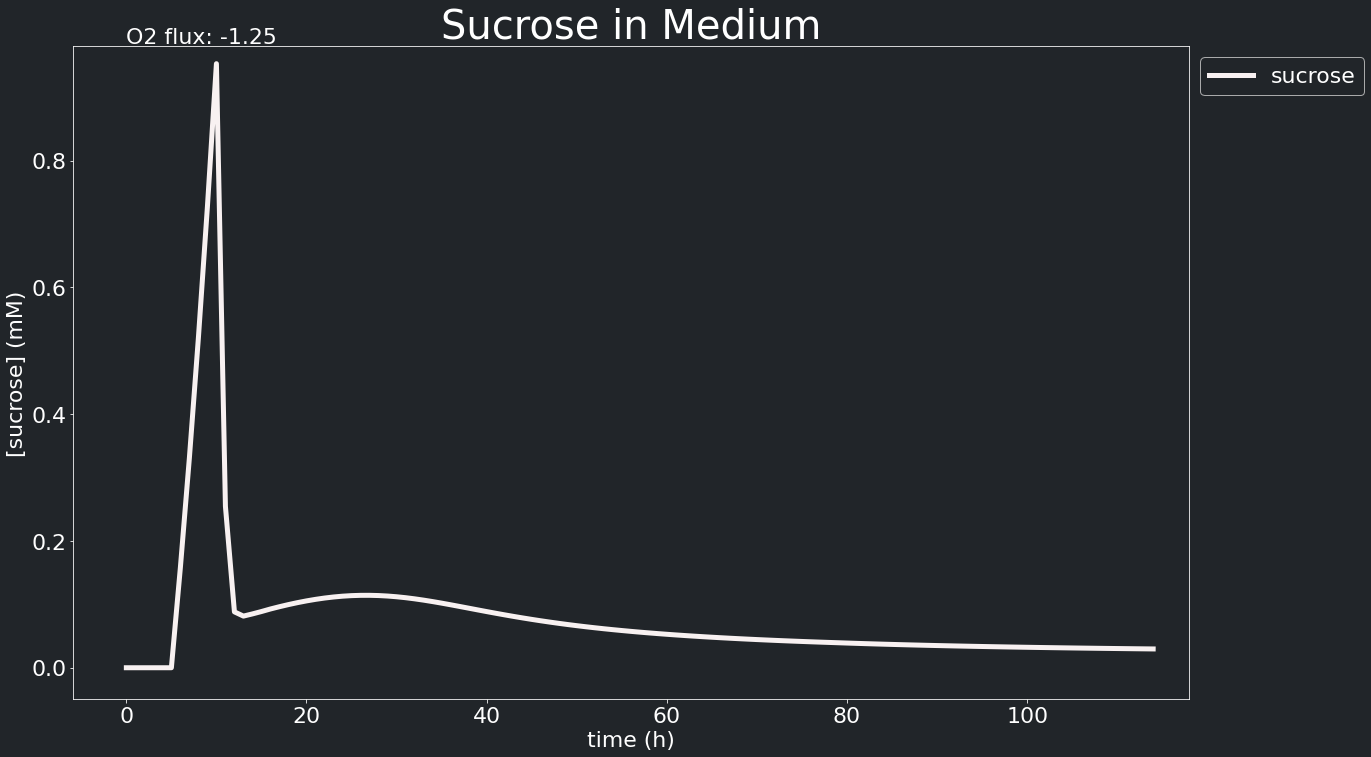

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


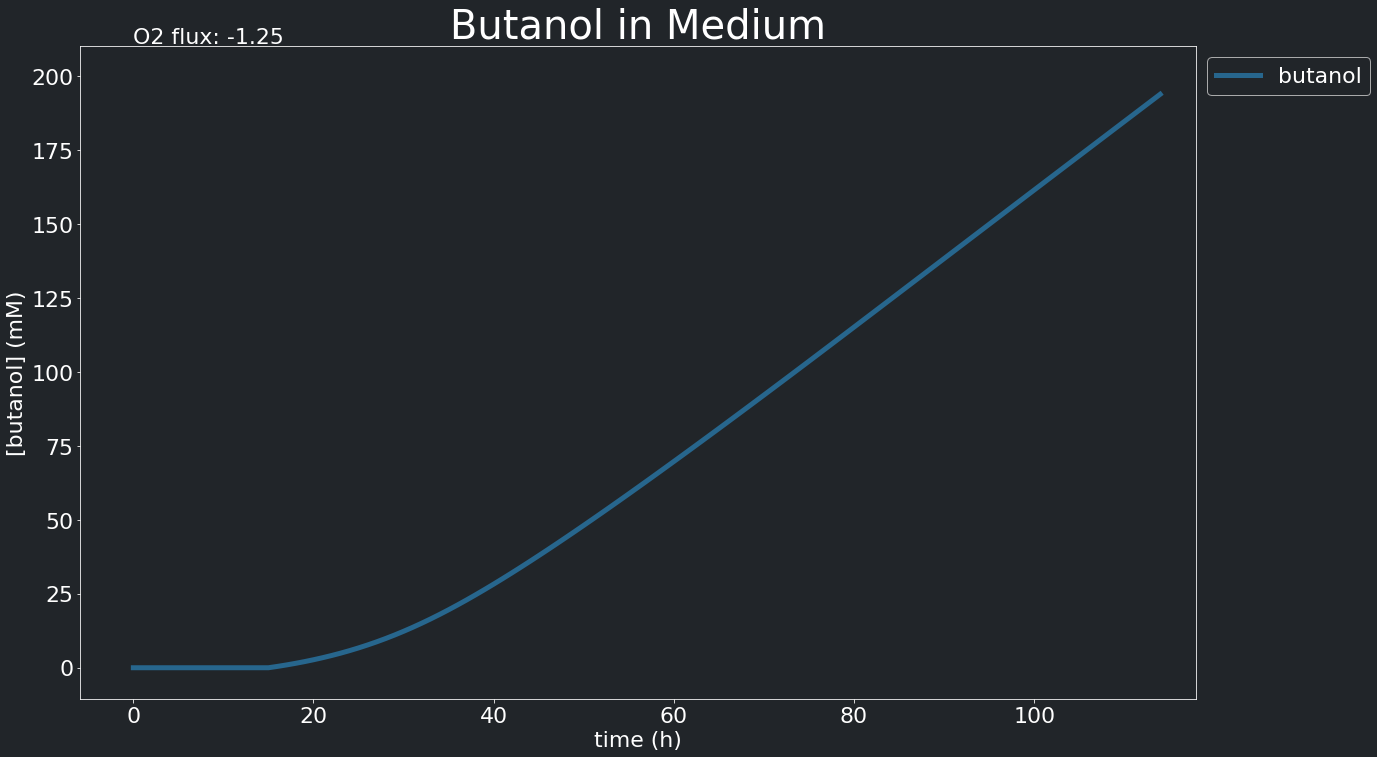

-1.25 [1.20836672e+02 1.13283823e-01 3.48155081e+01 2.96415902e-02
 2.55043604e+00 1.93845265e+02]


<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


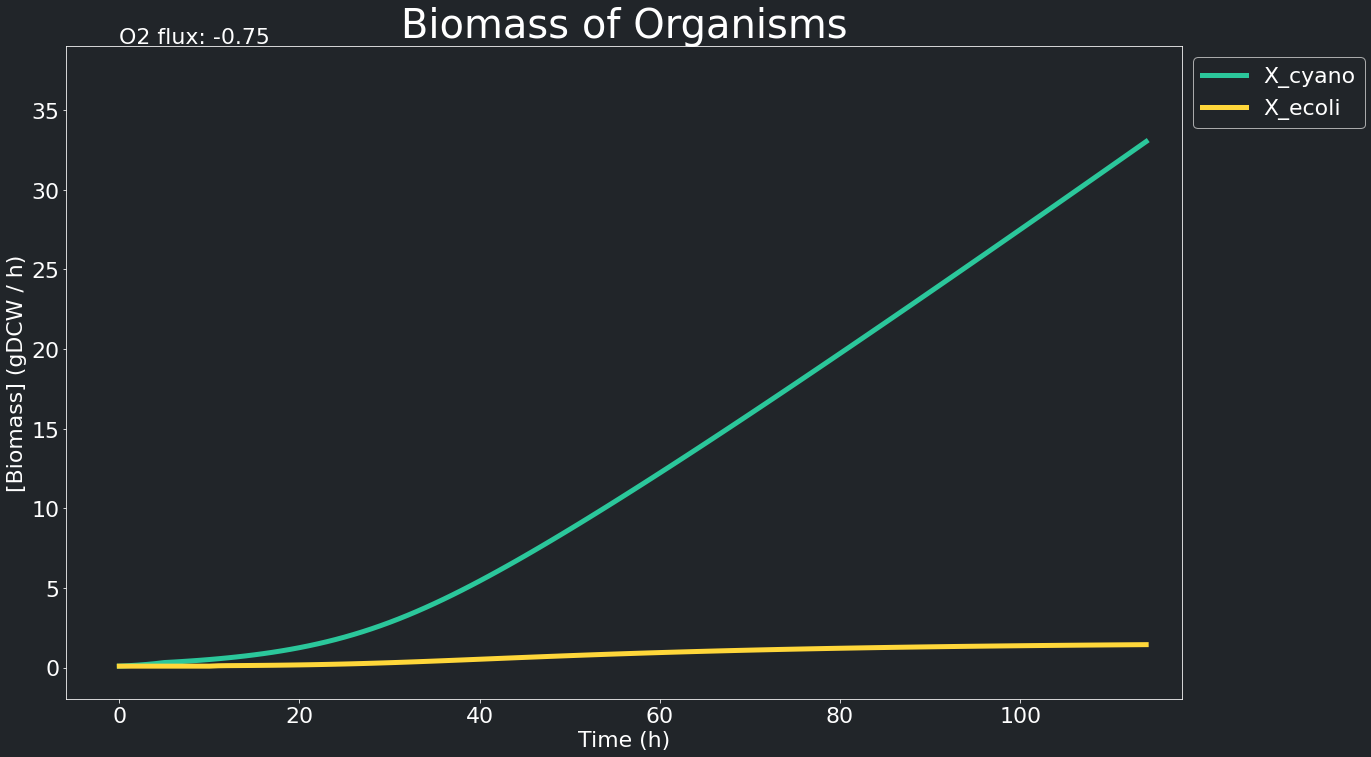

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


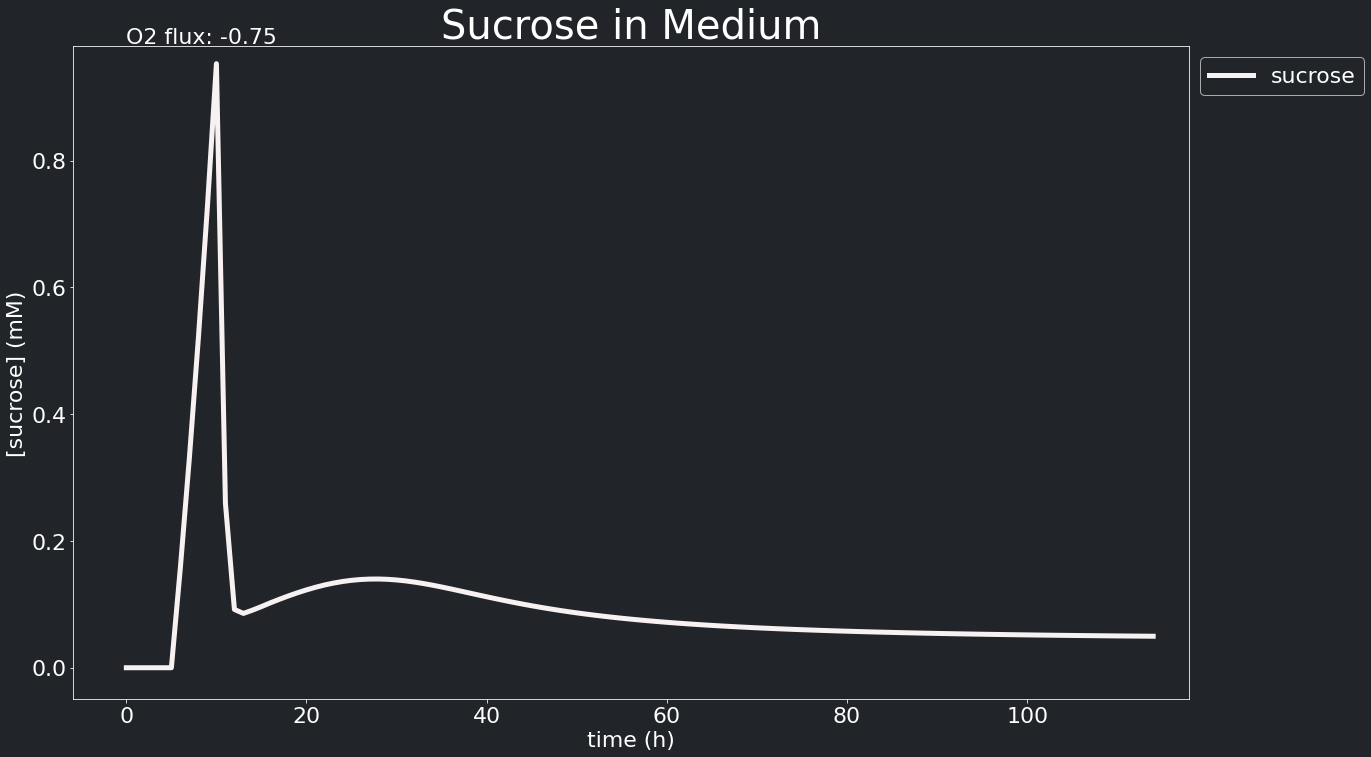

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


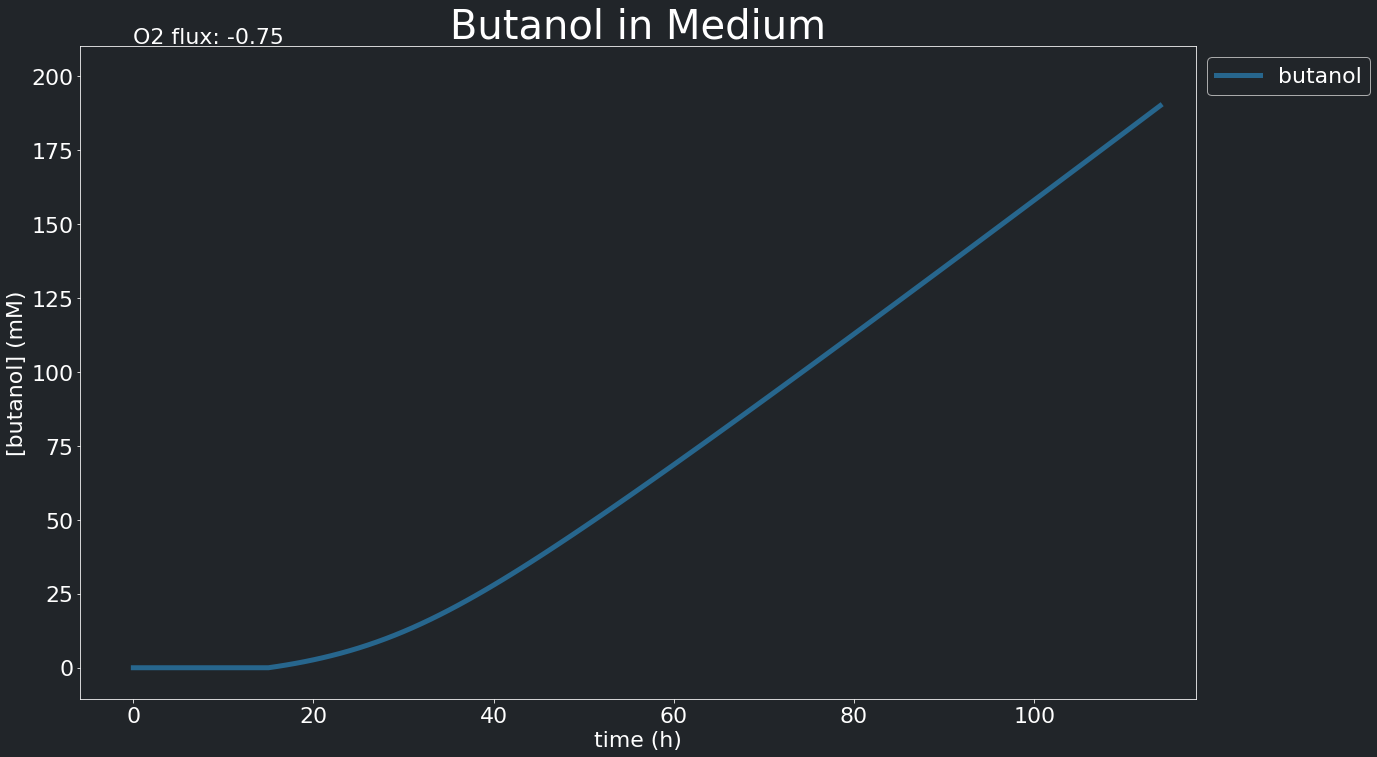

-0.75 [1.20836509e+02 1.09952816e-01 3.30327848e+01 4.96821426e-02
 1.45020767e+00 1.89987809e+02]


<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


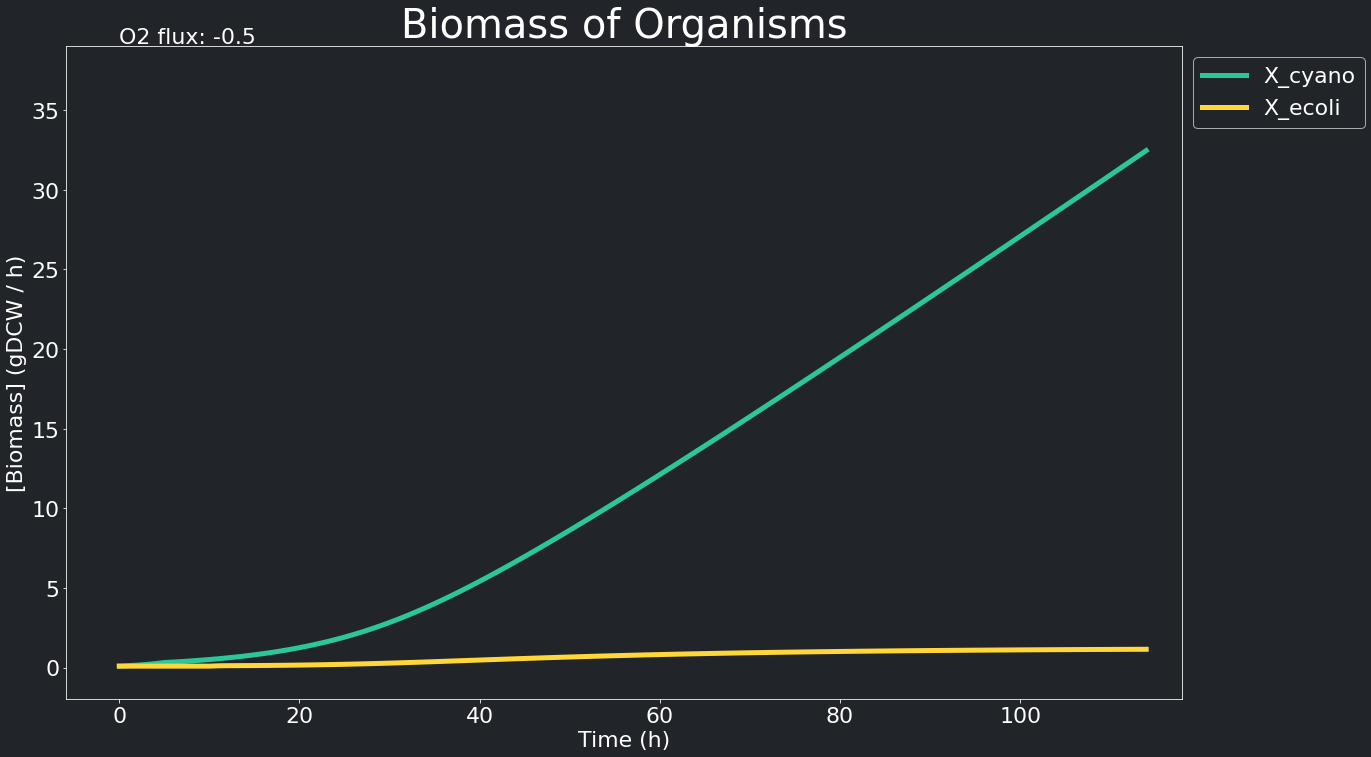

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


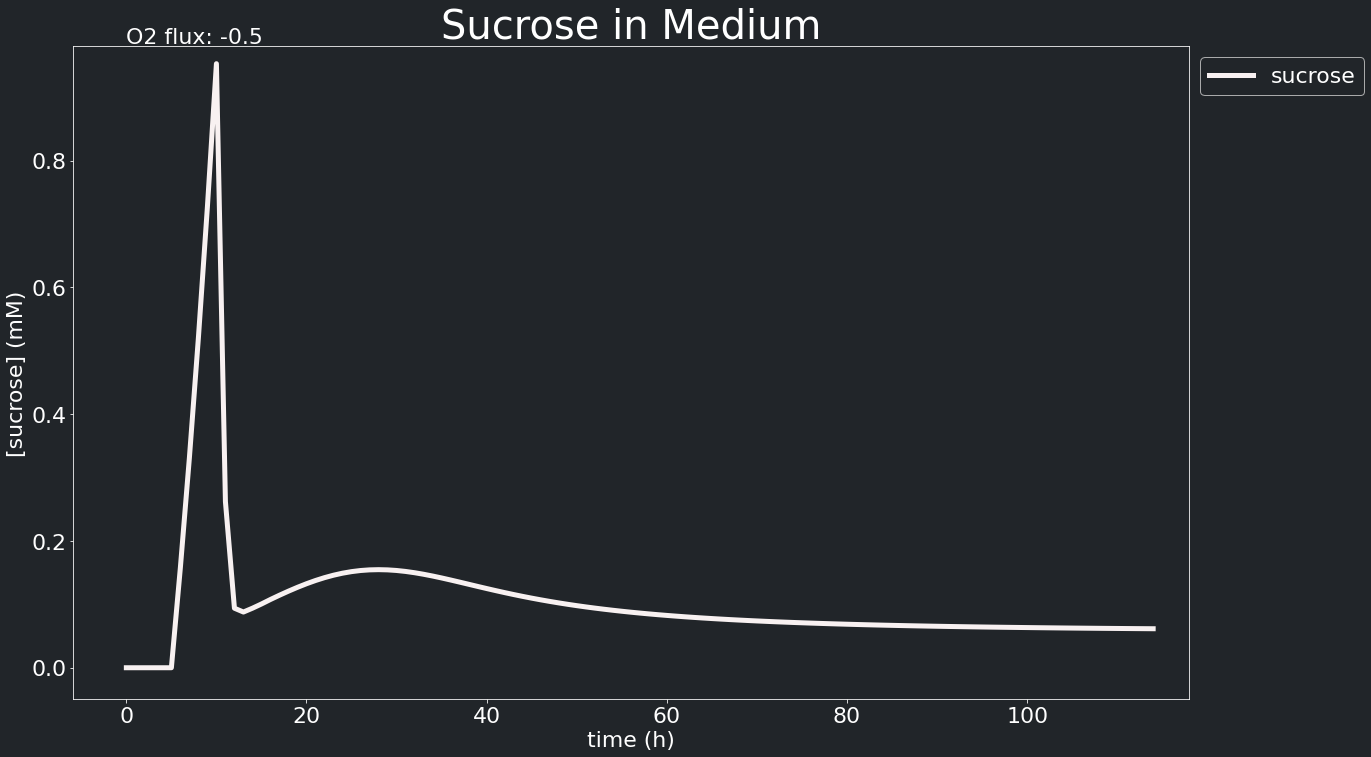

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


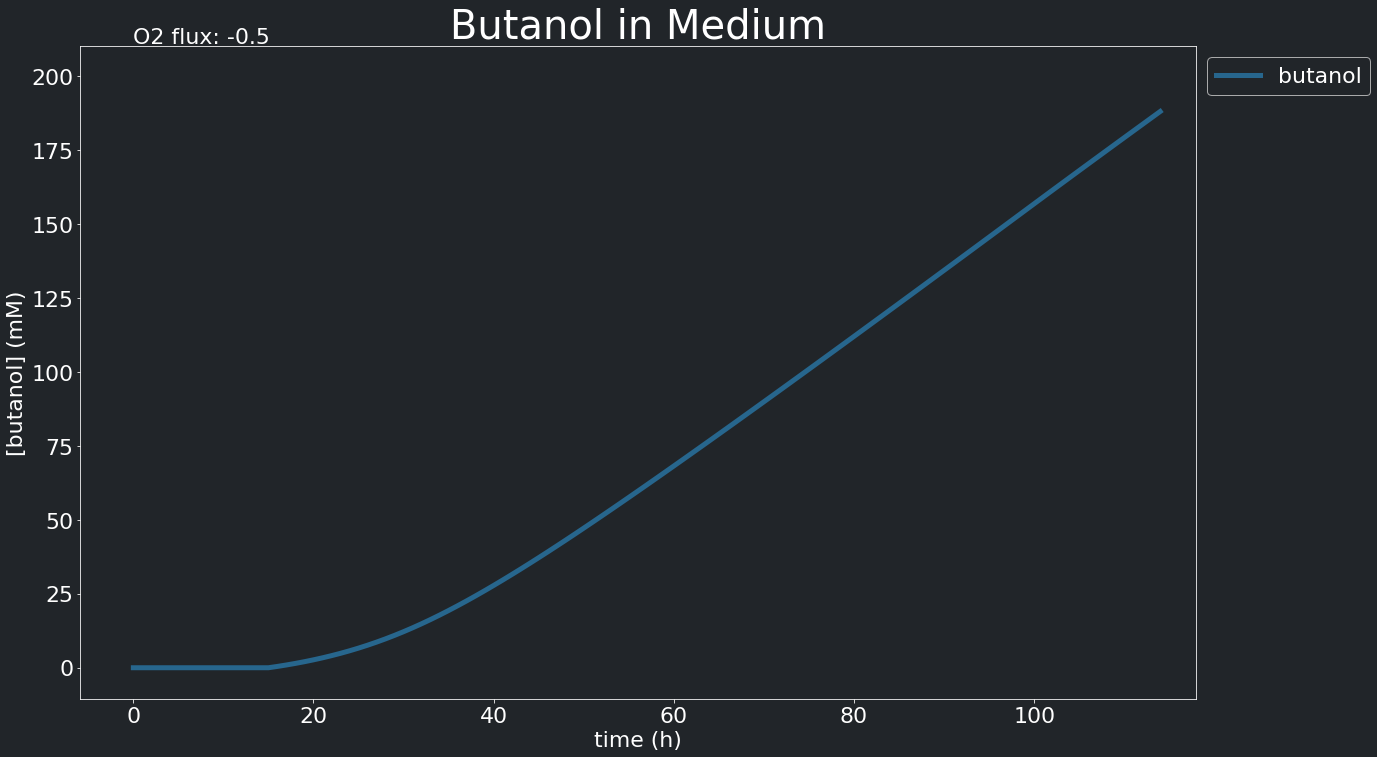

-0.5 [1.20836444e+02 1.08621612e-01 3.24634501e+01 6.15294933e-02
 1.15896903e+00 1.88022024e+02]


<ipython-input-15-8d97263ceb1b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


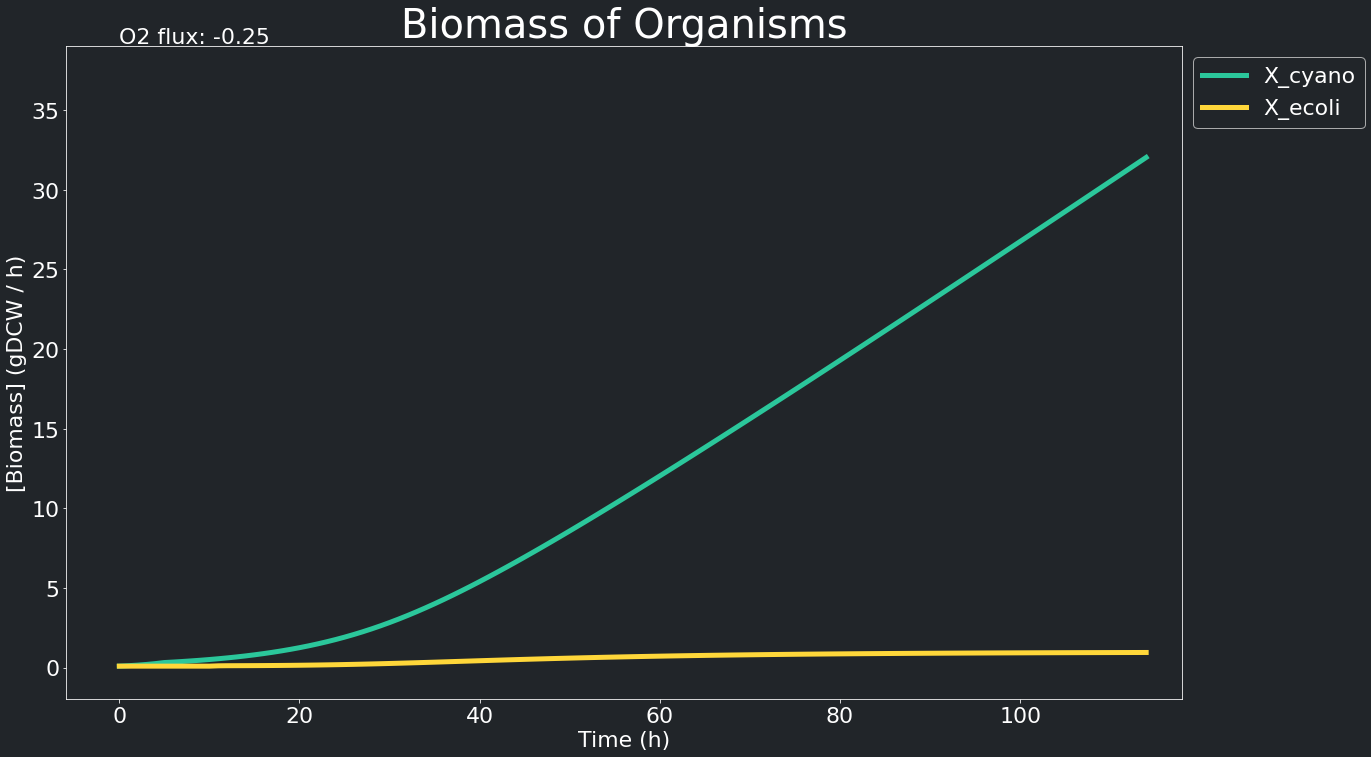

<ipython-input-15-8d97263ceb1b>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


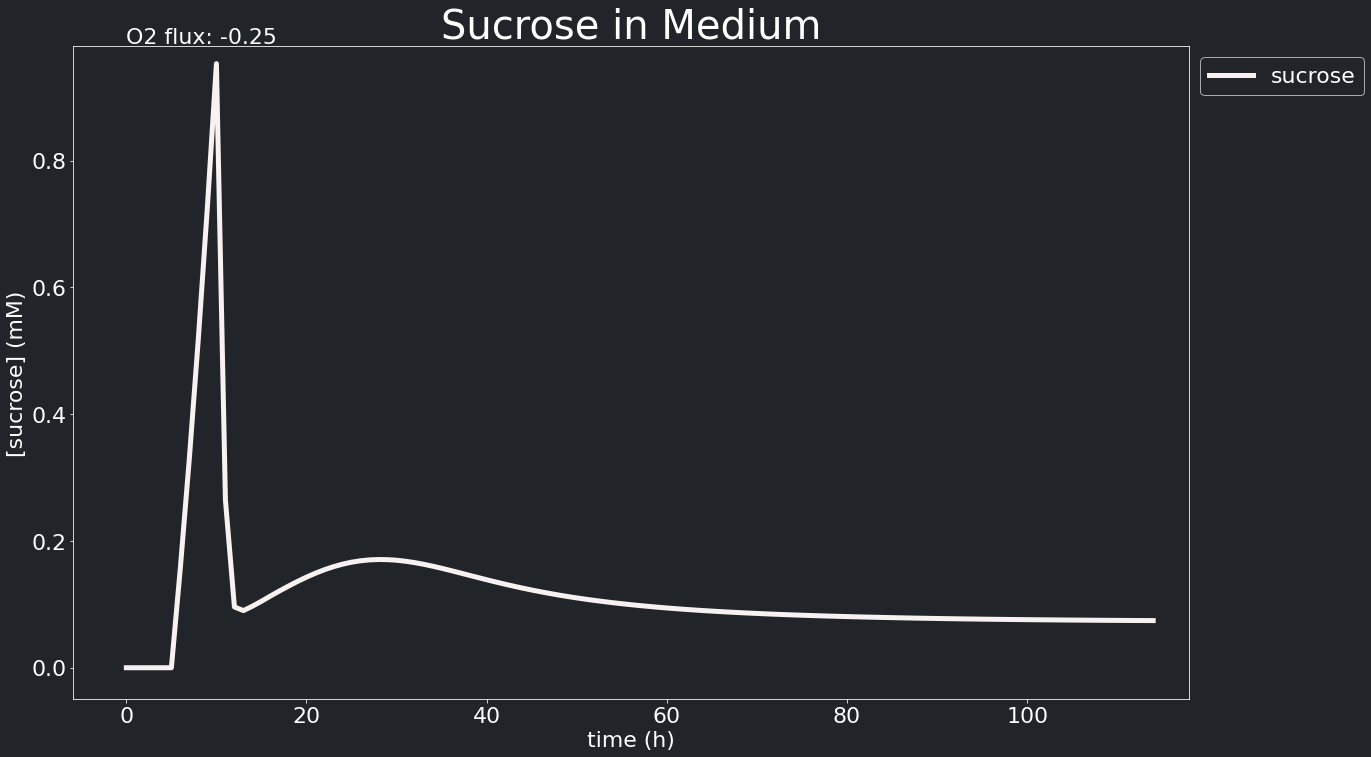

<ipython-input-15-8d97263ceb1b>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


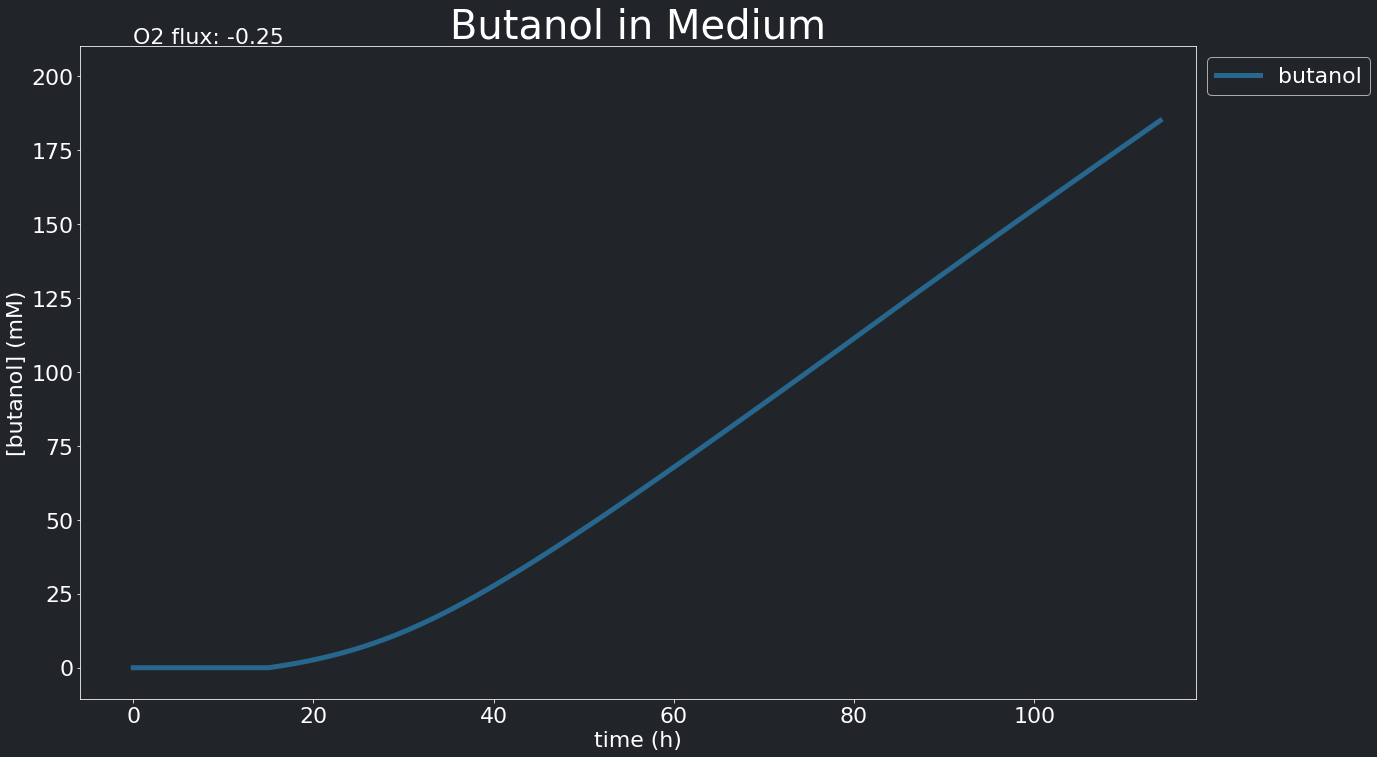

-0.25 [1.20836404e+02 1.07795999e-01 3.20342353e+01 7.43684771e-02
 9.57943740e-01 1.84952823e+02]


In [15]:
sim_times = np.linspace(0, 114, 115)
#print(sim_times)
pars['co2g_input'] = 121
initial_values[0] = 100
initial_values[1] = 100
# solve ODEs
from scipy.integrate import odeint
for i in [-1.75, -1.5, -1.25, -0.75, -0.5, -0.25]:
    model_ecoli.reactions.get_by_id('EX_o2_e').lower_bound = i
    extra_params = (model_ecoli, model_cyano, pars)
    sim_results = odeint(calculate_derivative, initial_values, sim_times, args=(extra_params,), rtol=1.e-6, atol =1.e-6)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,2],'#2BC79B', label ='X_cyano', linewidth=5)
    plt.plot(sim_times, sim_results[:,4],'#FFD73A', label ='X_ecoli', linewidth=5)
    plt.xlabel("Time (h)")
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel("[Biomass] (gDCW / h)")
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    title = plt.title('Biomass of Organisms', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*39, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*39,39)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,3],'#F8F1F1', label ='sucrose', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[sucrose] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Sucrose in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*0.98, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*0.98,0.98)
    plt.show()

    plt.figure(figsize=(20,12), facecolor='#212529')
    plt.plot(sim_times, sim_results[:,5],'#27668D', label ='butanol', linewidth=5)
    leg = plt.legend(prop={'size':22}, bbox_to_anchor=(1,1), loc="upper left", facecolor='#212529')
    for text in leg.get_texts():
        text.set_color("white")
    plt.xlabel('time (h)')
    ax = plt.axes()
    ax.set_facecolor("#212529")
    plt.ylabel('[butanol] (mM)')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    title = plt.title('Butanol in Medium', loc='center', fontsize=40)
    title.set_color('white')
    text = plt.text(0,1.005*210, 'O2 flux: '+str(i))
    text.set_color('white')
    plt.xlim(-0.05*118,118)
    plt.ylim(-0.05*210,210)
    plt.show()
    print(i, sim_results[-1])